In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 10                #number of agents
N_buckets = 50               #number of buckets
max_turns = 100             #max number of moves in single game
turn = 0                    #current turn
strategy = 'random'         #agents move randomly
rn_seed = 14                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize system
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment
state = initialize_state(environment)
print 'state = ', state
reward, bucket_value = get_reward(state)
print 'reward = ', reward
print 'bucket_value = ', bucket_value
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state

environment =  {'max_turns': 100, 'rn_seed': 14, 'N_agents': 10, 'bucket_params': {'p0': array([ 0.        ,  0.00020408,  0.00040816,  0.00061224,  0.00081633,
        0.00102041,  0.00122449,  0.00142857,  0.00163265,  0.00183673,
        0.00204082,  0.0022449 ,  0.00244898,  0.00265306,  0.00285714,
        0.00306122, -0.00326531, -0.00346939,  0.00367347,  0.00387755,
        0.00408163,  0.00428571,  0.0044898 ,  0.00469388,  0.00489796,
        0.00510204,  0.00530612,  0.0055102 ,  0.00571429,  0.00591837,
        0.00612245,  0.00632653,  0.00653061,  0.00673469,  0.00693878,
        0.00714286,  0.00734694,  0.00755102,  0.0077551 ,  0.00795918,
        0.00816327,  0.00836735,  0.00857143,  0.00877551,  0.00897959,
        0.00918367, -0.01267347, -0.01294898, -0.01322449, -0.0135    ]), 'sigma': array([ 0.        ,  0.01428571,  0.02020305,  0.02474358,  0.02857143,
        0.03194383,  0.03499271,  0.03779645,  0.0404061 ,  0.04285714,
        0.0451754 ,  0.04738035,  0.

In [6]:
#illustrate moving an agent
if ((N_agents == 3) and (N_buckets == 10)):
    environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
    state = initialize_state(environment)
    print 'state = ', state
    print 'strategy = ', strategy
    state_moved, action = move_agents(state, environment, strategy)
    print 'state_moved = ', state_moved
    print 'action = ', action
    reward, bucket_value = get_reward(state_moved)
    print 'reward = ', reward
    print 'bucket_value = ', bucket_value
    state_next = update_state(state_moved, bucket_value, environment)
    print 'state_next = ', state_next
    state_vector_next = state2vector(state_next, environment)
    print 'state_vector_next = ', state_vector_next

In [7]:
#play 1 game of randomly-moving agents and stash history in dataframe
strategy = 'random'
memories = play_one_game(environment, strategy)
reward_history, location_rewards = memories2timeseries(memories, environment)
print 'number of memories = ', len(memories)
#print 'number of location_rewards = ', len(location_rewards)
#reward_history.head()
#location_rewards.head()

number of memories =  100


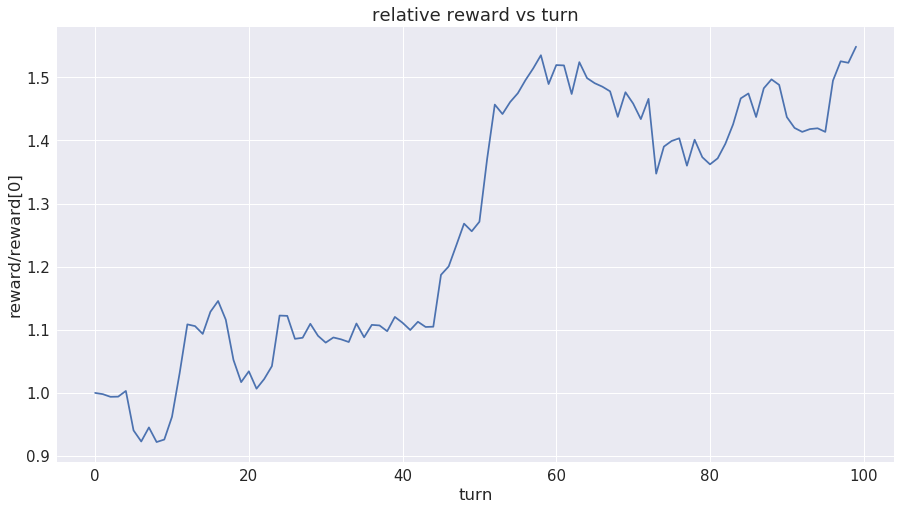

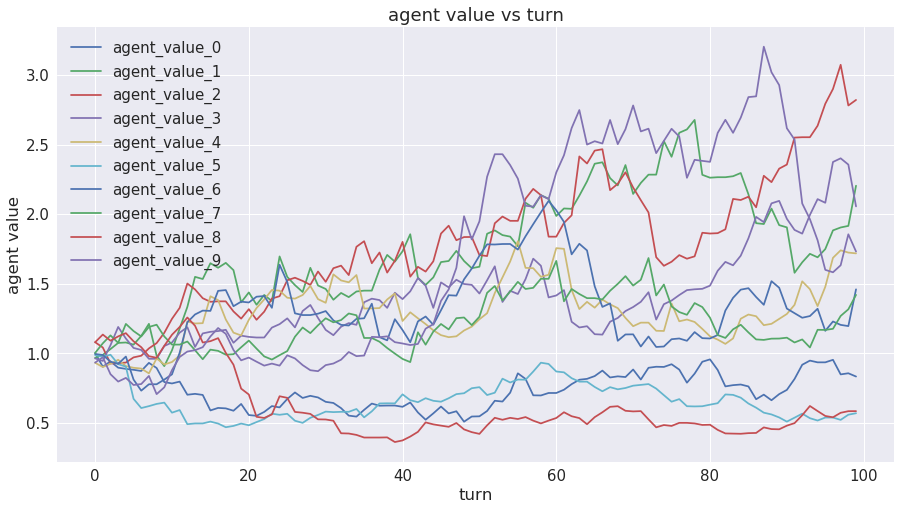

In [8]:
#plot relative reward versus turn, and agent values vs turn
df = reward_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

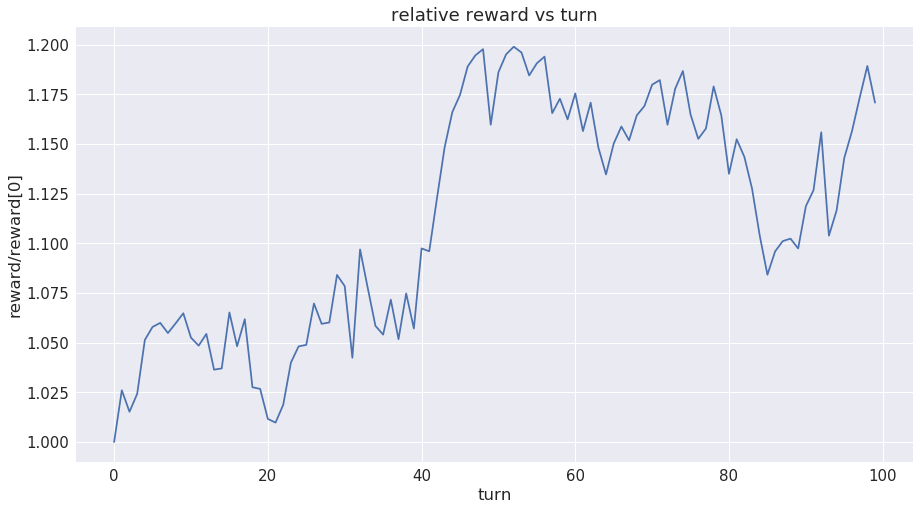

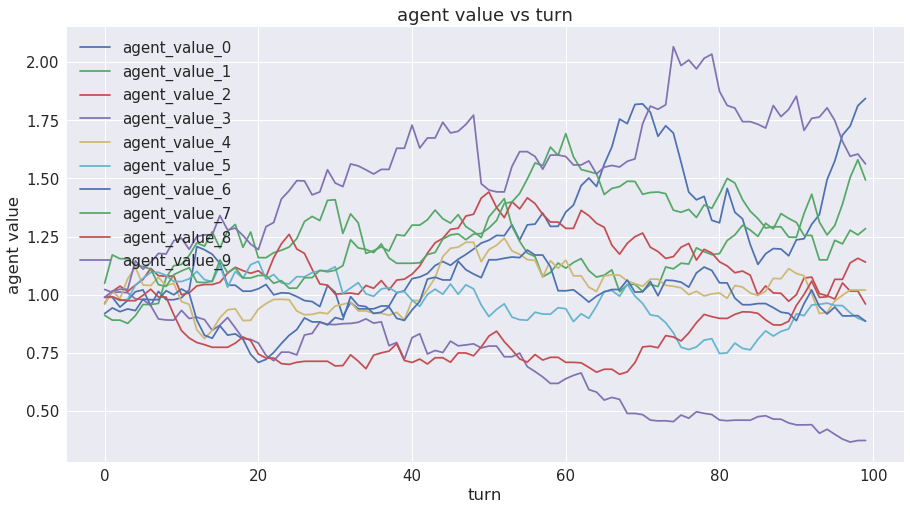

In [9]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_one_game(environment, strategy)
reward_history, location_rewards = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

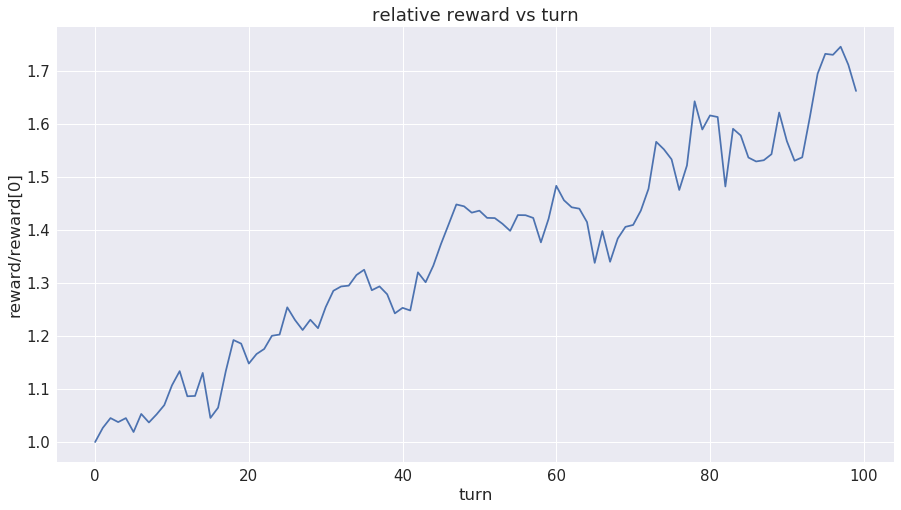

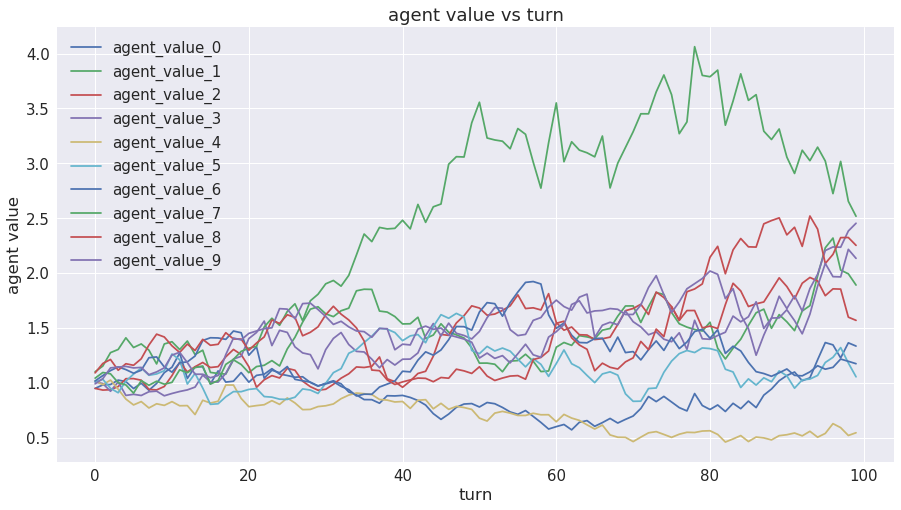

In [10]:
#play a medium-risk, medium-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_one_game(environment, strategy)
reward_history, location_rewards = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

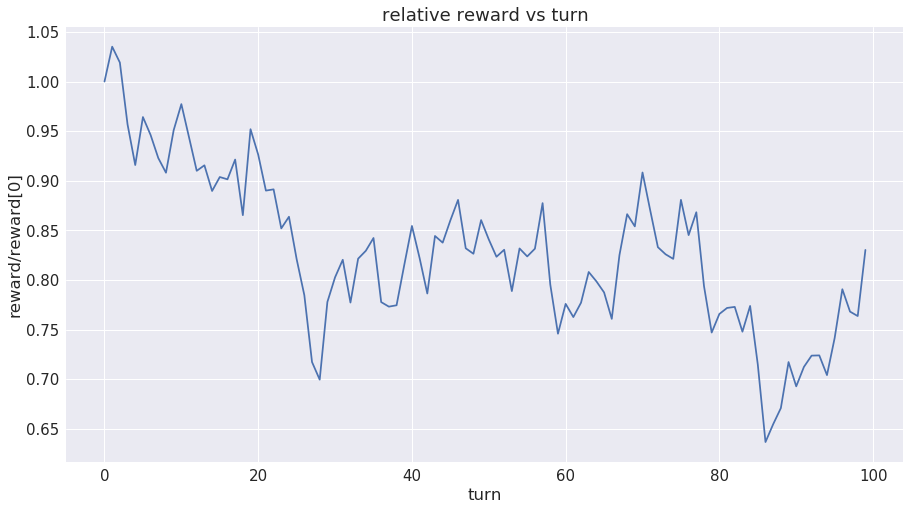

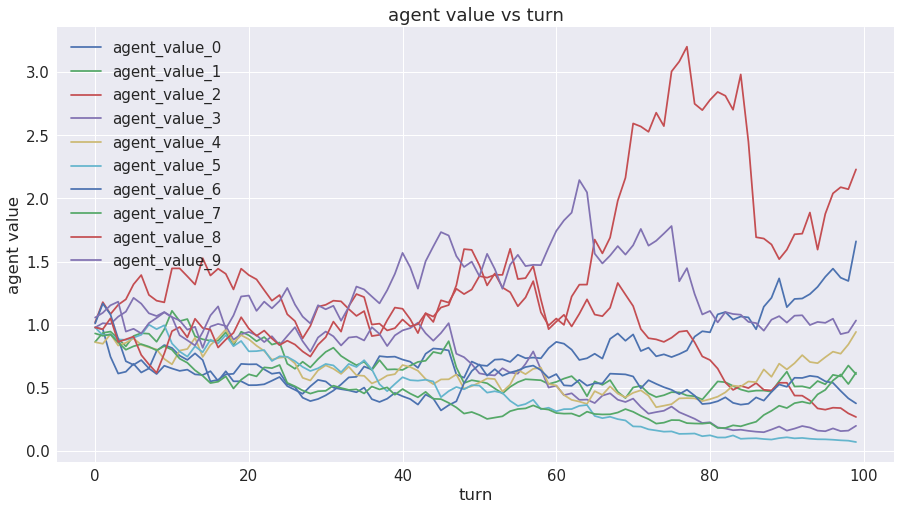

In [11]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_one_game(environment, strategy)
reward_history, location_rewards = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

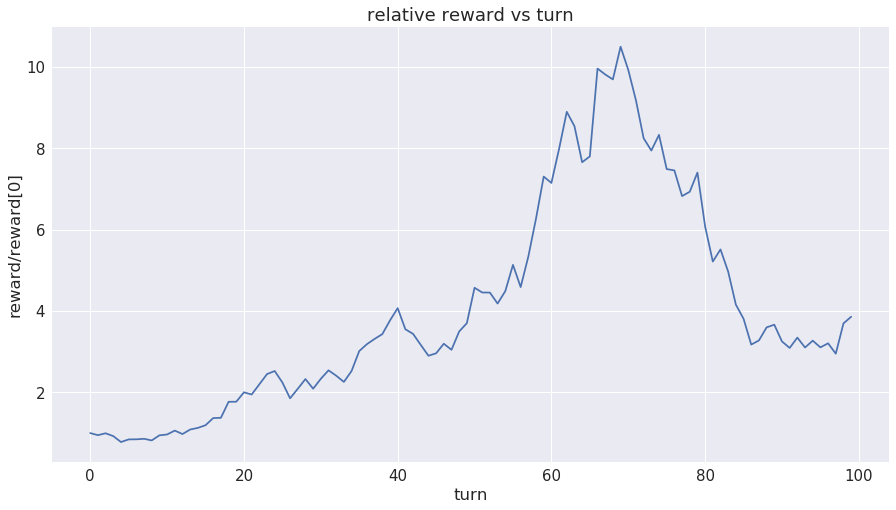

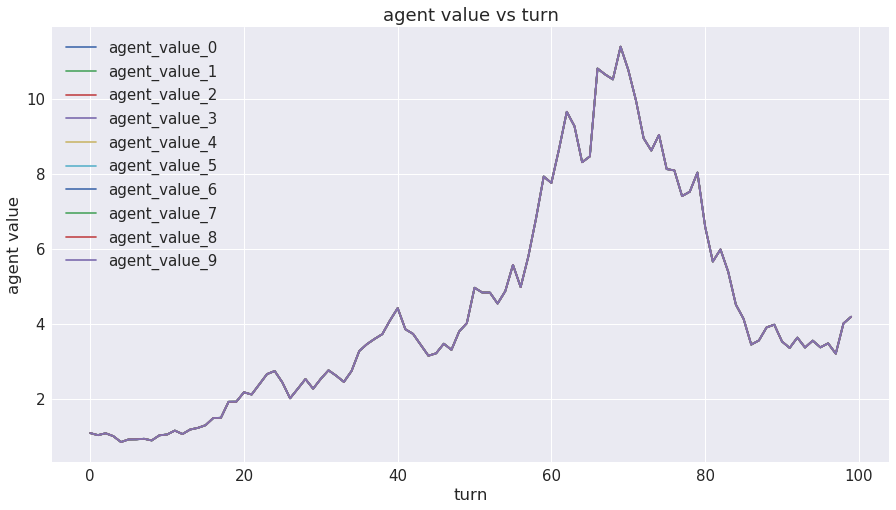

In [12]:
#play best possible game with all agents sent to bucket having highest p0
strategy = 'best'
memories = play_one_game(environment, strategy)
reward_history, location_rewards = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [13]:
#play 20 games using various strategies, and generate stats for each strategy
N_games = 20
strategies = ['low', 'middle', 'high']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_one_game(environment, strategy)
        reward_history, location_rewards = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.head()

strategy =  low
strategy =  middle
strategy =  high


mean       std
strategy turn                     
high     0     10.032777  0.118801
         1     10.001658  0.117846
         2      9.947493  0.146372
         3      9.952555  0.207084
         4     10.028028  0.248579

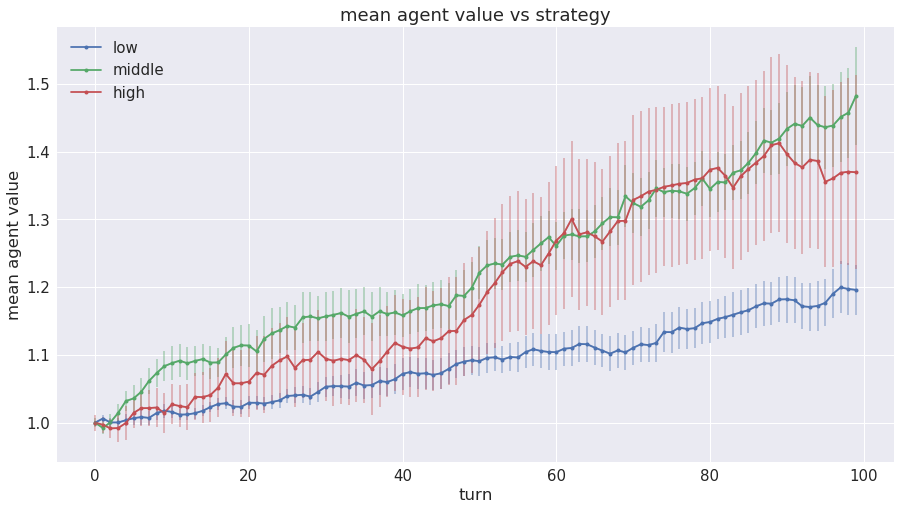

In [14]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('mean agent value vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean agent value')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= reward[0]
    reward /= reward[0]
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [15]:
#play 10 games making random actions, with moves preserved in memories queue
N_games = 1
strategy = 'random'
memories = play_N_games(environment, strategy, N_games)
reward_history, actions = memories2timeseries(memories, environment)
N_actions = len(actions)
print 'number of memories = ', len(memories)
print 'N_actions = ', N_actions
actions.head()

number of memories =  100
N_actions =  100


,action,locations,reward,N_visits,reward_per_agent
0,0,"0, 0, 1, 1, 5, 6, 16, 27, 38, 40",10.026986,1,1.002699
1,1,"0, 0, 1, 3, 4, 20, 31, 32, 33, 49",10.103773,1,1.010377
2,2,"0, 0, 1, 4, 14, 27, 34, 44, 45, 46",9.997735,1,0.999773
3,3,"0, 1, 10, 11, 13, 20, 32, 43, 45, 47",10.724063,1,1.072406
4,4,"0, 1, 10, 16, 24, 26, 33, 37, 39, 39",10.095629,1,1.009563


In [16]:
#build model
N_inputs = state_vector.shape[1]
N_outputs = N_actions
N_neurons = 2*N_agents*N_actions
model = build_model(N_inputs, N_neurons, N_outputs)
print 'N_agents = ', N_agents
print 'N_buckets = ', N_buckets
print 'N_actions = ', N_actions
print 'N_inputs = ', N_inputs
print 'N_neurons = ', N_neurons
print model.summary()

Using TensorFlow backend.


N_agents =  10
N_buckets =  50
N_actions =  100
N_inputs =  110
N_neurons =  2000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              222000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 100)               100100    
Total params: 2,323,100
Trainable params: 2,323,100
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
#train model
N_games = 10                               #number of games played during training
epsilon = 0*0.0003                          #probability that agent goes to random bucket location
gamma = 0.85                                #discount for future rewards
batch_size = 20                             #number of memories used during experience-replay
debug = True                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, rewards, actions_updated = \
    train(environment, model, N_games, epsilon, gamma, memories, actions, batch_size, debug=debug)
print '\ntraining done'

batch_size =  20
training model
[[ 0.15114345  0.10572994 -0.16149718  0.01487937  0.12062563 -0.02843173
  -0.28773558 -0.01705793  0.02330358  0.06424917 -0.10910501  0.08626602
   0.00686576  0.05062857  0.1636948   0.06277299  0.07501505  0.17538726
   0.11477618 -0.07795685 -0.06337387 -0.05545396 -0.02379376  0.12487781
   0.07273466  0.13613598  0.02315616  0.02485109 -0.23377125 -0.07913361
  -0.17113936  0.03715206  0.07275277 -0.16368142  0.06255426 -0.12089656
  -0.23660696  0.22909464  0.12107123  0.03776348  0.1493651   0.33689398
   0.03478143 -0.19170329 -0.01336973 -0.02754172 -0.29186574 -0.03108629
  -0.14285357 -0.03703459 -0.11205988  0.04990929 -0.06007754  0.02267717
  -0.15208384  0.06995879 -0.15901361 -0.08282895 -0.22893669 -0.06771015
  -0.09808602  0.00037593 -0.05794511 -0.0311945  -0.15172139  0.02161084
   0.01039481  0.01609967  0.01437573  0.00740348 -0.11046179 -0.09753726
  -0.07682971  0.12832229 -0.10248549 -0.04635079 -0.08096578 -0.10388649
  -0.2

/Users/joe/miniconda2/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


[[  1.80413938e+00   5.14466921e-03  -2.81202674e-01   5.89172356e-04
    9.22782421e-02   4.72059771e-02  -2.31150001e-01   9.90660861e-02
    2.08263844e-03  -8.29847082e-02  -3.82844418e-01  -6.14622012e-02
   -1.93830743e-01   1.40498638e-01   2.70476878e-01   9.95308906e-02
    1.99132845e-01   1.55768842e-01   7.16639906e-02   4.08124998e-02
   -1.12889893e-03  -2.45486153e-03  -2.37359852e-02   3.22389364e-01
    1.18734196e-01  -2.12445557e-02  -4.66121957e-02   1.14962216e-02
    1.31383184e-02  -4.57210131e-02  -1.97900951e-01   2.24807978e-01
    1.37239601e-02  -1.50267109e-01  -1.09009389e-02  -8.58196765e-02
   -1.38724342e-01   1.64579108e-01   1.50160760e-01   1.01836249e-01
   -5.72086647e-02   3.56914401e-01  -1.02307349e-02  -2.18742177e-01
   -1.56594589e-01  -8.19760486e-02  -1.37310699e-01  -1.41864806e-01
   -1.43711185e-02   8.29340518e-03  -5.93309104e-02   1.20424896e-01
    2.45659817e-02   1.76944565e-02   5.90851344e-03   3.87635916e-01
   -2.00170577e-01  

[[  2.48483334e+01  -2.71213531e-01  -1.17637706e+00  -4.04111147e-01
    8.59147906e-01   1.07710874e+00  -1.85907257e+00   2.38095593e+00
    2.19180971e-01   4.09159720e-01  -2.62338948e+00  -8.23429108e-01
   -1.20862198e+00   9.52186942e-01   6.19815350e-01   4.01009798e-01
    1.94500506e+00  -3.89593989e-01   8.67081285e-02  -3.84375662e-01
   -8.79929960e-02   8.72353554e-01  -5.37065387e-01   7.45678902e-01
    1.61547446e+00   5.11516571e-01   4.23730373e-01   4.85917926e-01
   -2.19934970e-01   3.44036430e-01  -1.66235125e+00   1.05901039e+00
    3.90974469e-02  -1.10704374e+00  -3.14028919e-01  -1.90238118e+00
   -1.27731574e+00   1.70213938e+00   1.71446073e+00   4.52117562e-01
    8.53558481e-02   1.77384722e+00  -9.41884052e-03  -1.73008657e+00
   -7.88345933e-01   1.15978360e-01  -1.98816508e-01  -8.27402532e-01
    3.00567150e-02   9.14631009e-01  -8.48486960e-01   1.93127111e-01
    4.52743173e-01   6.88086808e-01   4.95802999e-01   3.74701762e+00
   -1.30431306e+00  

[[  8.85260544e+01  -6.19013250e-01  -3.23738694e+00  -1.39367867e+00
    2.15377116e+00   3.01234603e+00  -6.04485798e+00   7.99461317e+00
    1.08170450e+00   2.14123821e+00  -8.41676998e+00  -3.34856033e+00
   -3.20671821e+00   3.25356436e+00   1.49470258e+00   8.93974483e-01
    6.94402027e+00  -1.35800076e+00  -1.01325929e-01  -1.16166425e+00
   -6.28157794e-01   3.14316416e+00  -1.92292786e+00   2.63070178e+00
    4.94415283e+00   1.27688587e+00   1.52268684e+00   9.84391510e-01
   -6.04103982e-01   1.23257971e+00  -5.63656902e+00   2.69926310e+00
   -1.75513804e-01  -3.77480960e+00  -3.54644835e-01  -5.98206043e+00
   -3.48554969e+00   5.36552191e+00   5.22581005e+00   5.08144498e-01
   -2.95498371e-02   4.87467003e+00   8.11978728e-02  -5.66320276e+00
   -2.52974486e+00   6.04892612e-01  -2.82533228e-01  -2.18885565e+00
   -2.73882687e-01   3.11514497e+00  -2.68401337e+00   4.15384680e-01
    1.85183620e+00   2.25048518e+00   2.00036263e+00   1.18049946e+01
   -3.95545912e+00  

[[  5.99167671e+01  -5.96997857e-01  -2.49092793e+00  -1.03924239e+00
    1.64679182e+00   2.16755700e+00  -4.31271696e+00   5.55855274e+00
    7.47535169e-01   1.24004316e+00  -6.08188581e+00  -2.22245812e+00
   -2.51827216e+00   2.31552529e+00   1.21698642e+00   7.67800331e-01
    4.83751822e+00  -9.43329811e-01   2.27484152e-01  -1.03304553e+00
   -5.10621428e-01   2.05113506e+00  -1.45035124e+00   1.83638430e+00
    3.56779933e+00   8.79853964e-01   9.99588549e-01   8.92940640e-01
   -4.00378764e-01   8.03102136e-01  -3.86367631e+00   2.08029747e+00
   -2.22999215e-01  -2.71237922e+00  -3.47815186e-01  -4.18435192e+00
   -2.52253866e+00   3.76890492e+00   3.68619108e+00   7.21155822e-01
   -9.17923450e-03   3.71476722e+00   1.87880918e-03  -3.93023324e+00
   -1.77035797e+00   3.84898007e-01  -1.51042610e-01  -1.70322287e+00
   -1.53794348e-01   2.18502998e+00  -1.79185033e+00   3.41848016e-01
    1.20394838e+00   1.40769589e+00   1.24612808e+00   8.28622437e+00
   -2.75805283e+00  

[[  5.46227951e+01  -6.79404855e-01  -2.49245906e+00  -1.03836119e+00
    1.60001302e+00   2.03145623e+00  -4.13063908e+00   5.07741070e+00
    6.67383790e-01   9.17039990e-01  -5.80046701e+00  -2.02033424e+00
   -2.55403852e+00   2.32494760e+00   1.22420716e+00   7.94689059e-01
    4.54779673e+00  -7.64739394e-01   3.94283682e-01  -1.12555325e+00
   -5.06855428e-01   1.82612824e+00  -1.58925831e+00   1.64700842e+00
    3.29233694e+00   7.95735717e-01   8.87188435e-01   9.11417842e-01
   -3.28451842e-01   7.82757521e-01  -3.59791660e+00   2.03418899e+00
   -2.77714163e-01  -2.52279019e+00  -4.31486249e-01  -3.82550406e+00
   -2.39464617e+00   3.47406149e+00   3.40558887e+00   9.00677085e-01
   -2.73668170e-02   3.64246249e+00  -1.47472844e-02  -3.62982869e+00
   -1.56464732e+00   2.66462624e-01  -1.40946358e-01  -1.64063215e+00
   -1.64790750e-01   2.06486368e+00  -1.52012432e+00   2.55694360e-01
    1.03002942e+00   1.14699960e+00   1.05863035e+00   7.71769381e+00
   -2.58197117e+00  

[[  7.58229675e+01  -8.75210047e-01  -3.33300447e+00  -1.37599826e+00
    2.07046652e+00   2.66379070e+00  -5.50872898e+00   6.92201757e+00
    9.57249582e-01   1.29904497e+00  -7.97280216e+00  -2.89329910e+00
   -3.40835881e+00   3.18489099e+00   1.60927975e+00   1.00455213e+00
    6.20659113e+00  -1.03752685e+00   5.30592322e-01  -1.59053874e+00
   -8.58397067e-01   2.56520033e+00  -2.18624210e+00   2.28766298e+00
    4.39850330e+00   9.88592982e-01   1.11924446e+00   1.10193121e+00
   -4.17314470e-01   1.05647969e+00  -4.89584827e+00   2.60663414e+00
   -4.91376728e-01  -3.41888094e+00  -4.41982210e-01  -5.08255625e+00
   -3.17485356e+00   4.57964039e+00   4.52611494e+00   1.06198621e+00
   -1.13182485e-01   4.72131348e+00   5.28157279e-02  -4.90440083e+00
   -2.07098889e+00   4.15801764e-01  -1.23763800e-01  -2.13287044e+00
   -2.73619562e-01   2.78393221e+00  -1.91842246e+00   2.70504206e-01
    1.45228863e+00   1.58476019e+00   1.55181658e+00   1.03455753e+01
   -3.47722483e+00  

[[  6.10107384e+01  -7.55227447e-01  -2.87041497e+00  -1.20184243e+00
    1.78075588e+00   2.20914459e+00  -4.57472467e+00   5.66135025e+00
    7.82914758e-01   9.46711302e-01  -6.60704088e+00  -2.36108756e+00
   -2.90438151e+00   2.62054276e+00   1.34725237e+00   8.85824740e-01
    5.09364891e+00  -8.20520759e-01   5.57934165e-01  -1.37173223e+00
   -6.93596840e-01   2.09556580e+00  -1.85474062e+00   1.85525346e+00
    3.61763930e+00   8.35579455e-01   8.87138426e-01   9.54437613e-01
   -3.56021672e-01   8.62720191e-01  -3.99999738e+00   2.23055911e+00
   -4.24992472e-01  -2.80905294e+00  -4.36721861e-01  -4.17573929e+00
   -2.68157434e+00   3.76364779e+00   3.75142956e+00   1.02714419e+00
   -9.82933044e-02   4.00178194e+00  -7.65509903e-04  -4.02621078e+00
   -1.70093691e+00   3.16673189e-01  -9.12744403e-02  -1.75415933e+00
   -2.24546865e-01   2.30343795e+00  -1.58321619e+00   2.15901509e-01
    1.13139772e+00   1.22438300e+00   1.23049355e+00   8.48957253e+00
   -2.88373375e+00  

[[  7.14390640e+01  -8.77955079e-01  -3.29941487e+00  -1.35971487e+00
    2.04436898e+00   2.53027129e+00  -5.34773111e+00   6.55319881e+00
    8.89041424e-01   1.13015366e+00  -7.69737768e+00  -2.75380588e+00
   -3.35280752e+00   3.08379936e+00   1.58004999e+00   9.92930770e-01
    5.98055267e+00  -9.26090002e-01   6.01287842e-01  -1.61967134e+00
   -8.23951781e-01   2.46959114e+00  -2.17710352e+00   2.17028713e+00
    4.23005247e+00   9.25551951e-01   9.91586089e-01   1.05638278e+00
   -3.70806485e-01   1.00854349e+00  -4.67046356e+00   2.54754376e+00
   -5.26310205e-01  -3.31314373e+00  -4.85120207e-01  -4.84418440e+00
   -3.09888220e+00   4.37037754e+00   4.30398035e+00   1.13115895e+00
   -1.41319275e-01   4.63117647e+00  -1.48038343e-02  -4.65693188e+00
   -1.95564044e+00   3.70438993e-01  -7.62345791e-02  -2.08281159e+00
   -3.01787645e-01   2.68127155e+00  -1.76156020e+00   2.40339011e-01
    1.30057752e+00   1.44259977e+00   1.43343854e+00   9.88128853e+00
   -3.33782530e+00  

[[  7.29547806e+01  -8.89135659e-01  -3.38455081e+00  -1.43073583e+00
    2.05332088e+00   2.60493684e+00  -5.46697569e+00   6.72281027e+00
    9.13303673e-01   1.12687576e+00  -7.86440468e+00  -2.80248380e+00
   -3.45675540e+00   3.21740317e+00   1.62553322e+00   1.00070453e+00
    6.07519150e+00  -9.39313173e-01   6.27604842e-01  -1.67454278e+00
   -8.22229862e-01   2.49946952e+00  -2.26625109e+00   2.18354011e+00
    4.28121948e+00   9.64322925e-01   1.11298299e+00   1.11164069e+00
   -3.67304444e-01   1.05340910e+00  -4.76398611e+00   2.59573483e+00
   -5.47510087e-01  -3.35645461e+00  -5.08696318e-01  -4.93362904e+00
   -3.12940454e+00   4.47974110e+00   4.39862204e+00   1.13996530e+00
   -1.45958424e-01   4.72008514e+00  -2.06348859e-02  -4.72640848e+00
   -1.97155941e+00   3.18227321e-01  -7.83531368e-02  -2.11071014e+00
   -3.12060714e-01   2.73571610e+00  -1.80105400e+00   2.09400564e-01
    1.35365725e+00   1.46196127e+00   1.43742955e+00   1.00797768e+01
   -3.42263579e+00  

[[  7.01087112e+01  -8.96764636e-01  -3.30468345e+00  -1.37484586e+00
    2.03049135e+00   2.50168562e+00  -5.29732227e+00   6.44603968e+00
    8.28018665e-01   1.06588912e+00  -7.52852154e+00  -2.71614265e+00
   -3.33052135e+00   3.07180548e+00   1.58146214e+00   9.79044318e-01
    5.85071468e+00  -9.42992091e-01   6.24452829e-01  -1.63345814e+00
   -8.31087828e-01   2.41151953e+00  -2.16234875e+00   2.11492419e+00
    4.16376543e+00   9.46267605e-01   1.00241852e+00   1.03802335e+00
   -3.21489275e-01   1.01025009e+00  -4.57099819e+00   2.54974794e+00
   -5.02220809e-01  -3.25831795e+00  -4.75267828e-01  -4.80508709e+00
   -3.04638958e+00   4.31386995e+00   4.25086069e+00   1.15134954e+00
   -1.45148516e-01   4.59183741e+00  -3.13002057e-02  -4.60166359e+00
   -1.89195502e+00   3.48412186e-01  -6.96362853e-02  -2.01439238e+00
   -3.07281643e-01   2.66115499e+00  -1.72306657e+00   2.32713848e-01
    1.28110445e+00   1.39448524e+00   1.39035177e+00   9.71041965e+00
   -3.26704788e+00  

[[  7.05274200e+01  -8.73518169e-01  -3.30027246e+00  -1.37584507e+00
    1.99598515e+00   2.49319100e+00  -5.28072405e+00   6.47539806e+00
    8.71265650e-01   1.08953452e+00  -7.58249474e+00  -2.72240758e+00
   -3.33992243e+00   3.10516810e+00   1.59309280e+00   9.92391109e-01
    5.88114738e+00  -9.32036638e-01   5.95795453e-01  -1.61075926e+00
   -8.09796214e-01   2.46943474e+00  -2.18640637e+00   2.12326646e+00
    4.14516783e+00   9.16107059e-01   1.01313567e+00   1.03031254e+00
   -3.50975037e-01   9.87645030e-01  -4.62135792e+00   2.54389334e+00
   -5.30141771e-01  -3.25086665e+00  -4.80252206e-01  -4.78341103e+00
   -3.06285834e+00   4.34118938e+00   4.23151875e+00   1.13296962e+00
   -1.08448863e-01   4.58015823e+00   5.04199043e-03  -4.62334633e+00
   -1.91044307e+00   3.50190043e-01  -7.74572194e-02  -2.02531171e+00
   -3.21160972e-01   2.64357352e+00  -1.74466479e+00   2.36977935e-01
    1.28504729e+00   1.43022645e+00   1.39958966e+00   9.78789043e+00
   -3.28487086e+00  

[[  6.96268082e+01  -8.68939400e-01  -3.24795771e+00  -1.38821733e+00
    1.97295177e+00   2.48588443e+00  -5.23355246e+00   6.39211607e+00
    8.73403609e-01   1.05803573e+00  -7.51763773e+00  -2.68132901e+00
   -3.30299115e+00   3.09295058e+00   1.53336036e+00   9.83119607e-01
    5.83094025e+00  -8.76034737e-01   6.24165833e-01  -1.59473705e+00
   -8.08693707e-01   2.40604067e+00  -2.18508601e+00   2.08055377e+00
    4.04498768e+00   9.20275807e-01   1.01711261e+00   1.02567387e+00
   -3.48142624e-01   9.61886168e-01  -4.54736090e+00   2.50741124e+00
   -5.25311947e-01  -3.20475912e+00  -4.80861932e-01  -4.71720362e+00
   -3.03004050e+00   4.29024506e+00   4.19561529e+00   1.11469197e+00
   -9.71844792e-02   4.53426886e+00   9.21905041e-03  -4.52022934e+00
   -1.91050875e+00   3.19205195e-01  -7.67269433e-02  -1.97290790e+00
   -2.75155127e-01   2.61474013e+00  -1.74664211e+00   2.14622259e-01
    1.27702141e+00   1.38574278e+00   1.39621472e+00   9.63217545e+00
   -3.26496387e+00  

[[  7.05007248e+01  -8.63644421e-01  -3.29504490e+00  -1.36766768e+00
    1.99943686e+00   2.51154900e+00  -5.31014156e+00   6.47568417e+00
    8.95538926e-01   1.06573355e+00  -7.64078665e+00  -2.71856189e+00
   -3.34653902e+00   3.09509110e+00   1.57611573e+00   1.01683879e+00
    5.90722609e+00  -9.07618344e-01   6.35295868e-01  -1.62880218e+00
   -8.17463160e-01   2.43253946e+00  -2.24472022e+00   2.13255191e+00
    4.15082502e+00   9.65769589e-01   1.03922498e+00   1.06266439e+00
   -3.69848728e-01   9.79300976e-01  -4.62657928e+00   2.53733230e+00
   -5.50415337e-01  -3.26000547e+00  -5.28445423e-01  -4.78692436e+00
   -3.07244062e+00   4.35212040e+00   4.26184607e+00   1.15082884e+00
   -1.07820153e-01   4.60871983e+00  -9.21177864e-03  -4.60741997e+00
   -1.93563414e+00   3.47564578e-01  -7.88888633e-02  -2.03037882e+00
   -2.80130684e-01   2.64427757e+00  -1.75073075e+00   2.28722692e-01
    1.28707194e+00   1.38859951e+00   1.38044524e+00   9.78777885e+00
   -3.30376744e+00  

[[  7.25426178e+01  -8.89766514e-01  -3.39464569e+00  -1.41782832e+00
    2.04758096e+00   2.59108305e+00  -5.43200636e+00   6.64292622e+00
    9.17928696e-01   1.11754823e+00  -7.87874126e+00  -2.80827069e+00
   -3.41459823e+00   3.19888043e+00   1.62790346e+00   1.00095975e+00
    6.07359934e+00  -9.22098339e-01   6.14032209e-01  -1.68911517e+00
   -8.52065682e-01   2.53304005e+00  -2.28898621e+00   2.22169828e+00
    4.24963331e+00   9.31885481e-01   1.04144835e+00   1.09067297e+00
   -3.71312201e-01   9.89034057e-01  -4.71634293e+00   2.56268692e+00
   -5.50349593e-01  -3.33624220e+00  -5.59044957e-01  -4.93002510e+00
   -3.13014603e+00   4.46072340e+00   4.32877111e+00   1.11910582e+00
   -1.19768858e-01   4.71820021e+00  -3.72113287e-03  -4.71195841e+00
   -1.97812402e+00   3.35894138e-01  -8.18399489e-02  -2.08608460e+00
   -3.16251069e-01   2.71377397e+00  -1.79403615e+00   1.81736261e-01
    1.31718194e+00   1.50575781e+00   1.45203543e+00   1.00801001e+01
   -3.37720251e+00  

[[  6.56474075e+01  -7.74884164e-01  -3.08591962e+00  -1.32050431e+00
    1.87418675e+00   2.34254336e+00  -4.91171646e+00   6.05802202e+00
    8.09758246e-01   1.01518834e+00  -7.14629889e+00  -2.55805612e+00
   -3.11539984e+00   2.89305782e+00   1.45282960e+00   9.47379351e-01
    5.50337648e+00  -8.72921824e-01   6.20788872e-01  -1.54490852e+00
   -7.88027406e-01   2.28947663e+00  -2.03831339e+00   1.95900774e+00
    3.86523533e+00   8.55505347e-01   9.34334636e-01   9.93359089e-01
   -3.35671186e-01   8.84027064e-01  -4.29013062e+00   2.36241198e+00
   -4.86314118e-01  -3.03390622e+00  -4.78716075e-01  -4.46121264e+00
   -2.88254690e+00   4.04327869e+00   3.95195436e+00   1.06223273e+00
   -1.26832843e-01   4.28603268e+00  -1.34207457e-02  -4.31370163e+00
   -1.80121601e+00   3.01973611e-01  -8.49571675e-02  -1.89334786e+00
   -2.74982870e-01   2.45386171e+00  -1.64103460e+00   1.88889444e-01
    1.17665446e+00   1.34210014e+00   1.32374883e+00   9.09743404e+00
   -3.06225085e+00  

[[  6.82576828e+01  -7.98617959e-01  -3.17885876e+00  -1.37223279e+00
    1.93498683e+00   2.42500305e+00  -5.08039093e+00   6.26252127e+00
    8.39397609e-01   1.05338967e+00  -7.40914488e+00  -2.62938643e+00
   -3.24277210e+00   3.04622698e+00   1.47478354e+00   9.65367377e-01
    5.67582273e+00  -8.60880256e-01   5.87700427e-01  -1.56205714e+00
   -7.72770762e-01   2.37562370e+00  -2.08882761e+00   2.01448345e+00
    3.98609304e+00   8.69759440e-01   9.60325599e-01   1.02884364e+00
   -3.57987553e-01   9.47566748e-01  -4.44637918e+00   2.40645361e+00
   -4.88745630e-01  -3.13828778e+00  -5.14844298e-01  -4.61587143e+00
   -2.94752693e+00   4.16633606e+00   4.11665106e+00   1.09363008e+00
   -1.48200452e-01   4.43396997e+00  -2.44005695e-02  -4.44349766e+00
   -1.85619307e+00   3.48861188e-01  -1.26992434e-01  -1.94698906e+00
   -2.69411623e-01   2.53218651e+00  -1.68951857e+00   1.77432448e-01
    1.24777544e+00   1.39964914e+00   1.37668359e+00   9.41336727e+00
   -3.17678547e+00  

    1.19121814   2.38020563  -0.34185016   4.19176722   1.20771658]]
0
[[  6.62141342e+01  -8.61564219e-01  -3.11240697e+00  -1.30746138e+00
    1.90226209e+00   2.35428476e+00  -4.97095728e+00   6.06644440e+00
    8.27653885e-01   9.72790837e-01  -7.14216709e+00  -2.57054853e+00
   -3.13948464e+00   2.91216373e+00   1.45172882e+00   9.34307277e-01
    5.52461624e+00  -8.38730097e-01   5.94977081e-01  -1.52715850e+00
   -7.89276600e-01   2.27715707e+00  -2.04882789e+00   1.97880769e+00
    3.87532377e+00   8.56941104e-01   9.40227568e-01   9.99543190e-01
   -3.39271545e-01   9.48647141e-01  -4.31865168e+00   2.38684511e+00
   -4.98706490e-01  -3.08812737e+00  -4.70633805e-01  -4.48978996e+00
   -2.86431265e+00   4.05466795e+00   4.02511358e+00   1.11024499e+00
   -1.42898738e-01   4.34732628e+00   7.30845332e-03  -4.30871391e+00
   -1.81052732e+00   3.11125726e-01  -5.03583252e-02  -1.89126217e+00
   -2.55642056e-01   2.50844336e+00  -1.64650345e+00   2.10415363e-01
    1.20885313e+00 

[[  6.61486359e+01  -8.47130179e-01  -3.11588287e+00  -1.29877782e+00
    1.91464412e+00   2.34414697e+00  -4.98078823e+00   6.07065630e+00
    8.12461853e-01   9.81407762e-01  -7.11295795e+00  -2.55451989e+00
   -3.14377451e+00   2.89464378e+00   1.45449567e+00   9.35331464e-01
    5.49747658e+00  -8.82741213e-01   6.04543090e-01  -1.53856182e+00
   -8.09151947e-01   2.27947497e+00  -2.05202508e+00   1.96178484e+00
    3.86604881e+00   8.81073713e-01   9.23665941e-01   9.64469492e-01
   -3.14271986e-01   9.31098580e-01  -4.30103254e+00   2.39836454e+00
   -4.92154181e-01  -3.05676842e+00  -4.45920229e-01  -4.50447416e+00
   -2.89572144e+00   4.05970240e+00   4.01311493e+00   1.10196495e+00
   -1.27681851e-01   4.32225513e+00   3.45160067e-03  -4.30730772e+00
   -1.79024374e+00   2.97151923e-01  -4.91168201e-02  -1.85093355e+00
   -2.48268902e-01   2.50066090e+00  -1.64422679e+00   2.13073343e-01
    1.19348860e+00   1.30993176e+00   1.35260963e+00   9.11564922e+00
   -3.08835721e+00  

[[  7.11579590e+01  -9.18347180e-01  -3.32032084e+00  -1.36330652e+00
    2.03428173e+00   2.50515294e+00  -5.31968689e+00   6.48902273e+00
    8.92365515e-01   1.07371306e+00  -7.62390280e+00  -2.76641655e+00
   -3.35274529e+00   3.09491158e+00   1.57434583e+00   1.01566148e+00
    5.89826918e+00  -9.65644479e-01   6.06250286e-01  -1.64042115e+00
   -8.51370454e-01   2.47674108e+00  -2.21337056e+00   2.13679385e+00
    4.18862581e+00   9.49217796e-01   9.72452939e-01   1.05184925e+00
   -3.27714592e-01   1.01987970e+00  -4.64009428e+00   2.55600595e+00
   -5.44604421e-01  -3.29210162e+00  -4.81994003e-01  -4.80703354e+00
   -3.06290770e+00   4.34029245e+00   4.31146765e+00   1.16850376e+00
   -1.54778421e-01   4.61699963e+00  -1.18648559e-02  -4.66194153e+00
   -1.91908038e+00   3.42025578e-01  -5.52864373e-02  -2.03363228e+00
   -2.94123054e-01   2.69882655e+00  -1.75003314e+00   2.36165404e-01
    1.29849517e+00   1.39883006e+00   1.41132498e+00   9.79265881e+00
   -3.30906200e+00  

[[  6.63979111e+01  -8.51575494e-01  -3.14201617e+00  -1.32681954e+00
    1.91545999e+00   2.37557912e+00  -4.98347187e+00   6.11038685e+00
    8.18351090e-01   9.52461481e-01  -7.17441273e+00  -2.58902001e+00
   -3.18654060e+00   2.93714476e+00   1.45690739e+00   9.59348261e-01
    5.54011106e+00  -8.74814868e-01   6.16381407e-01  -1.55093288e+00
   -7.94241250e-01   2.27115393e+00  -2.06727552e+00   1.94484305e+00
    3.90330935e+00   8.89907837e-01   9.51928556e-01   1.00670028e+00
   -3.24973673e-01   9.36199784e-01  -4.31941462e+00   2.42621899e+00
   -5.11396587e-01  -3.08736491e+00  -4.68543768e-01  -4.51654053e+00
   -2.89207244e+00   4.05523348e+00   4.06150532e+00   1.11495042e+00
   -1.91198945e-01   4.33200264e+00  -1.80627927e-02  -4.32462502e+00
   -1.81545007e+00   2.95785129e-01  -5.84059954e-02  -1.90282631e+00
   -2.62351513e-01   2.49411702e+00  -1.65629101e+00   2.05275595e-01
    1.19048119e+00   1.31999779e+00   1.31310201e+00   9.17592239e+00
   -3.11075401e+00  

[[  6.54432755e+01  -8.16610217e-01  -3.07363701e+00  -1.31138730e+00
    1.85601091e+00   2.31410003e+00  -4.91177988e+00   6.03948116e+00
    8.30470741e-01   9.58167851e-01  -7.06450176e+00  -2.57652569e+00
   -3.13184214e+00   2.89252639e+00   1.41358542e+00   9.56332445e-01
    5.48184681e+00  -8.72573376e-01   6.07626975e-01  -1.53003085e+00
   -7.97599077e-01   2.24230766e+00  -2.05373669e+00   1.91748071e+00
    3.86246681e+00   9.08569932e-01   9.69861388e-01   9.71271217e-01
   -3.32433224e-01   9.17258739e-01  -4.30627537e+00   2.39061594e+00
   -4.86429155e-01  -3.02934456e+00  -4.55581903e-01  -4.44318533e+00
   -2.83859634e+00   4.01684046e+00   4.00179052e+00   1.10930514e+00
   -1.61923110e-01   4.26941347e+00  -2.58150510e-02  -4.28386879e+00
   -1.80101645e+00   3.17912102e-01  -4.45454121e-02  -1.88390291e+00
   -2.41416782e-01   2.46780419e+00  -1.63271070e+00   2.17871934e-01
    1.19145489e+00   1.28663778e+00   1.27508831e+00   9.04079247e+00
   -3.07558417e+00  

[[  6.89346085e+01  -8.98208976e-01  -3.27101350e+00  -1.34942412e+00
    1.98326373e+00   2.44968414e+00  -5.15885353e+00   6.32930183e+00
    8.33522022e-01   9.81931925e-01  -7.44895029e+00  -2.67120957e+00
   -3.28103995e+00   3.06230211e+00   1.52746999e+00   9.62152004e-01
    5.74000454e+00  -9.16730523e-01   6.24313831e-01  -1.60502851e+00
   -8.25762212e-01   2.38248491e+00  -2.17449379e+00   2.05247211e+00
    4.09537125e+00   8.98643732e-01   9.80488837e-01   1.02061677e+00
   -2.97370672e-01   1.00355411e+00  -4.46395493e+00   2.50887442e+00
   -5.15136480e-01  -3.22473288e+00  -5.19602180e-01  -4.68633080e+00
   -3.00743961e+00   4.21489239e+00   4.21234369e+00   1.14042902e+00
   -1.94540262e-01   4.51162434e+00  -4.59686071e-02  -4.48080540e+00
   -1.86781669e+00   3.13453615e-01  -4.39278483e-02  -1.97943914e+00
   -3.03423434e-01   2.62757301e+00  -1.69732571e+00   2.21589595e-01
    1.23777771e+00   1.36390901e+00   1.38240325e+00   9.49106312e+00
   -3.23917198e+00  

[[  6.68276749e+01  -9.02106345e-01  -3.17695570e+00  -1.32432425e+00
    1.91485202e+00   2.39324760e+00  -5.03188229e+00   6.11242580e+00
    7.87239790e-01   9.64988351e-01  -7.18648243e+00  -2.58963966e+00
   -3.16235662e+00   2.96969128e+00   1.50191283e+00   9.60945010e-01
    5.58653688e+00  -9.25514579e-01   5.59972823e-01  -1.55470276e+00
   -8.16885769e-01   2.32822824e+00  -2.10427094e+00   1.95485890e+00
    3.91067433e+00   9.00588989e-01   9.03145552e-01   9.74923432e-01
   -2.99727112e-01   9.44411039e-01  -4.36897945e+00   2.43907785e+00
   -4.80515569e-01  -3.11743307e+00  -4.78445530e-01  -4.52720451e+00
   -2.88953352e+00   4.12346840e+00   4.08431911e+00   1.13408387e+00
   -1.32100284e-01   4.38601589e+00  -5.89762628e-03  -4.36394072e+00
   -1.83397090e+00   3.04095119e-01  -5.48184216e-02  -1.90879297e+00
   -2.71858782e-01   2.56059289e+00  -1.64490819e+00   2.05628365e-01
    1.20102525e+00   1.32791471e+00   1.31081188e+00   9.25509548e+00
   -3.13848424e+00  

[[  7.29779510e+01  -1.02653348e+00  -3.51192451e+00  -1.47222877e+00
    2.09637928e+00   2.59961581e+00  -5.58392334e+00   6.60352039e+00
    8.64092290e-01   1.13496113e+00  -7.78945351e+00  -2.80460429e+00
   -3.39522719e+00   3.19297695e+00   1.61416376e+00   1.01216578e+00
    6.12338066e+00  -9.93101239e-01   6.33218288e-01  -1.67204440e+00
   -8.73462081e-01   2.49226642e+00  -2.27009392e+00   2.15940619e+00
    4.26657057e+00   1.01309490e+00   9.63613749e-01   1.07317972e+00
   -3.06041658e-01   1.05553472e+00  -4.82192039e+00   2.67191386e+00
   -5.78088045e-01  -3.39813757e+00  -4.69633400e-01  -4.97026730e+00
   -3.12848473e+00   4.50320530e+00   4.49520159e+00   1.26076400e+00
   -1.48283899e-01   4.84036016e+00  -2.93715745e-02  -4.76896143e+00
   -2.00908732e+00   3.58664423e-01  -4.89851236e-02  -2.13679147e+00
   -3.08993787e-01   2.89459419e+00  -1.79852462e+00   1.91988856e-01
    1.32370698e+00   1.39114118e+00   1.43419778e+00   1.00914593e+01
   -3.44007730e+00  

[[  7.11161423e+01  -9.94538665e-01  -3.40415788e+00  -1.38316345e+00
    2.08040786e+00   2.53314352e+00  -5.44056988e+00   6.47636604e+00
    8.18285465e-01   1.08106780e+00  -7.60751247e+00  -2.73659015e+00
   -3.33432221e+00   3.11941552e+00   1.59273040e+00   9.90148246e-01
    5.97163439e+00  -9.70889568e-01   6.35994613e-01  -1.63473392e+00
   -8.32866490e-01   2.46780515e+00  -2.24521780e+00   2.10836792e+00
    4.16010952e+00   9.73316789e-01   9.40508008e-01   1.04621351e+00
   -2.75103748e-01   1.05099678e+00  -4.67678308e+00   2.61038947e+00
   -5.55253863e-01  -3.35885501e+00  -5.00837147e-01  -4.84104633e+00
   -3.06118917e+00   4.37505674e+00   4.36550474e+00   1.22713041e+00
   -1.21271074e-01   4.71778440e+00  -4.30791266e-02  -4.66811466e+00
   -1.91586196e+00   3.48606318e-01  -2.67523527e-02  -2.05978823e+00
   -3.30917597e-01   2.78637409e+00  -1.76387441e+00   1.94867939e-01
    1.29012513e+00   1.33718908e+00   1.42399418e+00   9.84352493e+00
   -3.35536885e+00  

[[  7.98585739e+01  -1.14770687e+00  -3.81090522e+00  -1.59072220e+00
    2.32771611e+00   2.81981897e+00  -6.12910700e+00   7.20093060e+00
    9.37347293e-01   1.24874413e+00  -8.48910618e+00  -3.09458017e+00
   -3.67781949e+00   3.46183348e+00   1.76337302e+00   1.11347270e+00
    6.70949888e+00  -1.11242700e+00   6.99206591e-01  -1.82959723e+00
   -9.64067221e-01   2.74693084e+00  -2.47384977e+00   2.33891821e+00
    4.64134741e+00   1.11905313e+00   1.05093324e+00   1.17658138e+00
   -3.09375376e-01   1.17433286e+00  -5.27408600e+00   2.91665554e+00
   -6.36343002e-01  -3.76782632e+00  -5.03758192e-01  -5.38257265e+00
   -3.35106993e+00   4.93010378e+00   4.93982506e+00   1.38951695e+00
   -1.29407942e-01   5.28332710e+00  -1.86104327e-02  -5.21262217e+00
   -2.19603801e+00   3.69354755e-01  -1.52139664e-02  -2.29706573e+00
   -3.49082470e-01   3.19882894e+00  -1.96337128e+00   1.93208098e-01
    1.47520876e+00   1.44284117e+00   1.59862208e+00   1.09593611e+01
   -3.77062011e+00  

[[  8.58818283e+01  -1.33194184e+00  -4.16326284e+00  -1.72063863e+00
    2.53563595e+00   3.00362396e+00  -6.65342140e+00   7.71324348e+00
    9.93260503e-01   1.35962987e+00  -9.03847694e+00  -3.33916402e+00
   -3.91329885e+00   3.68070030e+00   1.90536189e+00   1.18900490e+00
    7.27308416e+00  -1.23241603e+00   6.74753904e-01  -1.95825577e+00
   -1.00540912e+00   2.94765949e+00  -2.71386147e+00   2.57955241e+00
    4.98257685e+00   1.24062836e+00   1.10442805e+00   1.26064742e+00
   -3.20960879e-01   1.33699906e+00  -5.71752787e+00   3.20345449e+00
   -6.99056149e-01  -4.08391476e+00  -5.29967070e-01  -5.82645035e+00
   -3.58453965e+00   5.32526636e+00   5.35545731e+00   1.55951393e+00
   -1.06043100e-01   5.72859192e+00  -1.79688334e-02  -5.60590982e+00
   -2.35912228e+00   4.45166290e-01  -3.17975283e-02  -2.45412970e+00
   -3.92757028e-01   3.52173495e+00  -2.10648847e+00   2.18491942e-01
    1.60562277e+00   1.49368870e+00   1.68676674e+00   1.18450298e+01
   -4.10614300e+00  

[[  1.00757523e+02  -1.58591628e+00  -4.82865477e+00  -1.99049568e+00
    2.93254471e+00   3.49186015e+00  -7.76244402e+00   9.02875233e+00
    1.17169952e+00   1.63388240e+00  -1.06458645e+01  -3.94369245e+00
   -4.57152224e+00   4.34070253e+00   2.18385267e+00   1.40143514e+00
    8.55207062e+00  -1.40766585e+00   8.13126802e-01  -2.29573154e+00
   -1.20753932e+00   3.47249103e+00  -3.14964962e+00   3.02279258e+00
    5.78959942e+00   1.45869100e+00   1.31598175e+00   1.40613329e+00
   -4.09987688e-01   1.52329004e+00  -6.64255619e+00   3.68057060e+00
   -8.00837278e-01  -4.76110363e+00  -5.26076138e-01  -6.77314091e+00
   -4.17207336e+00   6.15425587e+00   6.24024343e+00   1.78213620e+00
   -1.92505002e-01   6.64641047e+00  -8.55933130e-03  -6.55225182e+00
   -2.73667789e+00   5.68520308e-01   2.38730609e-02  -2.80913210e+00
   -4.78922397e-01   4.12637615e+00  -2.39794087e+00   2.28325307e-01
    1.86838603e+00   1.74950981e+00   1.99579370e+00   1.38140535e+01
   -4.76448679e+00  

[[  1.27184708e+02  -2.08732581e+00  -6.05468798e+00  -2.51595235e+00
    3.65095019e+00   4.39090824e+00  -9.81795311e+00   1.14597483e+01
    1.51177251e+00   2.17341161e+00  -1.34064808e+01  -4.99244785e+00
   -5.68877697e+00   5.49597168e+00   2.73980236e+00   1.76761103e+00
    1.08984184e+01  -1.78839874e+00   9.87343431e-01  -2.89311886e+00
   -1.49593925e+00   4.36259604e+00  -3.99088907e+00   3.89052200e+00
    7.31275225e+00   1.81335926e+00   1.68283069e+00   1.75172138e+00
   -5.26016355e-01   1.94417536e+00  -8.44499016e+00   4.67233276e+00
   -1.01833439e+00  -5.99631071e+00  -5.72302699e-01  -8.54506207e+00
   -5.22230339e+00   7.76989317e+00   7.84684896e+00   2.19784880e+00
   -2.11674929e-01   8.33892059e+00   4.87737656e-02  -8.27005768e+00
   -3.44445705e+00   7.46704638e-01   2.98829079e-02  -3.52544975e+00
   -6.51449203e-01   5.27402163e+00  -3.04094219e+00   2.84376204e-01
    2.38942528e+00   2.13919878e+00   2.52803755e+00   1.74607067e+01
   -5.98790789e+00  

[[  1.50261826e+02  -2.45495653e+00  -7.03288698e+00  -2.94326591e+00
    4.21566963e+00   5.14449501e+00  -1.15630713e+01   1.36024475e+01
    1.83627844e+00   2.66775036e+00  -1.58677034e+01  -5.95074701e+00
   -6.65626621e+00   6.54078579e+00   3.16828942e+00   2.05277514e+00
    1.28282948e+01  -2.17951488e+00   1.12283921e+00  -3.42406511e+00
   -1.79579055e+00   5.16148567e+00  -4.71518421e+00   4.65232801e+00
    8.62050819e+00   2.09455562e+00   2.00949907e+00   2.00276279e+00
   -6.13612533e-01   2.29829502e+00  -9.99066162e+00   5.46156549e+00
   -1.14550698e+00  -7.04387760e+00  -6.09858811e-01  -1.00026350e+01
   -6.17338562e+00   9.11266232e+00   9.28502369e+00   2.50044513e+00
   -2.79686451e-01   9.71035957e+00   8.93994123e-02  -9.78389835e+00
   -4.03415298e+00   9.45903659e-01   7.99334645e-02  -4.10508013e+00
   -7.26884365e-01   6.20972586e+00  -3.57493329e+00   3.28014433e-01
    2.85014081e+00   2.54614830e+00   3.00887966e+00   2.06320572e+01
   -7.06746340e+00  

[[  1.47938171e+02  -2.49072480e+00  -7.08941031e+00  -2.93845868e+00
    4.22813225e+00   5.13890934e+00  -1.15113239e+01   1.34752483e+01
    1.79278553e+00   2.54639030e+00  -1.56874332e+01  -5.88409233e+00
   -6.63121128e+00   6.49253082e+00   3.21257186e+00   2.10764909e+00
    1.27563639e+01  -2.14985681e+00   1.15688205e+00  -3.44134688e+00
   -1.78725839e+00   5.12574863e+00  -4.70757771e+00   4.60980225e+00
    8.54952621e+00   2.10742331e+00   1.96559668e+00   2.05982542e+00
   -6.02528572e-01   2.27677917e+00  -9.91040134e+00   5.45805836e+00
   -1.14566529e+00  -6.98904753e+00  -6.22875273e-01  -9.95231628e+00
   -6.16105938e+00   9.08650017e+00   9.19575500e+00   2.48967171e+00
   -2.56223798e-01   9.70533180e+00   8.57200399e-02  -9.71892166e+00
   -4.00599480e+00   8.98360193e-01   6.96427822e-02  -4.08875751e+00
   -7.37188458e-01   6.16653013e+00  -3.53354359e+00   3.18371356e-01
    2.80889535e+00   2.49328613e+00   2.95426106e+00   2.04943485e+01
   -6.98870897e+00  

[[  1.15262230e+02  -1.88324106e+00  -5.55420160e+00  -2.29097009e+00
    3.32086825e+00   4.04234695e+00  -8.93190670e+00   1.05234413e+01
    1.38975716e+00   1.86827874e+00  -1.22927618e+01  -4.55635643e+00
   -5.26352835e+00   5.12136364e+00   2.53264451e+00   1.65146315e+00
    9.92644978e+00  -1.61596751e+00   9.34040189e-01  -2.67565274e+00
   -1.37195516e+00   4.02035809e+00  -3.67423463e+00   3.54024386e+00
    6.68832254e+00   1.62663794e+00   1.58220589e+00   1.67970824e+00
   -4.88863707e-01   1.73108697e+00  -7.67323589e+00   4.25144291e+00
   -8.90385389e-01  -5.46601391e+00  -5.93565702e-01  -7.79898739e+00
   -4.81041527e+00   7.13747787e+00   7.11878586e+00   1.97144353e+00
   -1.95693731e-01   7.63666248e+00   4.66196835e-02  -7.58505821e+00
   -3.14028764e+00   6.45529628e-01   1.20389462e-02  -3.20124221e+00
   -5.55624664e-01   4.74303913e+00  -2.82246828e+00   2.80729830e-01
    2.17045999e+00   2.00638366e+00   2.26311827e+00   1.59826488e+01
   -5.46443653e+00  

[[  1.16324036e+02  -1.91898537e+00  -5.75564241e+00  -2.30289078e+00
    3.41361761e+00   4.13903809e+00  -9.06369209e+00   1.06199341e+01
    1.31558514e+00   1.76016188e+00  -1.24719725e+01  -4.57275009e+00
   -5.44324112e+00   5.23930216e+00   2.58416080e+00   1.70145512e+00
    1.00391188e+01  -1.56658876e+00   1.02786243e+00  -2.76945496e+00
   -1.41934228e+00   4.08616829e+00  -3.82065439e+00   3.57655287e+00
    6.78553391e+00   1.65201569e+00   1.57220471e+00   1.74594593e+00
   -4.89830583e-01   1.73911858e+00  -7.80790186e+00   4.32523966e+00
   -9.34072495e-01  -5.55685377e+00  -6.79259658e-01  -7.85628223e+00
   -4.88203812e+00   7.25041914e+00   7.16507816e+00   2.07631993e+00
   -1.75550938e-01   7.82974005e+00   2.05989704e-02  -7.65690088e+00
   -3.16342258e+00   6.14674091e-01  -3.85848284e-02  -3.24999762e+00
   -6.09636664e-01   4.78424978e+00  -2.84184456e+00   2.49218553e-01
    2.19710493e+00   1.94226468e+00   2.26698780e+00   1.61420040e+01
   -5.57688379e+00  

[[  8.81355209e+01  -1.54360294e+00  -4.55866098e+00  -1.81899929e+00
    2.74883437e+00   3.22707486e+00  -6.93875170e+00   8.14826393e+00
    9.76299167e-01   1.15872002e+00  -9.68933773e+00  -3.51712060e+00
   -4.34965849e+00   4.10998297e+00   1.98738730e+00   1.36078620e+00
    7.74841118e+00  -1.12513363e+00   9.31103528e-01  -2.18511152e+00
   -1.11538875e+00   3.10060334e+00  -2.99618196e+00   2.72313428e+00
    5.30263996e+00   1.28184867e+00   1.20968497e+00   1.39005530e+00
   -3.97443026e-01   1.31671453e+00  -5.93129015e+00   3.42720222e+00
   -7.44560957e-01  -4.32597780e+00  -5.99864721e-01  -6.06378746e+00
   -3.86502218e+00   5.56148338e+00   5.49733305e+00   1.78296852e+00
   -2.23395407e-01   6.11440849e+00  -2.79150456e-02  -5.86596107e+00
   -2.44903398e+00   4.42615032e-01  -6.54906631e-02  -2.50715995e+00
   -4.30454701e-01   3.63486075e+00  -2.19982100e+00   2.24904478e-01
    1.62879097e+00   1.46868300e+00   1.69181538e+00   1.24090738e+01
   -4.29714680e+00  

[[  7.69062500e+01  -1.06476688e+00  -3.72317886e+00  -1.53390515e+00
    2.22907305e+00   2.75765514e+00  -5.84608269e+00   7.17459726e+00
    9.35413480e-01   1.09835637e+00  -8.50082111e+00  -3.03720927e+00
   -3.80053544e+00   3.53905153e+00   1.67340100e+00   1.12986195e+00
    6.57763386e+00  -1.00387716e+00   7.70828128e-01  -1.91732991e+00
   -9.82521772e-01   2.72549987e+00  -2.53042889e+00   2.30897141e+00
    4.55008364e+00   1.03222883e+00   1.05517173e+00   1.13286161e+00
   -3.57033640e-01   1.10129857e+00  -5.11514950e+00   2.81037784e+00
   -6.56551957e-01  -3.65712929e+00  -5.50462127e-01  -5.22704458e+00
   -3.38392615e+00   4.71498060e+00   4.68270969e+00   1.33756137e+00
   -2.28509188e-01   5.11174631e+00  -1.51382536e-02  -5.05802059e+00
   -2.03797889e+00   3.72996628e-01  -2.91556120e-03  -2.20437860e+00
   -3.24428886e-01   2.97295189e+00  -1.87445581e+00   1.76256120e-01
    1.41602063e+00   1.45605898e+00   1.49168897e+00   1.07329845e+01
   -3.67629218e+00  

[[  6.56434174e+01  -9.79069352e-01  -3.33117199e+00  -1.38796747e+00
    1.98828018e+00   2.40968037e+00  -5.07470846e+00   6.16292715e+00
    8.15381289e-01   8.29890966e-01  -7.36775160e+00  -2.63465524e+00
   -3.35120678e+00   3.09266949e+00   1.46124244e+00   1.00793493e+00
    5.71896076e+00  -8.31913948e-01   7.28442669e-01  -1.70489514e+00
   -8.77014458e-01   2.30121684e+00  -2.23260188e+00   2.01436114e+00
    3.95786691e+00   9.33255434e-01   9.32721019e-01   1.03162038e+00
   -3.25645477e-01   9.70710278e-01  -4.42718649e+00   2.52161074e+00
   -5.96738517e-01  -3.17284679e+00  -4.82538998e-01  -4.56408215e+00
   -2.99300528e+00   4.11443949e+00   4.09912395e+00   1.25860143e+00
   -2.03275919e-01   4.54050016e+00  -3.15529779e-02  -4.37359715e+00
   -1.78731394e+00   3.09664279e-01  -2.96255946e-02  -1.91291451e+00
   -2.14409962e-01   2.58371258e+00  -1.62543726e+00   1.88025504e-01
    1.18928814e+00   1.21465695e+00   1.27144969e+00   9.29259968e+00
   -3.17536402e+00  

[[  7.07872925e+01  -1.00836265e+00  -3.46530652e+00  -1.45196664e+00
    2.08915162e+00   2.52899265e+00  -5.36944342e+00   6.56999683e+00
    9.24452603e-01   9.63669360e-01  -7.88076401e+00  -2.84236097e+00
   -3.50068903e+00   3.27596283e+00   1.56532323e+00   1.05558002e+00
    6.06974268e+00  -9.06357646e-01   7.62676239e-01  -1.81419384e+00
   -9.75979507e-01   2.50575948e+00  -2.38898420e+00   2.14572477e+00
    4.15109539e+00   9.25763130e-01   9.47086453e-01   1.07864308e+00
   -3.19867969e-01   1.04189301e+00  -4.69628000e+00   2.58419204e+00
   -6.48458004e-01  -3.38868451e+00  -4.79608774e-01  -4.81330729e+00
   -3.13545537e+00   4.34297228e+00   4.31688118e+00   1.24347603e+00
   -2.05507517e-01   4.72332668e+00  -6.28726929e-03  -4.65194511e+00
   -1.87389231e+00   3.17700028e-01   2.61936784e-02  -1.98387158e+00
   -2.77395785e-01   2.76397920e+00  -1.71218729e+00   1.55198872e-01
    1.28600085e+00   1.30883384e+00   1.39207888e+00   9.84971237e+00
   -3.38115978e+00  

[[  6.19951859e+01  -9.24175680e-01  -3.18079567e+00  -1.32246304e+00
    1.88840771e+00   2.28100419e+00  -4.81302834e+00   5.81984329e+00
    8.18208694e-01   7.04884529e-01  -7.05510187e+00  -2.50904775e+00
   -3.23780155e+00   2.96455336e+00   1.41100633e+00   9.59907532e-01
    5.41171694e+00  -7.78132141e-01   7.61288166e-01  -1.67657554e+00
   -8.74208450e-01   2.22799778e+00  -2.23698878e+00   1.90779221e+00
    3.68577909e+00   8.44334245e-01   8.49263728e-01   9.62878525e-01
   -3.00309986e-01   9.33975816e-01  -4.18240595e+00   2.33050919e+00
   -5.98210931e-01  -3.06234789e+00  -5.14470220e-01  -4.24708843e+00
   -2.83581614e+00   3.85381007e+00   3.86548662e+00   1.21783888e+00
   -1.90027386e-01   4.30679369e+00  -3.99587005e-02  -4.15575266e+00
   -1.64560413e+00   2.83472806e-01   3.08732688e-02  -1.75963283e+00
   -2.43159577e-01   2.44790769e+00  -1.49132562e+00   1.27392888e-01
    1.12600815e+00   1.08501482e+00   1.14344203e+00   8.78274918e+00
   -3.07262921e+00  

[[  5.88512917e+01  -9.29435372e-01  -3.18367863e+00  -1.30797040e+00
    1.80767918e+00   2.18515396e+00  -4.61143684e+00   5.51038361e+00
    7.87636876e-01   5.40504158e-01  -6.82363129e+00  -2.40574002e+00
   -3.18396544e+00   2.89124584e+00   1.38540971e+00   9.63987470e-01
    5.18144321e+00  -7.04648495e-01   8.06291342e-01  -1.71372342e+00
   -8.90183270e-01   2.09705901e+00  -2.21684504e+00   1.78257179e+00
    3.47217751e+00   8.07164073e-01   7.83237457e-01   9.34659243e-01
   -2.99723566e-01   8.39645445e-01  -3.95463800e+00   2.23530960e+00
   -6.78366661e-01  -2.92990279e+00  -5.26951849e-01  -4.06111145e+00
   -2.77437329e+00   3.67116094e+00   3.65139198e+00   1.20392704e+00
   -2.25167930e-01   4.16309929e+00  -2.04589516e-02  -3.91901016e+00
   -1.52444410e+00   2.18823552e-01   4.23575938e-02  -1.67939544e+00
   -2.07482472e-01   2.33478642e+00  -1.37406433e+00   6.00741357e-02
    1.03704178e+00   1.00050664e+00   1.06720459e+00   8.42684460e+00
   -2.91673017e+00  

[[  7.02148590e+01  -1.10213816e+00  -3.70529318e+00  -1.52627861e+00
    2.07691598e+00   2.53054523e+00  -5.44385815e+00   6.49850512e+00
    9.28741336e-01   7.18819261e-01  -8.06230354e+00  -2.90829086e+00
   -3.71157813e+00   3.39859915e+00   1.69850826e+00   1.06862545e+00
    6.12566900e+00  -8.19335103e-01   9.65041339e-01  -2.00993633e+00
   -1.08951902e+00   2.53730011e+00  -2.64488077e+00   2.15128279e+00
    4.05588293e+00   9.50356007e-01   9.28330600e-01   1.01976466e+00
   -3.43607426e-01   9.94165540e-01  -4.69120169e+00   2.60785246e+00
   -8.54042232e-01  -3.46198010e+00  -5.73160648e-01  -4.75657749e+00
   -3.18823981e+00   4.28382254e+00   4.27827168e+00   1.34755528e+00
   -2.56606817e-01   4.84570599e+00  -1.30507872e-02  -4.63323879e+00
   -1.78040528e+00   2.35711664e-01   1.62065744e-01  -1.95307732e+00
   -2.87443817e-01   2.75714064e+00  -1.55869687e+00   4.67478931e-02
    1.23339498e+00   1.16100466e+00   1.25540006e+00   9.87555218e+00
   -3.47714376e+00  

[[  7.03471909e+01  -1.15423596e+00  -3.85425830e+00  -1.60925913e+00
    2.12678790e+00   2.57658553e+00  -5.58091593e+00   6.53548813e+00
    9.18262541e-01   6.27813041e-01  -8.20660019e+00  -2.95172858e+00
   -3.83499742e+00   3.53509212e+00   1.73532951e+00   1.09206116e+00
    6.22193956e+00  -7.61281610e-01   1.08419681e+00  -2.08093834e+00
   -1.11116409e+00   2.58754015e+00  -2.77610517e+00   2.15642405e+00
    4.10671473e+00   9.85637307e-01   9.48017597e-01   1.08933568e+00
   -3.39651972e-01   9.99437928e-01  -4.74103308e+00   2.66561198e+00
   -9.35090899e-01  -3.54828739e+00  -6.02136374e-01  -4.76411724e+00
   -3.27306652e+00   4.37263060e+00   4.32823944e+00   1.42531431e+00
   -3.04376781e-01   5.00793982e+00  -3.15123424e-02  -4.68687916e+00
   -1.75481927e+00   2.43265599e-01   1.62048638e-01  -1.97017026e+00
   -3.25745106e-01   2.85133290e+00  -1.58972216e+00   1.51853859e-02
    1.24108183e+00   1.11294556e+00   1.22297895e+00   1.00162354e+01
   -3.53507853e+00  

[[  7.92903976e+01  -1.25192583e+00  -4.20675468e+00  -1.76849198e+00
    2.30030274e+00   2.82037759e+00  -6.16955662e+00   7.28887510e+00
    1.04737520e+00   7.90335476e-01  -9.11205959e+00  -3.31171250e+00
   -4.18344116e+00   3.92383289e+00   1.90314400e+00   1.18212175e+00
    6.92684889e+00  -8.89801502e-01   1.13217998e+00  -2.33855295e+00
   -1.23481238e+00   2.85186410e+00  -3.08615255e+00   2.35593295e+00
    4.51582909e+00   1.03883147e+00   1.03234625e+00   1.13471043e+00
   -3.02889526e-01   1.13859093e+00  -5.29977942e+00   2.91786170e+00
   -1.05280399e+00  -3.90436912e+00  -6.13523304e-01  -5.29992437e+00
   -3.56781816e+00   4.83542728e+00   4.75881338e+00   1.49202168e+00
   -3.30614030e-01   5.44998455e+00  -2.42302120e-02  -5.19184685e+00
   -1.95973408e+00   2.10203946e-01   2.31176704e-01  -2.17675924e+00
   -3.86849910e-01   3.14804506e+00  -1.67702770e+00  -4.83593345e-03
    1.40540481e+00   1.28334916e+00   1.41239345e+00   1.10566826e+01
   -3.89907718e+00  

[[  6.34833603e+01  -1.07902312e+00  -3.61717319e+00  -1.45353770e+00
    1.97374535e+00   2.34298825e+00  -5.08192539e+00   5.94522619e+00
    8.68357480e-01   4.84317482e-01  -7.51208544e+00  -2.70745635e+00
   -3.54744625e+00   3.21127415e+00   1.62567317e+00   9.90851641e-01
    5.70492506e+00  -7.19138920e-01   1.03168154e+00  -2.04342723e+00
   -1.03340149e+00   2.32521391e+00  -2.62425041e+00   1.97069204e+00
    3.73117781e+00   8.47261190e-01   8.37585628e-01   9.60890830e-01
   -2.41463006e-01   8.65831435e-01  -4.28458643e+00   2.47851610e+00
   -8.98457408e-01  -3.22704387e+00  -5.98371089e-01  -4.38606644e+00
   -3.05714226e+00   3.96872854e+00   3.87387419e+00   1.30529571e+00
   -3.19635391e-01   4.57606363e+00  -7.23074153e-02  -4.29296780e+00
   -1.54185510e+00   1.42882735e-01   1.88742846e-01  -1.79356623e+00
   -3.72576416e-01   2.53751922e+00  -1.36219764e+00  -7.92092085e-03
    1.09018207e+00   1.00623167e+00   1.09720778e+00   9.13294315e+00
   -3.19969702e+00  

[[  7.36673889e+01  -1.18991303e+00  -4.05075121e+00  -1.68445301e+00
    2.20639133e+00   2.66379094e+00  -5.81160212e+00   6.80929232e+00
    1.03466523e+00   5.84298968e-01  -8.63838005e+00  -3.09692574e+00
   -3.99184322e+00   3.68472767e+00   1.83068144e+00   1.08479261e+00
    6.52764177e+00  -7.69266605e-01   1.16777241e+00  -2.29582572e+00
   -1.18975711e+00   2.69198036e+00  -2.99940348e+00   2.22641563e+00
    4.19922590e+00   9.23287868e-01   9.58400846e-01   1.06508648e+00
   -3.38643432e-01   1.02517974e+00  -4.91183186e+00   2.74236584e+00
   -1.06326604e+00  -3.70314550e+00  -6.27512753e-01  -4.95049047e+00
   -3.38505530e+00   4.50502014e+00   4.41554785e+00   1.45679772e+00
   -3.44691634e-01   5.17180634e+00  -1.75402984e-02  -4.86862850e+00
   -1.76753974e+00   1.97501719e-01   2.42721558e-01  -2.00543785e+00
   -4.28899407e-01   2.93740654e+00  -1.54877937e+00  -4.22620177e-02
    1.28062737e+00   1.11848545e+00   1.28245401e+00   1.03669939e+01
   -3.66654897e+00  

[[  7.60566864e+01  -1.27246153e+00  -4.24261045e+00  -1.75354397e+00
    2.28736567e+00   2.74911356e+00  -6.02768373e+00   7.02653742e+00
    1.03990829e+00   5.84781468e-01  -9.00200367e+00  -3.20762396e+00
   -4.22692204e+00   3.88605452e+00   1.86438668e+00   1.13449049e+00
    6.78680277e+00  -7.53747821e-01   1.28377390e+00  -2.43486309e+00
   -1.22897911e+00   2.76417899e+00  -3.17824507e+00   2.28602171e+00
    4.36302614e+00   9.55293536e-01   9.78360891e-01   1.09779131e+00
   -3.29259396e-01   1.03007817e+00  -5.11483717e+00   2.89039040e+00
   -1.15052509e+00  -3.83545995e+00  -7.04264045e-01  -5.09802675e+00
   -3.58129215e+00   4.70554066e+00   4.55598974e+00   1.52868128e+00
   -3.94459903e-01   5.40305901e+00  -6.16600439e-02  -5.02864790e+00
   -1.82706749e+00   1.90613687e-01   2.31724709e-01  -2.09145212e+00
   -4.31329697e-01   3.00812221e+00  -1.59275460e+00  -6.75647855e-02
    1.33382165e+00   1.14614666e+00   1.30002511e+00   1.07526054e+01
   -3.82912350e+00  

[[  8.16491547e+01  -1.38778591e+00  -4.58616972e+00  -1.87872303e+00
    2.45721292e+00   2.94491553e+00  -6.50255442e+00   7.55538368e+00
    1.06567466e+00   6.23451889e-01  -9.62564659e+00  -3.48434567e+00
   -4.48950958e+00   4.17014408e+00   2.05270886e+00   1.18568444e+00
    7.29768467e+00  -8.38203430e-01   1.34673190e+00  -2.61876750e+00
   -1.32711959e+00   2.98089552e+00  -3.40829802e+00   2.45042992e+00
    4.72485161e+00   1.00268209e+00   1.02482390e+00   1.17540181e+00
   -3.31906438e-01   1.12758815e+00  -5.46675158e+00   3.10501146e+00
   -1.24061048e+00  -4.14306545e+00  -7.18969464e-01  -5.49571133e+00
   -3.79032183e+00   5.02249146e+00   4.82600355e+00   1.57895041e+00
   -4.41781431e-01   5.77944088e+00  -9.81250256e-02  -5.39237356e+00
   -1.94975626e+00   2.00231135e-01   3.08912039e-01  -2.25480700e+00
   -5.40998876e-01   3.24597812e+00  -1.65528607e+00  -6.74807429e-02
    1.39393735e+00   1.23477316e+00   1.40441930e+00   1.14498997e+01
   -4.07005835e+00  

[[ 76.05851746  -1.31439352  -4.35098934  -1.78332472   2.28243637
    2.76969433  -6.13676643   7.05139828   0.99240065   0.5287267
   -9.09350204  -3.28200364  -4.28167534   3.96552229   1.97638679
    1.14492714   6.83790636  -0.81593853   1.31527877  -2.53883839
   -1.28767538   2.8471911   -3.28236628   2.33337259   4.40141869
    0.94801986   1.00330865   1.13401842  -0.31674486   0.9917959
   -5.11662054   2.91731906  -1.22026515  -3.93116379  -0.77690083
   -5.13352489  -3.59515047   4.73139858   4.55727386   1.54916573
   -0.36274284   5.46642351  -0.07659008  -5.09050703  -1.78056908
    0.14655888   0.30927864  -2.12269402  -0.48697138   3.04022813
   -1.58392859  -0.11239889   1.30181646   1.14564288   1.25406611
   10.85517597  -3.85022759   0.36078781  -2.0335114    0.23826015
    4.89054012  -0.72083968   5.08635569  -2.50983667  -7.05650759
    4.99974775   4.73187351   4.01924562   3.46475029  -2.82602978
   -6.03948498   1.46616292  -5.01432562   2.49370933  -1.054107

[[ 82.86871338  -1.46060371  -4.83509016  -1.94055867   2.50905132
    3.02009058  -6.75315905   7.71347046   1.06626046   0.54647738
   -9.95701122  -3.55923486  -4.66868687   4.29705191   2.16626096
    1.21005464   7.50166321  -0.89969921   1.46953416  -2.81853676
   -1.3800838    3.0817709   -3.63928986   2.58691049   4.84489393
    1.04632771   1.10156691   1.24169099  -0.34451318   1.07469106
   -5.611619     3.2109983   -1.36597276  -4.30251884  -0.88726199
   -5.66723251  -3.93263221   5.17457771   4.92252302   1.6667012
   -0.46483243   6.04573202  -0.13465202  -5.55346584  -1.91310501
    0.16014731   0.34846553  -2.35644865  -0.61469394   3.3481195
   -1.68803191  -0.13973701   1.42284667   1.24735701   1.38274586
   11.84673595  -4.20655251   0.43118137  -2.19058347   0.31707069
    5.364223    -0.76852822   5.5984211   -2.74178624  -7.68510532
    5.45688009   5.19521999   4.34785891   3.78767967  -3.11923051
   -6.55322218   1.64964247  -5.53483772   2.70618153  -1.181664

[[ 86.76205444  -1.56014729  -4.98460579  -2.03537679   2.57342696
    3.14436698  -7.03409386   8.03227615   1.13247192   0.57467657
  -10.4045229   -3.7341547   -4.85191774   4.50187731   2.25765562
    1.24446464   7.82186556  -0.90494198   1.54772329  -2.93568778
   -1.47972679   3.25232625  -3.80398417   2.68008828   4.9655776
    1.06936598   1.17183614   1.28239667  -0.35512039   1.1268971
   -5.83578587   3.32428932  -1.43732953  -4.52658367  -0.92697883
   -5.86865902  -4.04260635   5.38607788   5.13298368   1.70848358
   -0.45311436   6.27583694  -0.09519922  -5.76452398  -1.99081838
    0.12271845   0.43087614  -2.41632128  -0.61387831   3.47368908
   -1.7543335   -0.16492647   1.50753796   1.30656719   1.44586694
   12.3374939   -4.38090038   0.38671172  -2.24865675   0.33888951
    5.5725441   -0.79846823   5.81287336  -2.85213542  -7.97455025
    5.6999712    5.35108376   4.52269173   3.93107748  -3.26879907
   -6.81779861   1.72455633  -5.77316999   2.80637026  -1.243450

[[  7.24765930e+01  -1.25838614e+00  -4.15748930e+00  -1.69129610e+00
    2.18271899e+00   2.61981940e+00  -5.77472496e+00   6.73302031e+00
    9.90671992e-01   3.79048228e-01  -8.77606392e+00  -3.12008262e+00
   -4.13639832e+00   3.77385712e+00   1.83304560e+00   1.07362270e+00
    6.56280899e+00  -7.31693804e-01   1.32295918e+00  -2.48113132e+00
   -1.25939691e+00   2.65725660e+00  -3.18507481e+00   2.18277431e+00
    4.17613173e+00   8.65164220e-01   9.16998684e-01   1.00815594e+00
   -3.08724582e-01   9.49247599e-01  -4.88682795e+00   2.78260016e+00
   -1.18836296e+00  -3.71652985e+00  -7.24685192e-01  -4.88566494e+00
   -3.45831418e+00   4.46716642e+00   4.33929300e+00   1.50750923e+00
   -4.40656304e-01   5.19402409e+00  -9.70702022e-02  -4.78924274e+00
   -1.68153620e+00   1.55538350e-01   3.29173714e-01  -2.01074457e+00
   -4.53700066e-01   2.87146091e+00  -1.45313811e+00  -7.11928606e-02
    1.20721579e+00   1.06917596e+00   1.21831572e+00   1.02621574e+01
   -3.66526079e+00  

[[ 71.96117401  -1.25325131  -4.23864508  -1.73018575   2.16471601
    2.63847542  -5.79085445   6.70348406   0.93893611   0.37718394
   -8.75834179  -3.08441734  -4.11212492   3.79714036   1.91082954
    1.05896187   6.51523209  -0.73329306   1.32381308  -2.49072766
   -1.27440441   2.7029438   -3.2172761    2.19399834   4.11843061
    0.85658526   0.9175334    1.05013371  -0.30904514   0.92785674
   -4.87783813   2.78287029  -1.19172204  -3.72563696  -0.79981846
   -4.86615562  -3.42857456   4.48010969   4.31378603   1.45907009
   -0.40595976   5.22518396  -0.09923643  -4.7823267   -1.66341937
    0.1224727    0.31806305  -1.99496484  -0.4671602    2.83462048
   -1.47451437  -0.15771741   1.19959259   1.08689165   1.1826539
   10.27233124  -3.71025681   0.39353865  -1.83420539   0.20525545
    4.63823605  -0.63422477   4.86006975  -2.39997244  -6.72705507
    4.8321147    4.45391798   3.7333746    3.28421783  -2.67362142
   -5.68033075   1.53119826  -4.83586407   2.37034893  -1.01728

[[  7.68454742e+01  -1.31405354e+00  -4.39517355e+00  -1.78403866e+00
    2.24254131e+00   2.79455590e+00  -6.19062757e+00   7.17001486e+00
    9.79556441e-01   4.62691724e-01  -9.25625992e+00  -3.29476857e+00
   -4.25758982e+00   4.01681900e+00   2.09461260e+00   1.13381577e+00
    6.91822815e+00  -8.68376315e-01   1.32976294e+00  -2.62985444e+00
   -1.34475422e+00   2.95023632e+00  -3.41494823e+00   2.38172007e+00
    4.35614729e+00   8.95188630e-01   1.02004886e+00   1.15387130e+00
   -3.21229249e-01   9.72629845e-01  -5.20541906e+00   2.93521714e+00
   -1.28057194e+00  -3.99877214e+00  -8.63405824e-01  -5.19287872e+00
   -3.56521988e+00   4.76196194e+00   4.53073645e+00   1.45215726e+00
   -3.00646454e-01   5.52930927e+00  -5.70858270e-02  -5.14422703e+00
   -1.74097264e+00   3.29644680e-02   3.94986808e-01  -2.14592791e+00
   -5.66433907e-01   3.04549265e+00  -1.58723545e+00  -1.77063972e-01
    1.26747847e+00   1.15398753e+00   1.29366374e+00   1.09672222e+01
   -3.89487267e+00  

[[  8.15618820e+01  -1.38180172e+00  -4.65299082e+00  -1.93768799e+00
    2.38272452e+00   2.94916964e+00  -6.55114365e+00   7.55277634e+00
    1.04411268e+00   5.02724290e-01  -9.81625366e+00  -3.49624014e+00
   -4.53405142e+00   4.31638384e+00   2.21794438e+00   1.18674231e+00
    7.33887100e+00  -8.83305907e-01   1.44373202e+00  -2.78377748e+00
   -1.43281710e+00   3.11661601e+00  -3.64463282e+00   2.48465395e+00
    4.59415293e+00   9.61784124e-01   1.10540438e+00   1.21108639e+00
   -3.67527604e-01   1.02437651e+00  -5.52081442e+00   3.12420321e+00
   -1.36328781e+00  -4.22383022e+00  -9.24811125e-01  -5.48380995e+00
   -3.73666191e+00   5.07285881e+00   4.78630686e+00   1.55097127e+00
   -3.60569447e-01   5.85983181e+00  -4.29459885e-02  -5.42957020e+00
   -1.85209048e+00   6.36697412e-02   4.18677956e-01  -2.26128268e+00
   -5.85599184e-01   3.22919607e+00  -1.68921089e+00  -2.24221170e-01
    1.38425231e+00   1.21667874e+00   1.34870267e+00   1.16291075e+01
   -4.14950800e+00  

[[  1.00804558e+02  -1.75277460e+00  -5.63910818e+00  -2.30787086e+00
    2.79861450e+00   3.61194801e+00  -8.16273880e+00   9.39991474e+00
    1.24312842e+00   7.27879941e-01  -1.20996542e+01  -4.31286478e+00
   -5.49192238e+00   5.38365459e+00   2.80484009e+00   1.47227788e+00
    9.07994843e+00  -1.12207317e+00   1.73366058e+00  -3.45064712e+00
   -1.77680850e+00   3.95131254e+00  -4.55521202e+00   3.17104840e+00
    5.61075592e+00   1.18651557e+00   1.49704373e+00   1.58228409e+00
   -4.62460756e-01   1.21703553e+00  -6.84599018e+00   3.81348181e+00
   -1.73460627e+00  -5.25492048e+00  -1.23360705e+00  -6.74524689e+00
   -4.54836655e+00   6.29992485e+00   5.78387833e+00   1.77771425e+00
   -2.69682288e-01   7.27171230e+00   2.33101249e-02  -6.75597858e+00
   -2.26374173e+00  -1.45430565e-02   4.87483174e-01  -2.78057432e+00
   -7.98231125e-01   4.05538273e+00  -2.09131908e+00  -3.20786595e-01
    1.73275220e+00   1.50451207e+00   1.65126073e+00   1.44541645e+01
   -5.05612803e+00  

[[  1.05450836e+02  -1.82104337e+00  -5.92262316e+00  -2.42026472e+00
    2.94079971e+00   3.77542591e+00  -8.55223465e+00   9.84651470e+00
    1.30290329e+00   7.71372259e-01  -1.26476374e+01  -4.52335787e+00
   -5.74587488e+00   5.63153696e+00   2.99103451e+00   1.51544559e+00
    9.48989391e+00  -1.17186975e+00   1.82100129e+00  -3.60393620e+00
   -1.87874484e+00   4.18814135e+00  -4.79485559e+00   3.33323050e+00
    5.89366388e+00   1.21466160e+00   1.56109560e+00   1.67867661e+00
   -4.82809007e-01   1.25793493e+00  -7.18244553e+00   3.96672106e+00
   -1.85508716e+00  -5.49299908e+00  -1.29369020e+00  -7.06254435e+00
   -4.74209690e+00   6.60249233e+00   6.01207829e+00   1.83043730e+00
   -2.64386535e-01   7.62365723e+00   4.75085676e-02  -7.12773418e+00
   -2.35672450e+00   8.64857435e-03   5.12494922e-01  -2.94341230e+00
   -8.74265313e-01   4.26872826e+00  -2.19408274e+00  -3.79338712e-01
    1.81420124e+00   1.55398715e+00   1.70539176e+00   1.51567516e+01
   -5.29496336e+00  

[[  1.23681366e+02  -2.15697145e+00  -7.02900219e+00  -2.82140756e+00
    3.32280302e+00   4.49626350e+00  -1.01739359e+01   1.16174908e+01
    1.49629092e+00   9.57920551e-01  -1.49607439e+01  -5.30805588e+00
   -6.71857929e+00   6.69790268e+00   3.66542244e+00   1.79099083e+00
    1.12061205e+01  -1.32836890e+00   2.16637301e+00  -4.29464197e+00
   -2.29700565e+00   5.03048277e+00  -5.72890043e+00   3.99996018e+00
    6.89456749e+00   1.41627312e+00   1.94510531e+00   2.10017586e+00
   -6.06525779e-01   1.38469231e+00  -8.54326153e+00   4.65439081e+00
   -2.28185511e+00  -6.43199348e+00  -1.62064433e+00  -8.32347393e+00
   -5.53813505e+00   7.88454437e+00   7.04541588e+00   2.06606507e+00
   -1.36313081e-01   9.17250443e+00   1.16817825e-01  -8.45631218e+00
   -2.78641582e+00  -3.44157815e-02   5.10786533e-01  -3.49302649e+00
   -1.05365622e+00   5.07981348e+00  -2.61545515e+00  -5.41425347e-01
    2.15807891e+00   1.79539514e+00   1.92775226e+00   1.79848862e+01
   -6.20964956e+00  

[[  1.09031769e+02  -1.89270139e+00  -6.16634655e+00  -2.46900797e+00
    2.96059155e+00   3.92615151e+00  -8.90529442e+00   1.02512674e+01
    1.32832658e+00   8.01118791e-01  -1.31903019e+01  -4.69488668e+00
   -5.99622536e+00   5.90555191e+00   3.17004991e+00   1.59998274e+00
    9.84040642e+00  -1.16721034e+00   1.90550423e+00  -3.76650047e+00
   -1.99627388e+00   4.39530134e+00  -5.02546930e+00   3.49709535e+00
    6.07880783e+00   1.24557877e+00   1.62522101e+00   1.81261778e+00
   -4.59269613e-01   1.29095340e+00  -7.49454975e+00   4.06205463e+00
   -1.97359061e+00  -5.66683483e+00  -1.44903147e+00  -7.35223055e+00
   -4.90109968e+00   6.90460539e+00   6.23612118e+00   1.88381195e+00
   -2.06186891e-01   8.04438210e+00   2.41739899e-02  -7.41792870e+00
   -2.44162822e+00   2.49889493e-02   4.81301099e-01  -3.07770157e+00
   -8.85795474e-01   4.46490288e+00  -2.26058316e+00  -4.63027894e-01
    1.89020014e+00   1.61013579e+00   1.75014818e+00   1.57964411e+01
   -5.49780226e+00  

[[  9.52870407e+01  -1.69419825e+00  -5.43663263e+00  -2.15136409e+00
    2.66361380e+00   3.43457651e+00  -7.72063398e+00   8.89162064e+00
    1.15817297e+00   6.12936854e-01  -1.15332108e+01  -4.10712957e+00
   -5.35385418e+00   5.09632683e+00   2.69435763e+00   1.41844773e+00
    8.59349632e+00  -9.99136329e-01   1.71081662e+00  -3.28086185e+00
   -1.75932324e+00   3.73711586e+00  -4.35603809e+00   3.01465154e+00
    5.33945847e+00   1.14614153e+00   1.34909058e+00   1.49277449e+00
   -3.70437562e-01   1.14213252e+00  -6.51949739e+00   3.58471394e+00
   -1.68089032e+00  -4.93645716e+00  -1.20052826e+00  -6.42194510e+00
   -4.38059235e+00   5.98273039e+00   5.55979824e+00   1.77660525e+00
   -2.88264573e-01   6.95420933e+00  -3.02987322e-02  -6.42293882e+00
   -2.14490342e+00   4.44257259e-02   4.65711087e-01  -2.63499451e+00
   -7.02044845e-01   3.86914253e+00  -1.94568133e+00  -3.42584848e-01
    1.62611401e+00   1.41566837e+00   1.55066252e+00   1.37044315e+01
   -4.83125925e+00  

[[  9.40729446e+01  -1.65965402e+00  -5.33774137e+00  -2.15182185e+00
    2.63470149e+00   3.36520505e+00  -7.60068560e+00   8.78074074e+00
    1.15967679e+00   6.33433461e-01  -1.13892527e+01  -4.05453444e+00
   -5.27936888e+00   5.04512501e+00   2.60709739e+00   1.38340497e+00
    8.50945568e+00  -9.93646741e-01   1.69667709e+00  -3.26410341e+00
   -1.73233509e+00   3.64890981e+00  -4.27402735e+00   2.95779753e+00
    5.29561710e+00   1.10300994e+00   1.32471073e+00   1.43868971e+00
   -3.63594502e-01   1.10908699e+00  -6.41638184e+00   3.51381969e+00
   -1.66503358e+00  -4.84643745e+00  -1.18306041e+00  -6.35426331e+00
   -4.32225132e+00   5.89675474e+00   5.43880033e+00   1.72522879e+00
   -3.54348779e-01   6.84775114e+00  -3.94301265e-02  -6.30091763e+00
   -2.11793709e+00   5.98857403e-02   4.25984204e-01  -2.64898562e+00
   -7.14862585e-01   3.81970024e+00  -1.90314853e+00  -3.54526371e-01
    1.60124516e+00   1.42629457e+00   1.53741121e+00   1.35103588e+01
   -4.74132919e+00  

[[  9.30136795e+01  -1.67527962e+00  -5.38200283e+00  -2.11186075e+00
    2.62016225e+00   3.37736058e+00  -7.55179548e+00   8.72589207e+00
    1.12318265e+00   5.86311817e-01  -1.12934589e+01  -4.01994658e+00
   -5.28229904e+00   5.00640917e+00   2.67186069e+00   1.38991141e+00
    8.42749882e+00  -9.87213731e-01   1.72549176e+00  -3.24877596e+00
   -1.74713075e+00   3.66320729e+00  -4.32320976e+00   2.97401190e+00
    5.24935484e+00   1.09089029e+00   1.29917789e+00   1.48537922e+00
   -3.30362767e-01   1.11406386e+00  -6.37600136e+00   3.53751945e+00
   -1.65065420e+00  -4.86740303e+00  -1.22593856e+00  -6.29776669e+00
   -4.32327175e+00   5.84538651e+00   5.43019104e+00   1.74253774e+00
   -3.00241590e-01   6.82975149e+00  -4.93149906e-02  -6.27558517e+00
   -2.05820107e+00   7.03370571e-03   4.45690632e-01  -2.60421157e+00
   -7.27353215e-01   3.74747515e+00  -1.92334294e+00  -3.44435871e-01
    1.58292067e+00   1.39102745e+00   1.52442396e+00   1.34309034e+01
   -4.73535872e+00  

[[  1.04197823e+02  -1.82270384e+00  -5.91593456e+00  -2.35256934e+00
    2.87395048e+00   3.70864630e+00  -8.40328121e+00   9.68060112e+00
    1.27387142e+00   7.42825031e-01  -1.25506124e+01  -4.49787521e+00
   -5.80924654e+00   5.57965851e+00   2.92023349e+00   1.52706790e+00
    9.38781738e+00  -1.10546350e+00   1.88070440e+00  -3.57184815e+00
   -1.92746973e+00   4.05242348e+00  -4.76416302e+00   3.29988742e+00
    5.84194994e+00   1.22663081e+00   1.51523376e+00   1.58685613e+00
   -4.12576944e-01   1.24327850e+00  -7.11204863e+00   3.86097765e+00
   -1.84478951e+00  -5.41749525e+00  -1.31191528e+00  -6.97203255e+00
   -4.75316000e+00   6.51068115e+00   6.01840544e+00   1.90239871e+00
   -3.76173317e-01   7.58838844e+00   1.82238221e-02  -6.97529745e+00
   -2.31250286e+00   1.18860006e-02   4.35342759e-01  -2.90970612e+00
   -7.98808813e-01   4.21703911e+00  -2.09296036e+00  -3.89823556e-01
    1.79995656e+00   1.57619715e+00   1.67998517e+00   1.48888178e+01
   -5.26270151e+00  

[[  9.25098953e+01  -1.68199801e+00  -5.54725599e+00  -2.21310139e+00
    2.66367960e+00   3.39319086e+00  -7.63215637e+00   8.66674805e+00
    1.07697654e+00   4.98102188e-01  -1.12856150e+01  -4.01348639e+00
   -5.37317467e+00   5.09990597e+00   2.69199753e+00   1.42011285e+00
    8.44647980e+00  -9.54852343e-01   1.83677840e+00  -3.32124639e+00
   -1.76732516e+00   3.63786268e+00  -4.41780949e+00   2.98045707e+00
    5.27332592e+00   1.14266753e+00   1.36982679e+00   1.49361789e+00
   -3.45904708e-01   1.08765101e+00  -6.38429642e+00   3.60003042e+00
   -1.68471408e+00  -4.87068939e+00  -1.25699651e+00  -6.28488255e+00
   -4.35081720e+00   5.88372803e+00   5.43302536e+00   1.80490243e+00
   -3.48541617e-01   6.95144939e+00  -6.85401857e-02  -6.33419704e+00
   -2.03635502e+00   4.46379185e-03   3.53661776e-01  -2.61503696e+00
   -7.35276818e-01   3.74379802e+00  -1.91723657e+00  -3.85435700e-01
    1.58974862e+00   1.35605836e+00   1.44085371e+00   1.34802427e+01
   -4.77460194e+00  

[[  1.16892220e+02  -2.07181406e+00  -6.68449926e+00  -2.66268015e+00
    3.20776510e+00   4.14648438e+00  -9.46458435e+00   1.08430948e+01
    1.41628158e+00   8.01421762e-01  -1.41127138e+01  -5.06513405e+00
   -6.49273825e+00   6.28226280e+00   3.31648183e+00   1.68043518e+00
    1.05411034e+01  -1.28548551e+00   2.13712192e+00  -4.09091187e+00
   -2.18818808e+00   4.57106924e+00  -5.37003231e+00   3.72544384e+00
    6.54831028e+00   1.34354615e+00   1.71308124e+00   1.82226372e+00
   -4.58025485e-01   1.38791394e+00  -7.92442560e+00   4.33354759e+00
   -2.10948968e+00  -6.08200741e+00  -1.49943447e+00  -7.78674984e+00
   -5.31500149e+00   7.28439951e+00   6.66467571e+00   2.07710886e+00
   -4.49342370e-01   8.52544117e+00   1.08790472e-02  -7.82299185e+00
   -2.57876658e+00  -3.43949795e-02   5.41714072e-01  -3.30470753e+00
   -9.54462051e-01   4.73543739e+00  -2.32398701e+00  -5.09278893e-01
    2.01067662e+00   1.75161219e+00   1.89402461e+00   1.66799812e+01
   -5.88783073e+00  

[[  1.10114006e+02  -1.99338114e+00  -6.48997116e+00  -2.57929206e+00
    3.00791717e+00   3.97594547e+00  -9.07684422e+00   1.02775011e+01
    1.29613328e+00   6.53861761e-01  -1.34060163e+01  -4.76777506e+00
   -6.20470619e+00   6.05824041e+00   3.28046894e+00   1.60920632e+00
    1.00343227e+01  -1.21761549e+00   2.09217501e+00  -3.98969364e+00
   -2.10581398e+00   4.39049864e+00  -5.24464703e+00   3.56123114e+00
    6.16300917e+00   1.28276491e+00   1.70466006e+00   1.78622389e+00
   -4.61711109e-01   1.28126955e+00  -7.58192778e+00   4.22572660e+00
   -2.01906419e+00  -5.80070305e+00  -1.52163088e+00  -7.40899086e+00
   -5.06770468e+00   6.99136257e+00   6.30535507e+00   1.98939776e+00
   -2.77992010e-01   8.27138901e+00   1.25858933e-02  -7.49713945e+00
   -2.40720892e+00  -1.10164106e-01   4.76523429e-01  -3.11235666e+00
   -9.10785794e-01   4.50014210e+00  -2.25897646e+00  -5.06787121e-01
    1.91853988e+00   1.60720253e+00   1.69569135e+00   1.59610119e+01
   -5.60304928e+00  

[[  1.02369354e+02  -1.85946429e+00  -6.03599119e+00  -2.41289425e+00
    2.87854290e+00   3.70113802e+00  -8.39598179e+00   9.52079487e+00
    1.24811125e+00   6.12998128e-01  -1.25528545e+01  -4.45571613e+00
   -5.81202364e+00   5.58770561e+00   2.94495773e+00   1.47628832e+00
    9.37701416e+00  -1.10369229e+00   1.99333072e+00  -3.67247987e+00
   -1.95333791e+00   3.96967101e+00  -4.84693766e+00   3.27372718e+00
    5.78183079e+00   1.15359664e+00   1.46821666e+00   1.59898520e+00
   -4.22919631e-01   1.23093963e+00  -7.04978657e+00   3.91993046e+00
   -1.88440585e+00  -5.38160181e+00  -1.34518051e+00  -6.90090132e+00
   -4.76372385e+00   6.45070505e+00   5.93403625e+00   1.89480269e+00
   -4.53991055e-01   7.60604572e+00  -5.44392839e-02  -6.93079948e+00
   -2.23949075e+00  -5.66523075e-02   4.71176207e-01  -2.89557815e+00
   -8.49040270e-01   4.16245365e+00  -2.05758357e+00  -4.55996275e-01
    1.75508666e+00   1.50861335e+00   1.65701234e+00   1.47485361e+01
   -5.24230385e+00  

[[  1.00756256e+02  -1.85198951e+00  -5.98628330e+00  -2.37543225e+00
    2.82307911e+00   3.65590835e+00  -8.26910686e+00   9.40480232e+00
    1.18777347e+00   5.66774249e-01  -1.24143553e+01  -4.39948750e+00
   -5.77074528e+00   5.50646400e+00   2.93022680e+00   1.45444214e+00
    9.23777580e+00  -1.11327076e+00   1.95061183e+00  -3.65634918e+00
   -1.89328182e+00   3.93809247e+00  -4.74615479e+00   3.24473214e+00
    5.71796417e+00   1.10965014e+00   1.42822361e+00   1.55066872e+00
   -4.37426090e-01   1.19167161e+00  -6.88716650e+00   3.88591671e+00
   -1.81467688e+00  -5.36522770e+00  -1.36800253e+00  -6.83912230e+00
   -4.70980024e+00   6.33162880e+00   5.84467316e+00   1.88850880e+00
   -4.51999307e-01   7.51818848e+00  -9.67420638e-02  -6.79891729e+00
   -2.20116949e+00  -5.67445755e-02   5.03793359e-01  -2.81590462e+00
   -8.50943923e-01   4.05834341e+00  -2.02336407e+00  -4.33783382e-01
    1.71028674e+00   1.47207355e+00   1.63218617e+00   1.45327339e+01
   -5.15853024e+00  

[[ 77.33995819  -1.40463626  -4.55989456  -1.80976987   2.27316809
    2.76603889  -6.1522212    7.06958723   0.99820495   0.33749419
   -9.39764977  -3.33193326  -4.47238159   4.08217287   2.02209091
    1.15106225   6.97052336  -0.78367519   1.47947395  -2.71527267
   -1.44420075   2.85585165  -3.51410365   2.34105444   4.33534908
    0.83775479   0.8720206    1.00925326  -0.28130144   1.01291347
   -5.1942606    2.88466072  -1.40509951  -3.98270822  -0.83467162
   -5.11153603  -3.69442654   4.6889596    4.57505608   1.61739397
   -0.55471539   5.55368996  -0.10834107  -5.04591465  -1.68120277
    0.0961571    0.37013921  -2.08632183  -0.50093412   3.08173442
   -1.45884681  -0.19970758   1.29158151   1.07712972   1.28000522
   10.83292007  -3.94188571   0.42811555  -1.83941364   0.33214813
    4.93970728  -0.67839205   5.15736389  -2.53430367  -7.20393372
    5.20584965   4.64877748   3.98646021   3.49687576  -2.87347579
   -5.94741344   1.72564042  -5.21559954   2.60452414  -0.9599

[[ 73.88181305  -1.40850401  -4.53057814  -1.82111406   2.21138096
    2.73824167  -5.97904682   6.75899601   0.94771111   0.19424453
   -9.15694237  -3.22804546  -4.40886593   4.04930067   2.0049448
    1.11528683   6.84221601  -0.66184783   1.61329937  -2.68305683
   -1.45201719   2.76269841  -3.49440074   2.25857425   4.16298962
    0.85469151   0.88829064   0.98570085  -0.28262317   0.93599534
   -5.01866961   2.88340521  -1.39488494  -3.89912486  -0.8133294
   -4.90030098  -3.62900686   4.56168222   4.48058653   1.63611007
   -0.55391991   5.44744015  -0.13469425  -4.89463615  -1.6416806
    0.08849588   0.38251778  -1.94861448  -0.48364925   2.98708081
   -1.40245605  -0.21413493   1.24026811   0.9727549    1.14569819
   10.4789114   -3.88185453   0.36954093  -1.70558679   0.2984331
    4.78293753  -0.62900949   5.00538349  -2.53554845  -6.99128294
    5.16548061   4.42107487   3.86165905   3.38090229  -2.74853659
   -5.7383008    1.65668011  -5.10147667   2.47071242  -0.89636528

[[ 69.36717224  -1.30186307  -4.19675303  -1.70516479   2.06571937
    2.53141832  -5.54482126   6.32773447   0.87393886   0.20366967
   -8.49552822  -3.01172376  -4.10198927   3.73388433   1.88193524
    1.05379653   6.31654119  -0.67561406   1.42119324  -2.51353884
   -1.35417366   2.62334943  -3.23188591   2.07903004   3.84196186
    0.75656074   0.73356628   0.89345282  -0.22945011   0.91146278
   -4.65120983   2.64156842  -1.28355265  -3.59936213  -0.74382222
   -4.55264425  -3.35774207   4.23862028   4.15124321   1.50003052
   -0.45186231   5.02219105  -0.11561695  -4.57607269  -1.53358102
    0.08340999   0.37521002  -1.81113195  -0.4066101    2.74646568
   -1.31263423  -0.20943169   1.14122689   0.91839707   1.09302688
    9.75047779  -3.59272051   0.3673023   -1.62049568   0.27438384
    4.4575305   -0.61495268   4.66653442  -2.33674836  -6.52684784
    4.80483198   4.09174442   3.61650467   3.17520404  -2.55622697
   -5.38806152   1.5442369   -4.76565218   2.3052783   -0.8159

[[  6.76762695e+01  -1.28023207e+00  -4.15805101e+00  -1.66821837e+00
    1.99778581e+00   2.50620437e+00  -5.47706652e+00   6.21097851e+00
    8.60294759e-01   1.47411466e-01  -8.41021633e+00  -2.92637014e+00
   -4.06637669e+00   3.69383740e+00   1.83918059e+00   1.01895356e+00
    6.25198507e+00  -5.93723178e-01   1.46509051e+00  -2.46642208e+00
   -1.30619311e+00   2.54857564e+00  -3.22048426e+00   2.03009391e+00
    3.75908852e+00   7.24471807e-01   8.10531914e-01   9.11132395e-01
   -2.76132286e-01   8.68835986e-01  -4.55502081e+00   2.60479522e+00
   -1.27902520e+00  -3.58515739e+00  -7.96239614e-01  -4.46258450e+00
   -3.32355356e+00   4.16124868e+00   4.10253906e+00   1.49562001e+00
   -4.75867927e-01   5.01295185e+00  -1.51976004e-01  -4.44980860e+00
   -1.47035491e+00   2.88205743e-02   3.60463053e-01  -1.77022755e+00
   -4.15104926e-01   2.69772077e+00  -1.29902053e+00  -2.21030295e-01
    1.12868416e+00   9.09049332e-01   1.03331280e+00   9.58848381e+00
   -3.54957747e+00  

[[ 68.36266327  -1.31864762  -4.23557568  -1.67072761   2.01391792
    2.51815248  -5.4668231    6.23294783   0.87339914   0.1141887
   -8.45484447  -2.92293739  -4.12244368   3.72779036   1.8393048
    1.05977762   6.2750082   -0.60406536   1.4853791   -2.48533893
   -1.33393466   2.59021378  -3.25419521   2.07267451   3.77609038
    0.73255169   0.75439274   0.89085513  -0.25729352   0.88494122
   -4.58259726   2.62464452  -1.30212474  -3.59725022  -0.78645968
   -4.46407032  -3.4091804    4.17694998   4.10338593   1.51021588
   -0.5024451    5.00415754  -0.14603205  -4.47548294  -1.48470736
    0.07495958   0.36938688  -1.74494612  -0.42290694   2.69470978
   -1.28899169  -0.17962733   1.1151886    0.90427428   1.05104756
    9.64740467  -3.58272576   0.39748937  -1.57283354   0.21861702
    4.37958384  -0.58078277   4.62323284  -2.3347218   -6.48339176
    4.82039356   4.0065155    3.55547523   3.1496501   -2.52076864
   -5.28026009   1.58697033  -4.76981068   2.27870059  -0.787122

[[ 71.9588623   -1.37892413  -4.41002941  -1.76440978   2.14540219
    2.61219645  -5.71377611   6.50817156   0.93295544   0.14701259
   -8.81761932  -3.07536244  -4.28629589   3.83721662   1.92307425
    1.0873667    6.55812025  -0.65938127   1.54195428  -2.58802271
   -1.40573442   2.70360494  -3.39950228   2.18037295   3.95486093
    0.77323472   0.80196649   0.91517842  -0.2693007    0.92198664
   -4.78963041   2.72822881  -1.37751114  -3.76710176  -0.7952013
   -4.6571579   -3.5270505    4.35040283   4.29516029   1.59783387
   -0.51303959   5.22750664  -0.14727819  -4.69850063  -1.54660439
    0.07782444   0.38285896  -1.84193659  -0.44708642   2.84961009
   -1.36819315  -0.19420022   1.18796587   0.89266014   1.10187173
   10.03917599  -3.75615478   0.40389717  -1.62659395   0.28304398
    4.62520552  -0.63549805   4.81105709  -2.42213869  -6.76912975
    5.01595592   4.19292164   3.71714592   3.2742424   -2.66728735
   -5.48964167   1.66198242  -4.98845673   2.39446616  -0.78803

[[  6.70330811e+01  -1.33427346e+00  -4.23779011e+00  -1.65856075e+00
    2.03820872e+00   2.47313309e+00  -5.37204313e+00   6.03795195e+00
    8.67671967e-01   4.54317033e-02  -8.29260254e+00  -2.83514571e+00
   -4.07374048e+00   3.63228941e+00   1.78801763e+00   1.03410470e+00
    6.16366053e+00  -5.65656185e-01   1.51497090e+00  -2.46355271e+00
   -1.31965113e+00   2.46843123e+00  -3.25000858e+00   2.04477453e+00
    3.68607879e+00   7.13050723e-01   7.13469446e-01   8.69916260e-01
   -2.37974837e-01   8.52742314e-01  -4.47149372e+00   2.60043716e+00
   -1.30338061e+00  -3.53326631e+00  -7.74803758e-01  -4.36104918e+00
   -3.37113523e+00   4.10419989e+00   4.06629896e+00   1.54034233e+00
   -5.50352156e-01   4.97885132e+00  -2.04110414e-01  -4.36055660e+00
   -1.42992067e+00   7.00227618e-02   3.18481922e-01  -1.70412683e+00
   -3.95266533e-01   2.65136480e+00  -1.26684082e+00  -1.58785760e-01
    1.07237649e+00   8.07932794e-01   1.00441980e+00   9.39547062e+00
   -3.53092003e+00  

[[  7.23493958e+01  -1.45767951e+00  -4.60209990e+00  -1.79672098e+00
    2.20673418e+00   2.69555187e+00  -5.80653286e+00   6.47662735e+00
    9.07858610e-01   6.72433078e-02  -8.91451168e+00  -3.07545304e+00
   -4.37312889e+00   3.89404082e+00   1.92841411e+00   1.06291509e+00
    6.64390755e+00  -6.12307966e-01   1.64633226e+00  -2.66026330e+00
   -1.42304492e+00   2.66285634e+00  -3.50546694e+00   2.18990088e+00
    4.00668573e+00   7.59923637e-01   7.63761044e-01   9.13931608e-01
   -2.29995668e-01   9.07387435e-01  -4.80252123e+00   2.83594060e+00
   -1.40188265e+00  -3.82511306e+00  -8.07751060e-01  -4.73254490e+00
   -3.58741498e+00   4.40267754e+00   4.36186981e+00   1.68182802e+00
   -6.29020810e-01   5.34842682e+00  -2.25507945e-01  -4.70109320e+00
   -1.54644275e+00   6.96811974e-02   3.80729049e-01  -1.84965193e+00
   -5.00892758e-01   2.88684607e+00  -1.35234010e+00  -1.88574925e-01
    1.16476190e+00   8.60706687e-01   1.10308874e+00   1.00999184e+01
   -3.80484629e+00  

[[ 83.813591    -1.66902244  -5.26194     -2.07772326   2.55495238
    3.04888749  -6.7011404    7.42682695   1.0585984    0.1476486
  -10.22087383  -3.55586028  -4.98855925   4.50180769   2.18953943
    1.18387389   7.66454554  -0.70604295   1.88733435  -3.06280565
   -1.61834979   3.07719851  -4.04482126   2.53124356   4.60272789
    0.89581329   0.84443235   1.04953218  -0.23186916   1.08864856
   -5.59628725   3.25820136  -1.66117406  -4.38485479  -0.87222397
   -5.41292953  -4.0547471    5.07305241   5.00948191   1.91146338
   -0.71435374   6.11222363  -0.2485102   -5.42625856  -1.78365088
    0.14663696   0.45900998  -2.11423564  -0.59441066   3.38798928
   -1.48040557  -0.22992633   1.35893154   0.95540422   1.25762808
   11.56297684  -4.41913843   0.45126343  -1.87006211   0.37528968
    5.27124643  -0.63739198   5.64472055  -2.80616403  -7.80693913
    5.81090117   4.84365368   4.26242733   3.76128817  -3.12917304
   -6.29028034   1.86565888  -5.83517027   2.70694065  -0.89401

[[ 86.05474854  -1.75095475  -5.35810328  -2.11339736   2.6292448
    3.10465145  -6.88615704   7.59316826   1.05617273   0.16960084
  -10.45730972  -3.63822079  -5.09173441   4.62973833   2.24164128
    1.21734798   7.85195255  -0.7304529    1.91957831  -3.15277362
   -1.63352168   3.14354062  -4.10446262   2.55920386   4.74197245
    0.87821996   0.86202151   1.09609652  -0.21738321   1.11046839
   -5.70678663   3.32203245  -1.70452762  -4.51781082  -0.92123342
   -5.55578089  -4.14387798   5.2060256    5.11099768   1.93774033
   -0.74065638   6.29970789  -0.25646526  -5.54955864  -1.8232969
    0.09994239   0.47874206  -2.2118144   -0.62266445   3.47763205
   -1.52403629  -0.2757467    1.39398873   0.97253323   1.31900311
   11.83018303  -4.50711489   0.41292262  -1.94239652   0.40271077
    5.39330482  -0.70207196   5.80348539  -2.88420153  -7.95755672
    5.90715933   4.94113255   4.38074493   3.84989548  -3.23808074
   -6.42965794   1.88930309  -5.94627619   2.78721952  -0.928350

[[  7.44050980e+01  -1.57101882e+00  -4.83925438e+00  -1.85757351e+00
    2.30604219e+00   2.73868012e+00  -5.97308683e+00   6.51583242e+00
    8.89005721e-01  -2.07818151e-02  -9.10941029e+00  -3.10922956e+00
   -4.52243376e+00   4.03977966e+00   2.01421237e+00   1.08899987e+00
    6.83103943e+00  -5.87329805e-01   1.76437008e+00  -2.75751877e+00
   -1.46056652e+00   2.75094676e+00  -3.68449879e+00   2.24541759e+00
    4.01179886e+00   7.68300354e-01   7.43847728e-01   9.41968739e-01
   -2.25617006e-01   9.57677424e-01  -4.92476225e+00   2.92300892e+00
   -1.56451714e+00  -3.97807384e+00  -8.67447257e-01  -4.80539179e+00
   -3.71251416e+00   4.49480963e+00   4.44296026e+00   1.77131128e+00
   -6.37105823e-01   5.53427744e+00  -2.52743065e-01  -4.77944803e+00
   -1.51941407e+00   1.08227432e-01   3.86378765e-01  -1.85561109e+00
   -5.04558682e-01   2.94645500e+00  -1.33984339e+00  -2.54272163e-01
    1.18281877e+00   8.13490808e-01   1.08935726e+00   1.03287983e+01
   -3.97430944e+00  

[[ 82.52909088  -1.65126753  -5.19410229  -2.06113029   2.49137092
    3.00400329  -6.65282869   7.32411814   0.98996592   0.15205207
  -10.09068966  -3.54920387  -4.93220329   4.49672031   2.21069741
    1.159343     7.56410217  -0.75987887   1.86467278  -3.10365009
   -1.60624981   3.09709501  -4.00995064   2.43181705   4.50419474
    0.87159246   0.90465927   1.03366995  -0.24327049   1.04024696
   -5.50122738   3.17736697  -1.66441441  -4.39227676  -0.971205    -5.362988
   -3.98734617   5.00274229   4.89376593   1.84775317  -0.60438502
    6.08573437  -0.21527724  -5.35159016  -1.73590076   0.08488804
    0.54209232  -2.08349156  -0.56135619   3.31337595  -1.4815917
   -0.35425556   1.35816669   0.98593521   1.23920393  11.45524025
   -4.35077143   0.35786748  -1.8339119    0.36274922   5.30733633
   -0.65203941   5.61506224  -2.80507874  -7.71117306   5.77024174
    4.71538877   4.20232201   3.71109605  -3.09064102  -6.27061892
    1.81779397  -5.76134109   2.68862152  -0.9501763

[[  7.14132309e+01  -1.38021398e+00  -4.43578720e+00  -1.76114619e+00
    2.09695792e+00   2.61475158e+00  -5.67197037e+00   6.37528753e+00
    9.28338408e-01   7.12820292e-02  -8.77670860e+00  -3.02000260e+00
   -4.28813124e+00   3.81305408e+00   1.88007736e+00   1.04367709e+00
    6.47239447e+00  -5.88178098e-01   1.60616946e+00  -2.63742805e+00
   -1.38429546e+00   2.65047216e+00  -3.43237233e+00   2.11906886e+00
    3.87487030e+00   7.18786716e-01   7.68430352e-01   8.94757986e-01
   -2.76433408e-01   9.30149376e-01  -4.68496609e+00   2.67936969e+00
   -1.41629601e+00  -3.74162364e+00  -8.27324390e-01  -4.59906149e+00
   -3.53785872e+00   4.28595924e+00   4.24202251e+00   1.54253173e+00
   -5.64740777e-01   5.19927406e+00  -2.16961458e-01  -4.56004238e+00
   -1.49576712e+00   5.67232370e-02   4.52594191e-01  -1.78066182e+00
   -4.33498025e-01   2.77470231e+00  -1.31225157e+00  -2.03675508e-01
    1.12870026e+00   8.83615792e-01   1.06758189e+00   9.83496571e+00
   -3.71655393e+00  

[[  6.55221634e+01  -1.31295252e+00  -4.15181589e+00  -1.61763442e+00
    1.95665669e+00   2.41156316e+00  -5.19540834e+00   5.79962778e+00
    8.82460952e-01  -5.13660908e-02  -8.15229416e+00  -2.74694490e+00
   -4.00489569e+00   3.56154418e+00   1.75378406e+00   1.00890315e+00
    5.98280239e+00  -4.91982430e-01   1.55103636e+00  -2.44762516e+00
   -1.30695224e+00   2.40544820e+00  -3.23499441e+00   1.96514750e+00
    3.55470872e+00   6.54572010e-01   6.81425452e-01   8.40820432e-01
   -2.70437717e-01   8.23420703e-01  -4.30108547e+00   2.50349832e+00
   -1.33235812e+00  -3.43960667e+00  -8.06802988e-01  -4.19976377e+00
   -3.34170842e+00   3.94207883e+00   3.91469240e+00   1.47181630e+00
   -5.78557432e-01   4.83760118e+00  -2.29527891e-01  -4.19720697e+00
   -1.35709035e+00   6.42856061e-02   3.44165206e-01  -1.64390755e+00
   -3.88399869e-01   2.55601025e+00  -1.21595168e+00  -1.79339528e-01
    1.00813830e+00   7.64963925e-01   9.44507420e-01   9.05614662e+00
   -3.43012214e+00  

[[  6.84451141e+01  -1.36123180e+00  -4.33490801e+00  -1.70059788e+00
    2.03522325e+00   2.53375220e+00  -5.46109200e+00   6.09297848e+00
    8.88426542e-01  -3.28582525e-03  -8.45378876e+00  -2.88055515e+00
   -4.15353870e+00   3.71645236e+00   1.78740406e+00   9.95750189e-01
    6.26592922e+00  -4.95225549e-01   1.61451268e+00  -2.51635790e+00
   -1.34517050e+00   2.51869917e+00  -3.33737516e+00   2.01336432e+00
    3.69212341e+00   6.57838821e-01   7.23786175e-01   8.31211209e-01
   -2.65189916e-01   8.72514486e-01  -4.52709627e+00   2.63338327e+00
   -1.35071480e+00  -3.61848831e+00  -7.58099794e-01  -4.39169884e+00
   -3.41345882e+00   4.10420132e+00   4.10014105e+00   1.54941404e+00
   -5.95729291e-01   5.04993153e+00  -2.29328290e-01  -4.42006111e+00
   -1.42179203e+00   6.44120276e-02   3.68971437e-01  -1.65939331e+00
   -4.34714288e-01   2.66130209e+00  -1.25672424e+00  -1.78274378e-01
    1.06680226e+00   8.09516549e-01   1.00077200e+00   9.45933437e+00
   -3.60589933e+00  

[[ 65.28325653  -1.3075279   -4.162117    -1.60949421   1.94709384
    2.40795946  -5.14914227   5.78403711   0.86123598  -0.06827223
   -8.09981251  -2.76433587  -4.01658201   3.53471184   1.72659826
    0.98946756   5.94282246  -0.49195045   1.56358433  -2.43233037
   -1.30940485   2.41302419  -3.21310711   1.9617964    3.56499672
    0.66415948   0.69545364   0.80423129  -0.26629007   0.81935793
   -4.26312542   2.51644087  -1.31592739  -3.4403019   -0.7685585
   -4.17097902  -3.32723498   3.89768124   3.92542005   1.5004437
   -0.59339803   4.77154636  -0.23684676  -4.20454025  -1.33812547
    0.08745402   0.37587929  -1.60008454  -0.38462535   2.51085949
   -1.20387685  -0.15153255   1.00927687   0.76163411   0.9193579
    9.00034142  -3.45202017   0.40759802  -1.38197815   0.23970845
    4.15075779  -0.55530965   4.34310484  -2.26325989  -6.23390913
    4.63405418   3.70495963   3.32206535   2.96732831  -2.38558125
   -4.95244789   1.55468702  -4.57955456   2.14823651  -0.6969240

[[  7.51038284e+01  -1.49678218e+00  -4.73539352e+00  -1.85956967e+00
    2.21816516e+00   2.74882078e+00  -5.93143225e+00   6.67649269e+00
    9.95131791e-01   2.91202664e-02  -9.21858692e+00  -3.21484232e+00
   -4.50997162e+00   4.02161217e+00   1.98062873e+00   1.11364293e+00
    6.83362913e+00  -6.36484742e-01   1.71141326e+00  -2.79220533e+00
   -1.49630117e+00   2.77257442e+00  -3.66272378e+00   2.24834394e+00
    4.09790516e+00   7.65214145e-01   8.00248384e-01   9.14140046e-01
   -2.52075374e-01   9.69001889e-01  -4.94144535e+00   2.86632228e+00
   -1.47843671e+00  -3.92765880e+00  -8.41347575e-01  -4.82559395e+00
   -3.69789338e+00   4.51068974e+00   4.48648262e+00   1.65511203e+00
   -6.51221335e-01   5.43988180e+00  -2.17787534e-01  -4.85404873e+00
   -1.57231915e+00   6.07414246e-02   4.55555320e-01  -1.84710813e+00
   -4.70466256e-01   2.92991328e+00  -1.37245679e+00  -1.99296787e-01
    1.18739355e+00   8.88454676e-01   1.12387764e+00   1.03235245e+01
   -3.94264245e+00  

[[  7.35639496e+01  -1.50714338e+00  -4.70514965e+00  -1.84351325e+00
    2.18185949e+00   2.70137930e+00  -5.84832716e+00   6.47574329e+00
    9.37865615e-01  -4.71917987e-02  -9.02212906e+00  -3.10538721e+00
   -4.45699739e+00   3.99813533e+00   1.95617723e+00   1.09043980e+00
    6.72009230e+00  -5.51109314e-01   1.70807385e+00  -2.72835565e+00
   -1.47300458e+00   2.71550846e+00  -3.62088203e+00   2.18380189e+00
    3.95420074e+00   7.51863062e-01   7.61403322e-01   9.11728501e-01
   -2.69082546e-01   9.39865410e-01  -4.83002901e+00   2.80773067e+00
   -1.50868535e+00  -3.86658025e+00  -8.47138762e-01  -4.69363213e+00
   -3.63806057e+00   4.42799520e+00   4.38125324e+00   1.65080428e+00
   -6.33593082e-01   5.38454151e+00  -2.17885911e-01  -4.69266844e+00
   -1.51460218e+00   8.82489085e-02   4.36541587e-01  -1.79462194e+00
   -4.38540488e-01   2.89242864e+00  -1.33737051e+00  -2.28537202e-01
    1.15039802e+00   8.26510906e-01   1.04700100e+00   1.01173925e+01
   -3.88550711e+00  

[[  7.53836670e+01  -1.51165032e+00  -4.74879599e+00  -1.87237179e+00
    2.21791673e+00   2.75500178e+00  -6.01175642e+00   6.65064764e+00
    9.81648922e-01   2.15476751e-02  -9.24808121e+00  -3.19487214e+00
   -4.55158091e+00   4.08576536e+00   1.98377562e+00   1.10883331e+00
    6.87507725e+00  -5.92382848e-01   1.74794531e+00  -2.77690554e+00
   -1.47840083e+00   2.77587247e+00  -3.72964811e+00   2.24703431e+00
    4.05630589e+00   7.55435705e-01   8.05594683e-01   9.28365827e-01
   -2.32027531e-01   9.69465494e-01  -4.97074986e+00   2.89551568e+00
   -1.53356135e+00  -3.99818707e+00  -8.99815142e-01  -4.81010437e+00
   -3.69223499e+00   4.53246880e+00   4.48497152e+00   1.71297777e+00
   -6.18317306e-01   5.52435541e+00  -2.13709012e-01  -4.82896948e+00
   -1.56002820e+00   5.12830019e-02   4.55743074e-01  -1.84571922e+00
   -4.72387463e-01   2.97984195e+00  -1.38732696e+00  -2.31385440e-01
    1.23441601e+00   8.45433950e-01   1.08919489e+00   1.03748913e+01
   -3.98433590e+00  

[[  7.43235397e+01  -1.49193263e+00  -4.71101379e+00  -1.85936308e+00
    2.18328905e+00   2.72725677e+00  -5.90265512e+00   6.58468008e+00
    9.77049828e-01   1.87048018e-02  -9.15656853e+00  -3.19239306e+00
   -4.48945284e+00   4.02035952e+00   1.97199953e+00   1.11657274e+00
    6.80494738e+00  -6.18756652e-01   1.74574804e+00  -2.74602222e+00
   -1.50312567e+00   2.75652957e+00  -3.64086676e+00   2.20949078e+00
    4.03217506e+00   7.43396342e-01   7.83252239e-01   9.09078002e-01
   -2.66539365e-01   9.36546564e-01  -4.89504528e+00   2.84691858e+00
   -1.49177551e+00  -3.93025303e+00  -8.53806019e-01  -4.77576351e+00
   -3.65868473e+00   4.46912050e+00   4.43237591e+00   1.67700255e+00
   -6.35578573e-01   5.43735552e+00  -2.05803692e-01  -4.78927851e+00
   -1.57761526e+00   6.17926419e-02   4.65081722e-01  -1.80867529e+00
   -4.70085680e-01   2.92362261e+00  -1.36269987e+00  -2.05976859e-01
    1.17067921e+00   8.66285443e-01   1.09591830e+00   1.02124701e+01
   -3.90350699e+00  

[[  7.15983963e+01  -1.42453325e+00  -4.56810951e+00  -1.79231989e+00
    2.12558985e+00   2.61825180e+00  -5.69564056e+00   6.35565042e+00
    8.85733128e-01  -1.14217401e-02  -8.83776760e+00  -3.02933574e+00
   -4.35629797e+00   3.92219520e+00   1.89370632e+00   1.06934845e+00
    6.50700569e+00  -5.72688103e-01   1.69748664e+00  -2.68328857e+00
   -1.41765630e+00   2.66690588e+00  -3.54141521e+00   2.10958982e+00
    3.86427736e+00   6.92904890e-01   7.25801706e-01   8.76281142e-01
   -2.09107235e-01   9.15543795e-01  -4.71055460e+00   2.75294542e+00
   -1.44505978e+00  -3.79162979e+00  -8.09124708e-01  -4.54124594e+00
   -3.58034754e+00   4.29741859e+00   4.24965811e+00   1.62961805e+00
   -5.90539396e-01   5.22144318e+00  -2.48825356e-01  -4.61127090e+00
   -1.50327742e+00   4.64848876e-02   4.37737614e-01  -1.72466767e+00
   -4.79224741e-01   2.80871892e+00  -1.29460716e+00  -2.30459794e-01
    1.13006687e+00   8.06108713e-01   1.04052746e+00   9.83516598e+00
   -3.79926443e+00  

[[  7.25815201e+01  -1.43194449e+00  -4.63198185e+00  -1.82022262e+00
    2.13927770e+00   2.65745759e+00  -5.78885317e+00   6.45827293e+00
    9.25656617e-01   1.49340630e-02  -8.97459888e+00  -3.10910654e+00
   -4.39219666e+00   3.95346832e+00   1.92706740e+00   1.07392502e+00
    6.65798235e+00  -6.15051985e-01   1.71990693e+00  -2.73788047e+00
   -1.46623898e+00   2.71116328e+00  -3.60639548e+00   2.12630749e+00
    3.94802713e+00   7.14545071e-01   7.40046501e-01   8.99151742e-01
   -2.05812886e-01   9.04992819e-01  -4.81697130e+00   2.80113363e+00
   -1.48291373e+00  -3.82955027e+00  -8.44712853e-01  -4.65640402e+00
   -3.60968399e+00   4.39789915e+00   4.31541586e+00   1.64212871e+00
   -5.92683613e-01   5.32838964e+00  -2.29276508e-01  -4.70863771e+00
   -1.53111112e+00   4.71287370e-02   4.47758138e-01  -1.79629290e+00
   -4.95903254e-01   2.87349939e+00  -1.32126904e+00  -2.48216629e-01
    1.14208090e+00   8.42985868e-01   1.07452500e+00   1.00163536e+01
   -3.84460473e+00  

[[  7.43635941e+01  -1.50991499e+00  -4.70578766e+00  -1.84777510e+00
    2.21279693e+00   2.71150994e+00  -5.93223381e+00   6.62926722e+00
    9.90245521e-01   9.58654284e-03  -9.20163059e+00  -3.21996927e+00
   -4.49777651e+00   4.04966021e+00   1.98098350e+00   1.13077748e+00
    6.84357643e+00  -6.31360412e-01   1.71907473e+00  -2.81192207e+00
   -1.47553873e+00   2.75115085e+00  -3.69269323e+00   2.22759748e+00
    4.09322214e+00   7.44702041e-01   7.95145392e-01   8.97849083e-01
   -2.41468027e-01   9.29623365e-01  -4.94009066e+00   2.87076998e+00
   -1.52062201e+00  -3.94495749e+00  -8.53284657e-01  -4.76376915e+00
   -3.69129419e+00   4.50775623e+00   4.46430492e+00   1.67770576e+00
   -6.31811023e-01   5.45171261e+00  -2.05546409e-01  -4.83072758e+00
   -1.57363856e+00   5.43240309e-02   4.70230401e-01  -1.83628893e+00
   -4.80832845e-01   2.94361496e+00  -1.36026263e+00  -2.24850878e-01
    1.19282210e+00   8.31048846e-01   1.08643389e+00   1.02933922e+01
   -3.94545460e+00  

[[  7.23759003e+01  -1.47583020e+00  -4.60201120e+00  -1.83178997e+00
    2.12490010e+00   2.66687512e+00  -5.75724220e+00   6.41091681e+00
    9.43773985e-01  -4.20249701e-02  -8.96546841e+00  -3.09522486e+00
   -4.39921379e+00   3.96386814e+00   1.96762955e+00   1.09713149e+00
    6.65415764e+00  -5.84110856e-01   1.72275686e+00  -2.70900846e+00
   -1.46062946e+00   2.71430659e+00  -3.58527994e+00   2.12627101e+00
    3.91464353e+00   6.92441165e-01   7.49567032e-01   8.90784383e-01
   -2.49157518e-01   8.95562649e-01  -4.77620125e+00   2.78530192e+00
   -1.49631321e+00  -3.83192205e+00  -8.64644408e-01  -4.62202215e+00
   -3.59598851e+00   4.37066555e+00   4.31272316e+00   1.62438190e+00
   -5.97104788e-01   5.32768011e+00  -1.95978194e-01  -4.67526865e+00
   -1.51796794e+00   2.92360187e-02   4.58413124e-01  -1.76151443e+00
   -4.80555534e-01   2.83524823e+00  -1.35429323e+00  -2.40043655e-01
    1.13571334e+00   8.06465268e-01   1.05868745e+00   9.98050499e+00
   -3.83608222e+00  

[[  7.15795288e+01  -1.49990380e+00  -4.63929081e+00  -1.81271386e+00
    2.10575271e+00   2.65155053e+00  -5.75620079e+00   6.33462858e+00
    9.47762489e-01  -6.18140399e-02  -8.86955547e+00  -3.07827091e+00
   -4.34751892e+00   3.93616462e+00   1.92469788e+00   1.06548846e+00
    6.65160561e+00  -5.68227351e-01   1.69468915e+00  -2.72248316e+00
   -1.46340704e+00   2.67114401e+00  -3.62421179e+00   2.13577247e+00
    3.85863280e+00   6.98565304e-01   7.72391379e-01   8.81331503e-01
   -2.31289670e-01   8.97305608e-01  -4.75682402e+00   2.79272938e+00
   -1.50989604e+00  -3.83771157e+00  -9.05937433e-01  -4.63613319e+00
   -3.53095460e+00   4.35417461e+00   4.33361340e+00   1.68532872e+00
   -6.01525545e-01   5.33318996e+00  -2.06770688e-01  -4.62285233e+00
   -1.49561882e+00   1.88445151e-02   4.56174850e-01  -1.77544928e+00
   -4.47843999e-01   2.85698056e+00  -1.32643580e+00  -2.44916812e-01
    1.14251649e+00   7.86968827e-01   1.04795098e+00   9.94482327e+00
   -3.82833052e+00  

[[  7.99242859e+01  -1.63582969e+00  -5.03358746e+00  -2.00778484e+00
    2.26737571e+00   2.91636062e+00  -6.37890053e+00   7.10503435e+00
    1.04799795e+00   6.89195991e-02  -9.86583900e+00  -3.48255706e+00
   -4.75221682e+00   4.38183594e+00   2.16072917e+00   1.20996189e+00
    7.35342216e+00  -6.97365165e-01   1.80530918e+00  -3.00095558e+00
   -1.62344074e+00   2.98819947e+00  -3.94566202e+00   2.34904122e+00
    4.29181862e+00   7.64190555e-01   8.43805790e-01   9.77212906e-01
   -2.62232125e-01   9.78891015e-01  -5.29265022e+00   3.02697444e+00
   -1.65279531e+00  -4.24868250e+00  -9.77468312e-01  -5.13968086e+00
   -3.84419847e+00   4.85671616e+00   4.78958750e+00   1.74827158e+00
   -5.95850527e-01   5.88554239e+00  -1.57075047e-01  -5.15688324e+00
   -1.70116377e+00   2.55709887e-03   5.23082137e-01  -1.97986817e+00
   -5.08012354e-01   3.17513967e+00  -1.48699903e+00  -2.84584612e-01
    1.28017855e+00   9.26155686e-01   1.18775904e+00   1.10502510e+01
   -4.19694996e+00  

[[  7.64121017e+01  -1.59486568e+00  -4.97535086e+00  -1.94745862e+00
    2.25423551e+00   2.85125685e+00  -6.15537596e+00   6.76338768e+00
    9.99180496e-01  -7.01817274e-02  -9.56722927e+00  -3.31102014e+00
   -4.66617250e+00   4.25467539e+00   2.13954973e+00   1.18242121e+00
    7.10612249e+00  -6.04132056e-01   1.84889948e+00  -2.93340397e+00
   -1.59483433e+00   2.90673685e+00  -3.91384196e+00   2.29038882e+00
    4.15649986e+00   7.47535050e-01   7.57309914e-01   9.97387290e-01
   -2.43386120e-01   9.26081717e-01  -5.06192446e+00   2.95386267e+00
   -1.63789177e+00  -4.13426352e+00  -1.00980139e+00  -4.91670179e+00
   -3.76020956e+00   4.67741203e+00   4.63359880e+00   1.75366926e+00
   -6.21805787e-01   5.69936943e+00  -2.26252317e-01  -4.96106005e+00
   -1.63066828e+00   6.34909570e-02   5.05281448e-01  -1.88316917e+00
   -5.01975358e-01   3.03716898e+00  -1.43029857e+00  -3.08031201e-01
    1.21531725e+00   8.12189996e-01   1.08161688e+00   1.06282158e+01
   -4.12003851e+00  

[[  8.16662064e+01  -1.66732633e+00  -5.20118523e+00  -2.07837868e+00
    2.34220982e+00   3.01723909e+00  -6.56376648e+00   7.25796318e+00
    1.08779252e+00   3.46605778e-02  -1.01638403e+01  -3.56519938e+00
   -4.91283274e+00   4.51572466e+00   2.25717354e+00   1.23014927e+00
    7.56726456e+00  -7.01564491e-01   1.89594316e+00  -3.08986354e+00
   -1.66241086e+00   3.10301423e+00  -4.12679100e+00   2.43259931e+00
    4.41961241e+00   7.90332913e-01   9.06274736e-01   1.03486228e+00
   -2.86090255e-01   1.00405478e+00  -5.41844177e+00   3.15618300e+00
   -1.71490645e+00  -4.42017555e+00  -1.06067610e+00  -5.25752068e+00
   -3.94285870e+00   4.97278357e+00   4.91258001e+00   1.84348679e+00
   -5.86212575e-01   6.03837109e+00  -1.89584807e-01  -5.29918242e+00
   -1.73897386e+00   1.59919262e-02   5.72141528e-01  -2.01284337e+00
   -5.49860477e-01   3.25624514e+00  -1.54450405e+00  -3.06950986e-01
    1.33091319e+00   8.99107873e-01   1.16189086e+00   1.13334265e+01
   -4.35494852e+00  

[[  7.45366974e+01  -1.52195883e+00  -4.81612015e+00  -1.89878476e+00
    2.13359594e+00   2.76243401e+00  -6.01129055e+00   6.64907885e+00
    9.97038364e-01  -2.79455781e-02  -9.32712936e+00  -3.23503375e+00
   -4.52340364e+00   4.14244699e+00   2.08521295e+00   1.14713562e+00
    6.93178082e+00  -6.48373663e-01   1.75190842e+00  -2.88234472e+00
   -1.51909745e+00   2.86403346e+00  -3.83078337e+00   2.20841289e+00
    4.00160933e+00   7.14291453e-01   7.86071479e-01   9.63975191e-01
   -2.46454149e-01   9.18613315e-01  -4.95930147e+00   2.88240767e+00
   -1.58646345e+00  -4.03343964e+00  -1.02592432e+00  -4.80038452e+00
   -3.65921640e+00   4.57657862e+00   4.49377871e+00   1.70679975e+00
   -5.22753000e-01   5.57179689e+00  -1.81348130e-01  -4.84036446e+00
   -1.58159339e+00   5.65475225e-03   5.22625268e-01  -1.85676348e+00
   -4.74833548e-01   2.95702291e+00  -1.39398313e+00  -2.99752444e-01
    1.21614301e+00   8.33991885e-01   1.05852902e+00   1.04242191e+01
   -4.00217962e+00  

game number =  5
turn =  100
action =  0
agent_locations =  [ 0  0  1  1  5  6 16 27 38 40]
reward/N_agents =  1.11716307885
game_state =  max_turns
[[ 65.35826874  -1.32481992  -4.17041349  -1.54418278   1.52982557
    2.35624552  -5.28606081   5.94133043   0.92631596   0.19076419
   -8.22589207  -2.89567256  -3.97242832   3.63747883   1.62324989
    1.07002461   6.29247046  -0.58935177   1.47885323  -2.48190546
   -1.34244895   2.3621769   -3.36113119   2.24444962   3.74486208
    0.65300155   0.86777347   0.90523267  -0.26579651   0.66371596
   -4.45412397   2.50938559  -1.24525166  -3.63898993  -0.77669621
   -4.39208984  -3.13642192   4.10813951   3.97384      1.33992481
   -0.8139329    5.00570583  -0.10866171  -4.19356871  -1.51000178
    0.19029099   0.22517833  -1.75088406  -0.62074161   2.57816005
   -1.12478256  -0.08027714   1.29099309   0.63419926   0.85250527
    9.32617855  -3.29611588   0.41173321  -1.4700228    0.43778691
    4.24445248  -0.6244936    4.33327818  -2.15

[[  6.95804672e+01  -1.38040733e+00  -4.48386192e+00  -1.77300811e+00
    2.06356120e+00   2.56471920e+00  -5.59282637e+00   6.23774433e+00
    9.18951273e-01  -2.05351114e-02  -8.75844765e+00  -2.99719071e+00
   -4.28825569e+00   3.84154558e+00   1.91883683e+00   1.07690918e+00
    6.40396500e+00  -5.99700809e-01   1.68456113e+00  -2.71054268e+00
   -1.41228461e+00   2.63634801e+00  -3.52684665e+00   2.08059788e+00
    3.82919550e+00   6.74881876e-01   7.21893072e-01   8.83125901e-01
   -2.50229836e-01   8.48377347e-01  -4.61340809e+00   2.70108700e+00
   -1.47336268e+00  -3.72611451e+00  -8.88517380e-01  -4.48703527e+00
   -3.53923035e+00   4.24271059e+00   4.18632507e+00   1.56605041e+00
   -5.49331546e-01   5.15736341e+00  -2.40557134e-01  -4.57322550e+00
   -1.47366369e+00   5.72172105e-02   4.46054578e-01  -1.70771551e+00
   -4.47610855e-01   2.69821429e+00  -1.28504038e+00  -2.40561664e-01
    1.08618808e+00   8.19316983e-01   9.78001416e-01   9.71124744e+00
   -3.72974753e+00  

[[  6.78960266e+01  -1.35254669e+00  -4.34692001e+00  -1.72305369e+00
    1.98540759e+00   2.51518488e+00  -5.47922897e+00   6.11542130e+00
    9.37157333e-01   1.36264265e-02  -8.53928375e+00  -2.94526935e+00
   -4.14283514e+00   3.73652601e+00   1.86315048e+00   1.06066430e+00
    6.27223396e+00  -5.85106850e-01   1.60217214e+00  -2.65346169e+00
   -1.37858868e+00   2.56990433e+00  -3.42157555e+00   2.02801967e+00
    3.73070216e+00   6.46882594e-01   7.15227723e-01   8.47513497e-01
   -2.50389725e-01   8.11100602e-01  -4.50704956e+00   2.62480664e+00
   -1.41166234e+00  -3.62187648e+00  -8.63943279e-01  -4.41455793e+00
   -3.43285799e+00   4.14292860e+00   4.09893179e+00   1.51469517e+00
   -5.32099605e-01   5.03030252e+00  -2.03417003e-01  -4.46806622e+00
   -1.45422304e+00   2.75208652e-02   4.44896191e-01  -1.68166757e+00
   -4.43225175e-01   2.65721226e+00  -1.26236963e+00  -2.24041402e-01
    1.05371463e+00   8.13863099e-01   9.73041117e-01   9.52097130e+00
   -3.59137487e+00  

[[  7.34821548e+01  -1.41714108e+00  -4.72317648e+00  -1.87263322e+00
    2.19008541e+00   2.69632149e+00  -5.95511723e+00   6.65996695e+00
    9.70524669e-01   4.39551473e-02  -9.27936363e+00  -3.19430375e+00
   -4.49158478e+00   4.07260227e+00   2.03727508e+00   1.09065747e+00
    6.78445721e+00  -6.45905972e-01   1.74549437e+00  -2.92967153e+00
   -1.48697138e+00   2.79995751e+00  -3.70424986e+00   2.19516182e+00
    4.10340786e+00   6.79050982e-01   7.74813652e-01   9.48296547e-01
   -2.44856521e-01   8.79971385e-01  -4.88132763e+00   2.82357717e+00
   -1.53270042e+00  -3.92335296e+00  -9.80462253e-01  -4.82831478e+00
   -3.68547916e+00   4.51036930e+00   4.39742994e+00   1.61435997e+00
   -5.88942468e-01   5.46420622e+00  -2.57403642e-01  -4.84490871e+00
   -1.58480358e+00   4.63256538e-02   4.95540261e-01  -1.86938488e+00
   -5.29240251e-01   2.88576531e+00  -1.32625723e+00  -3.00571144e-01
    1.14889598e+00   9.11654532e-01   1.06155586e+00   1.02983751e+01
   -3.92304945e+00  

[[  8.08978043e+01  -1.55532062e+00  -5.15047979e+00  -2.04698181e+00
    2.37409449e+00   2.94807935e+00  -6.57915354e+00   7.35296202e+00
    1.11322010e+00   1.37068927e-01  -1.02004118e+01  -3.53544927e+00
   -4.89270306e+00   4.47080708e+00   2.22556639e+00   1.21441233e+00
    7.52819061e+00  -7.53877461e-01   1.88666427e+00  -3.20518231e+00
   -1.63067520e+00   3.07499433e+00  -4.09835911e+00   2.43855166e+00
    4.53940582e+00   7.69656062e-01   9.29875612e-01   1.03484249e+00
   -2.94764161e-01   9.66738582e-01  -5.44250488e+00   3.13278651e+00
   -1.69515622e+00  -4.32310820e+00  -1.07485294e+00  -5.32243490e+00
   -4.04020882e+00   5.00217390e+00   4.82293034e+00   1.72818792e+00
   -5.94682932e-01   6.00959778e+00  -2.22584650e-01  -5.36762094e+00
   -1.71550560e+00   4.54070568e-02   5.09732425e-01  -2.08930016e+00
   -6.20164990e-01   3.22586298e+00  -1.49442971e+00  -3.14889342e-01
    1.29846776e+00   9.91348505e-01   1.18700290e+00   1.13815622e+01
   -4.29955006e+00  

[[  7.60652695e+01  -1.47600341e+00  -4.91024542e+00  -1.94680488e+00
    2.22778225e+00   2.81464648e+00  -6.21548080e+00   6.94489145e+00
    1.01841152e+00   7.73825645e-02  -9.63516808e+00  -3.33727002e+00
   -4.64940357e+00   4.21528149e+00   2.11672091e+00   1.14187670e+00
    7.08118248e+00  -6.80398524e-01   1.82218432e+00  -3.01644444e+00
   -1.53359032e+00   2.92227912e+00  -3.84867907e+00   2.29529595e+00
    4.25531054e+00   6.98589623e-01   8.54711413e-01   9.83670175e-01
   -2.94410616e-01   9.14354086e-01  -5.09158087e+00   2.96842241e+00
   -1.59239066e+00  -4.10026836e+00  -1.02495992e+00  -5.04312134e+00
   -3.81866884e+00   4.70134449e+00   4.58770943e+00   1.64751768e+00
   -5.98572731e-01   5.73546028e+00  -2.72431552e-01  -5.06053591e+00
   -1.61313438e+00   8.31329823e-03   4.79766011e-01  -1.97099733e+00
   -5.91199636e-01   2.98410010e+00  -1.42630982e+00  -2.82431960e-01
    1.19799304e+00   9.41334367e-01   1.12708032e+00   1.07445650e+01
   -4.06600618e+00  

[[  8.57692261e+01  -1.66700041e+00  -5.49882793e+00  -2.17718291e+00
    2.54590368e+00   3.13542604e+00  -7.03798389e+00   7.82914543e+00
    1.14139736e+00   1.46459997e-01  -1.08385201e+01  -3.75871277e+00
   -5.21009922e+00   4.76842356e+00   2.36836934e+00   1.25008750e+00
    7.97954941e+00  -7.97828913e-01   2.00996804e+00  -3.43085480e+00
   -1.71524477e+00   3.26075101e+00  -4.33423615e+00   2.60305548e+00
    4.85712004e+00   8.14267218e-01   1.03861189e+00   1.12181461e+00
   -3.11396301e-01   1.00942552e+00  -5.76697636e+00   3.35296106e+00
   -1.80030084e+00  -4.59319735e+00  -1.16574574e+00  -5.70629501e+00
   -4.27908087e+00   5.31470251e+00   5.10231876e+00   1.79496181e+00
   -6.66701913e-01   6.41014099e+00  -2.81159759e-01  -5.70281792e+00
   -1.80517375e+00   1.64325833e-02   5.45918047e-01  -2.25371194e+00
   -6.97066009e-01   3.40883231e+00  -1.58468044e+00  -3.80998492e-01
    1.38393342e+00   1.09282553e+00   1.27715707e+00   1.21119328e+01
   -4.57649183e+00  

[[  8.44204865e+01  -1.62136948e+00  -5.48138809e+00  -2.13783383e+00
    2.50741291e+00   3.11238217e+00  -6.98660898e+00   7.76464510e+00
    1.05327284e+00   1.70713902e-01  -1.07110472e+01  -3.73120618e+00
   -5.14314747e+00   4.71297026e+00   2.39119363e+00   1.22291517e+00
    7.87133837e+00  -8.73506486e-01   1.98651493e+00  -3.44234371e+00
   -1.73269498e+00   3.25100517e+00  -4.27527237e+00   2.56589079e+00
    4.84272909e+00   7.92954326e-01   9.53882158e-01   1.15458012e+00
   -2.74806619e-01   9.71017361e-01  -5.69922590e+00   3.31063986e+00
   -1.79516315e+00  -4.51151609e+00  -1.19123518e+00  -5.68788815e+00
   -4.20582247e+00   5.28053856e+00   5.01731157e+00   1.76460803e+00
   -6.39733434e-01   6.36488676e+00  -2.88026422e-01  -5.65179873e+00
   -1.80654144e+00   3.41641903e-03   5.75300932e-01  -2.27682233e+00
   -7.23613501e-01   3.36883664e+00  -1.56136131e+00  -4.11831647e-01
    1.32608271e+00   1.10021758e+00   1.27934098e+00   1.20152054e+01
   -4.50450897e+00  

[[  8.52650528e+01  -1.64095736e+00  -5.46640015e+00  -2.15487385e+00
    2.51264477e+00   3.14798284e+00  -7.02279472e+00   7.82828903e+00
    1.08390033e+00   1.60187781e-01  -1.08220596e+01  -3.75376010e+00
   -5.17812634e+00   4.77017784e+00   2.39930940e+00   1.24306798e+00
    7.94937038e+00  -8.25147748e-01   2.00910521e+00  -3.45774555e+00
   -1.72941482e+00   3.27730060e+00  -4.30947018e+00   2.58916163e+00
    4.87650967e+00   7.88216949e-01   1.01098979e+00   1.12471938e+00
   -3.03948075e-01   1.00467467e+00  -5.74211693e+00   3.35122108e+00
   -1.75990736e+00  -4.58420229e+00  -1.16615999e+00  -5.70029259e+00
   -4.24078703e+00   5.32133245e+00   5.07215118e+00   1.77448773e+00
   -6.36785269e-01   6.42059135e+00  -2.81761438e-01  -5.71049309e+00
   -1.82065141e+00   5.94925880e-03   5.67827702e-01  -2.23818398e+00
   -7.15742767e-01   3.38513160e+00  -1.55382705e+00  -3.88400316e-01
    1.35770798e+00   1.08143640e+00   1.28729486e+00   1.20925522e+01
   -4.54026556e+00  

[[  8.99929581e+01  -1.71547389e+00  -5.80853558e+00  -2.26255608e+00
    2.64294934e+00   3.29836082e+00  -7.42863464e+00   8.23979473e+00
    1.16545320e+00   1.87452555e-01  -1.14237289e+01  -3.95390725e+00
   -5.45773268e+00   5.01166964e+00   2.49419236e+00   1.29766095e+00
    8.40642738e+00  -8.89136851e-01   2.12976933e+00  -3.64291215e+00
   -1.81106353e+00   3.45377302e+00  -4.55882740e+00   2.73327804e+00
    5.13788700e+00   8.51732850e-01   1.08027720e+00   1.19844222e+00
   -3.25727344e-01   1.04246163e+00  -6.08136463e+00   3.51636243e+00
   -1.91132259e+00  -4.83033609e+00  -1.26534081e+00  -6.04568100e+00
   -4.47710323e+00   5.61723328e+00   5.32791948e+00   1.87511849e+00
   -7.12788105e-01   6.78008223e+00  -3.09360921e-01  -5.99369335e+00
   -1.91579783e+00   4.50766087e-03   6.25896931e-01  -2.41600800e+00
   -7.74402201e-01   3.59908748e+00  -1.60465789e+00  -4.34521794e-01
    1.43092275e+00   1.17779422e+00   1.36173356e+00   1.27729082e+01
   -4.80540085e+00  

[[  8.27546692e+01  -1.59210145e+00  -5.36346817e+00  -2.11292219e+00
    2.45881629e+00   3.05531859e+00  -6.87447786e+00   7.60178041e+00
    1.05264604e+00   1.27146691e-01  -1.05396442e+01  -3.63837552e+00
   -5.05341578e+00   4.64528990e+00   2.36619806e+00   1.24058723e+00
    7.73863554e+00  -8.30327392e-01   1.99163389e+00  -3.37972665e+00
   -1.71061814e+00   3.19643164e+00  -4.24900532e+00   2.50269365e+00
    4.67346239e+00   7.79681563e-01   9.37078476e-01   1.12278795e+00
   -3.09254467e-01   9.44554329e-01  -5.63295126e+00   3.22900987e+00
   -1.80117273e+00  -4.44558716e+00  -1.16441560e+00  -5.52979326e+00
   -4.15150928e+00   5.19316435e+00   4.90979576e+00   1.72338343e+00
   -6.11628354e-01   6.28897762e+00  -2.67617702e-01  -5.54869747e+00
   -1.74594367e+00  -3.24440002e-03   5.45720756e-01  -2.19804955e+00
   -6.90738797e-01   3.29179573e+00  -1.48801506e+00  -4.19538498e-01
    1.30769193e+00   1.07050383e+00   1.23068261e+00   1.18201857e+01
   -4.44102001e+00  

[[  8.79238968e+01  -1.68772340e+00  -5.62306881e+00  -2.22465658e+00
    2.57793307e+00   3.22738981e+00  -7.24949551e+00   8.08092308e+00
    1.13075411e+00   1.88926160e-01  -1.11534042e+01  -3.91580629e+00
   -5.31904507e+00   4.92264271e+00   2.46942568e+00   1.28954542e+00
    8.21176434e+00  -9.07642305e-01   2.04909348e+00  -3.56117082e+00
   -1.78062201e+00   3.40063214e+00  -4.47259760e+00   2.65788651e+00
    4.99516630e+00   8.25716972e-01   1.08834016e+00   1.14381909e+00
   -3.11611831e-01   1.01748824e+00  -5.96571732e+00   3.43101072e+00
   -1.86065447e+00  -4.73763943e+00  -1.19742799e+00  -5.84511805e+00
   -4.36453867e+00   5.49621534e+00   5.20146561e+00   1.83241880e+00
   -6.34659171e-01   6.61110783e+00  -2.39928931e-01  -5.92057419e+00
   -1.84733486e+00  -2.10007429e-02   6.00682855e-01  -2.31809378e+00
   -7.47668743e-01   3.51031637e+00  -1.59926367e+00  -4.26125884e-01
    1.42855942e+00   1.13949430e+00   1.30982733e+00   1.25187931e+01
   -4.69527483e+00  

[[  8.39950485e+01  -1.62878871e+00  -5.46725035e+00  -2.16709518e+00
    2.48175240e+00   3.15023041e+00  -6.97762918e+00   7.73684406e+00
    1.06675768e+00   1.35177523e-01  -1.07288218e+01  -3.70185328e+00
   -5.13955927e+00   4.72034168e+00   2.38405609e+00   1.24436224e+00
    7.87204599e+00  -7.96324193e-01   2.00177526e+00  -3.40286946e+00
   -1.72248387e+00   3.26078701e+00  -4.31649876e+00   2.55786800e+00
    4.75609207e+00   7.55828261e-01   1.00077116e+00   1.13547575e+00
   -3.32485557e-01   9.84119892e-01  -5.68555355e+00   3.30013919e+00
   -1.79415965e+00  -4.58579826e+00  -1.16148770e+00  -5.61833000e+00
   -4.20416117e+00   5.27402878e+00   5.02483749e+00   1.76554036e+00
   -6.09277368e-01   6.34117126e+00  -2.67108381e-01  -5.62989426e+00
   -1.79189634e+00  -4.22340631e-02   5.93544424e-01  -2.17744780e+00
   -6.92081332e-01   3.33432007e+00  -1.54532337e+00  -4.03419197e-01
    1.34296215e+00   1.08358538e+00   1.23681080e+00   1.19742365e+01
   -4.51597071e+00  

[[  8.86737442e+01  -1.69858992e+00  -5.68170643e+00  -2.31244826e+00
    2.58496571e+00   3.25603604e+00  -7.33630991e+00   8.11848831e+00
    1.15020597e+00   1.83516026e-01  -1.12428350e+01  -3.94441032e+00
   -5.37572718e+00   5.01141357e+00   2.49588037e+00   1.31222129e+00
    8.26249886e+00  -8.84811640e-01   2.08002281e+00  -3.60251141e+00
   -1.81406093e+00   3.45128441e+00  -4.53852749e+00   2.67765069e+00
    4.98012733e+00   8.04669261e-01   1.07007754e+00   1.14604747e+00
   -3.31052482e-01   9.99594688e-01  -5.99073315e+00   3.44504380e+00
   -1.89152908e+00  -4.77442598e+00  -1.20776343e+00  -5.85371780e+00
   -4.38042116e+00   5.55916023e+00   5.23003864e+00   1.83012021e+00
   -6.06413245e-01   6.66529608e+00  -2.26004794e-01  -5.93545151e+00
   -1.87485337e+00  -1.14848614e-02   5.95828235e-01  -2.30822730e+00
   -7.28549004e-01   3.53987575e+00  -1.63069296e+00  -4.50901926e-01
    1.45488000e+00   1.13647807e+00   1.29103696e+00   1.26217766e+01
   -4.73143959e+00  

[[  7.89252396e+01  -1.52733624e+00  -5.19355726e+00  -2.07910299e+00
    2.34191489e+00   2.95090675e+00  -6.56818724e+00   7.27287245e+00
    1.01295006e+00   9.41239595e-02  -1.00716906e+01  -3.48296428e+00
   -4.87591696e+00   4.44727564e+00   2.25681424e+00   1.15153170e+00
    7.40796566e+00  -7.54210174e-01   1.92794502e+00  -3.24482155e+00
   -1.61229229e+00   3.10180926e+00  -4.10493231e+00   2.39582634e+00
    4.44863033e+00   7.03382909e-01   9.44855690e-01   1.03452563e+00
   -2.77738690e-01   9.26188946e-01  -5.36598825e+00   3.12349939e+00
   -1.71252155e+00  -4.31611538e+00  -1.12235427e+00  -5.25830412e+00
   -3.97310114e+00   4.95245695e+00   4.73197603e+00   1.72139657e+00
   -5.77884316e-01   5.99368191e+00  -2.55397528e-01  -5.31238508e+00
   -1.64987803e+00  -2.82210112e-02   5.55071771e-01  -2.04964566e+00
   -6.58717036e-01   3.13007832e+00  -1.45313001e+00  -4.07354206e-01
    1.28826332e+00   1.01063907e+00   1.12193286e+00   1.12873144e+01
   -4.31789589e+00  

[[  8.80874863e+01  -1.71681499e+00  -5.70406151e+00  -2.28947091e+00
    2.59637094e+00   3.27397871e+00  -7.33013153e+00   8.08815956e+00
    1.12303472e+00   1.72143221e-01  -1.11896296e+01  -3.91411781e+00
   -5.36825514e+00   4.93768597e+00   2.49602509e+00   1.27386117e+00
    8.21197605e+00  -8.67556632e-01   2.09624887e+00  -3.59667635e+00
   -1.79563260e+00   3.41424632e+00  -4.51291943e+00   2.68545961e+00
    4.99643135e+00   7.84535885e-01   1.05424070e+00   1.15053034e+00
   -3.03418159e-01   1.03570735e+00  -5.96194649e+00   3.44474196e+00
   -1.87695920e+00  -4.77023363e+00  -1.21117485e+00  -5.88202572e+00
   -4.36775780e+00   5.49381018e+00   5.24536610e+00   1.83455884e+00
   -6.67354524e-01   6.65937328e+00  -2.71645606e-01  -5.90847254e+00
   -1.85315764e+00  -4.16136384e-02   6.13308907e-01  -2.32984543e+00
   -7.48606503e-01   3.48396945e+00  -1.57054555e+00  -4.61408615e-01
    1.43593848e+00   1.15858877e+00   1.29641557e+00   1.25515041e+01
   -4.73841858e+00  

[[  1.00899582e+02  -1.98256433e+00  -6.62749624e+00  -2.59445453e+00
    3.01635695e+00   3.74273920e+00  -8.49514198e+00   9.30665207e+00
    1.20986712e+00   2.23353326e-01  -1.29016523e+01  -4.48604584e+00
   -6.22532654e+00   5.71294785e+00   2.87644386e+00   1.39661217e+00
    9.45076180e+00  -1.02006972e+00   2.47618294e+00  -4.20805407e+00
   -2.05353856e+00   3.95627022e+00  -5.21625900e+00   3.11639977e+00
    5.86957979e+00   9.11896944e-01   1.20416391e+00   1.40209985e+00
   -3.30793262e-01   1.15793765e+00  -6.85144520e+00   3.99974084e+00
   -2.19337416e+00  -5.47293663e+00  -1.41084623e+00  -6.78806782e+00
   -5.03791809e+00   6.37726116e+00   5.95570755e+00   2.07264161e+00
   -8.09856415e-01   7.68351746e+00  -3.83393109e-01  -6.81397343e+00
   -2.10963297e+00  -2.58236527e-02   6.97538137e-01  -2.72282028e+00
   -9.76562202e-01   4.02354670e+00  -1.79119539e+00  -5.57760537e-01
    1.64683652e+00   1.32966709e+00   1.48888242e+00   1.44103622e+01
   -5.46251202e+00  

[[  1.04070465e+02  -2.03719759e+00  -6.71303368e+00  -2.69825816e+00
    2.98802280e+00   3.81808782e+00  -8.69167042e+00   9.56894970e+00
    1.29300702e+00   2.68373072e-01  -1.32185764e+01  -4.63255882e+00
   -6.28385687e+00   5.85823631e+00   2.96532941e+00   1.47838306e+00
    9.72714520e+00  -1.09551358e+00   2.46151018e+00  -4.28154182e+00
   -2.12484622e+00   4.05230713e+00  -5.33414841e+00   3.22041202e+00
    5.90896702e+00   9.10229683e-01   1.31176054e+00   1.42311299e+00
   -3.71547133e-01   1.19042540e+00  -7.05062199e+00   4.07426310e+00
   -2.26011610e+00  -5.63690948e+00  -1.45990181e+00  -6.93847990e+00
   -5.11001492e+00   6.55434179e+00   6.09629536e+00   2.10335279e+00
   -7.12005854e-01   7.87619400e+00  -2.81784564e-01  -6.98714781e+00
   -2.16341949e+00  -8.76432061e-02   7.18317866e-01  -2.76506519e+00
   -9.40036654e-01   4.15634775e+00  -1.86611211e+00  -5.82949996e-01
    1.71482444e+00   1.35512948e+00   1.54975653e+00   1.48269548e+01
   -5.54956818e+00  

game number =  6
turn =  100
action =  0
agent_locations =  [ 0  0  1  1  5  6 16 27 38 40]
reward/N_agents =  1.80037776956
game_state =  max_turns
[[  6.54113388e+01  -1.31353903e+00  -4.33368111e+00  -1.82507575e+00
    1.78254247e+00   2.30084300e+00  -5.29701185e+00   6.01757717e+00
    8.98448825e-01   8.05507302e-02  -8.26945496e+00  -2.95570850e+00
   -3.89228010e+00   3.83114338e+00   1.76783061e+00   1.13205445e+00
    6.27576828e+00  -5.28045118e-01   1.61317098e+00  -2.54510117e+00
   -1.26203525e+00   2.44879508e+00  -3.37131453e+00   2.12266636e+00
    3.65226984e+00   5.79347134e-01   8.02273631e-01   7.41650462e-01
   -3.52526724e-01   6.37901902e-01  -4.37729883e+00   2.72416162e+00
   -1.45936441e+00  -3.61852288e+00  -8.92940700e-01  -4.35459709e+00
   -3.08568668e+00   4.02494526e+00   4.04032564e+00   1.53538716e+00
   -5.59387326e-01   4.91366577e+00  -1.27304554e-01  -4.37694025e+00
   -1.52561760e+00  -7.91467428e-02   2.80346006e-01  -1.63262975e+00
   -5.45464

[[  7.56798935e+01  -1.52036560e+00  -4.90550041e+00  -1.97567952e+00
    2.20785689e+00   2.79984689e+00  -6.17843056e+00   6.77677345e+00
    1.03936350e+00  -4.75001335e-03  -9.54480839e+00  -3.31918168e+00
   -4.62870598e+00   4.21939468e+00   2.08692908e+00   1.14901662e+00
    7.04579496e+00  -6.76393628e-01   1.82833803e+00  -3.02669477e+00
   -1.57471848e+00   2.90490317e+00  -3.89822292e+00   2.25050092e+00
    4.07761908e+00   6.93905532e-01   8.03355157e-01   8.94202530e-01
   -2.59104580e-01   8.82827759e-01  -5.06703997e+00   2.95413828e+00
   -1.68361425e+00  -4.06984043e+00  -9.80202258e-01  -4.91718626e+00
   -3.79122782e+00   4.61759377e+00   4.53202009e+00   1.67444444e+00
   -5.81353188e-01   5.62440729e+00  -1.82287991e-01  -4.96570301e+00
   -1.59582925e+00   7.27048516e-03   5.47266960e-01  -1.84826910e+00
   -5.26165426e-01   2.98041868e+00  -1.34293973e+00  -3.32015455e-01
    1.19497967e+00   9.15053785e-01   1.07664049e+00   1.06166019e+01
   -4.04827881e+00  

[[  7.92404404e+01  -1.58003640e+00  -5.15647411e+00  -2.08038712e+00
    2.29461432e+00   2.92364478e+00  -6.51707172e+00   7.11639023e+00
    1.11248910e+00   3.39239836e-03  -9.97581673e+00  -3.48567152e+00
   -4.80222273e+00   4.40885258e+00   2.20171762e+00   1.21959972e+00
    7.41643429e+00  -7.40601063e-01   1.91690516e+00  -3.19005227e+00
   -1.67509890e+00   3.00604773e+00  -4.13157415e+00   2.37168598e+00
    4.27792740e+00   7.41822422e-01   9.05371189e-01   9.61173475e-01
   -2.59809583e-01   9.40050244e-01  -5.31762886e+00   3.11281824e+00
   -1.78372514e+00  -4.27821779e+00  -1.04681683e+00  -5.19544125e+00
   -3.98996425e+00   4.88156128e+00   4.76637650e+00   1.72447431e+00
   -5.88388860e-01   5.92251205e+00  -1.71320826e-01  -5.23153687e+00
   -1.65428960e+00  -3.52490544e-02   5.51145673e-01  -1.98493421e+00
   -5.68710804e-01   3.14061260e+00  -1.38705540e+00  -3.24533522e-01
    1.25709164e+00   9.47639644e-01   1.12251163e+00   1.11323118e+01
   -4.22806549e+00  

[[  8.41064987e+01  -1.68262804e+00  -5.46101379e+00  -2.23493600e+00
    2.44682050e+00   3.06994510e+00  -6.91095686e+00   7.54843473e+00
    1.14111376e+00   2.60965228e-02  -1.05659866e+01  -3.70468211e+00
   -5.08082533e+00   4.68732977e+00   2.35859132e+00   1.27106309e+00
    7.82941484e+00  -7.93748617e-01   2.04276228e+00  -3.40089083e+00
   -1.76450825e+00   3.24731231e+00  -4.33419800e+00   2.48843217e+00
    4.54789400e+00   7.65315354e-01   9.25748587e-01   1.01628733e+00
   -2.96607673e-01   9.64094639e-01  -5.61515045e+00   3.27736568e+00
   -1.90314198e+00  -4.51795387e+00  -1.09062254e+00  -5.48323965e+00
   -4.14332056e+00   5.13870335e+00   4.99841738e+00   1.82478440e+00
   -6.34879112e-01   6.24927950e+00  -1.82205856e-01  -5.54591322e+00
   -1.75897598e+00  -2.47720480e-02   6.24998212e-01  -2.10986376e+00
   -6.63745403e-01   3.32930803e+00  -1.47151709e+00  -4.21937585e-01
    1.32814407e+00   1.01475763e+00   1.16113019e+00   1.17775888e+01
   -4.49558115e+00  

[[  8.04883804e+01  -1.65414333e+00  -5.39598513e+00  -2.16502953e+00
    2.37947226e+00   3.01801300e+00  -6.73070526e+00   7.27294636e+00
    1.05472827e+00  -2.78463960e-02  -1.02652874e+01  -3.55053926e+00
   -4.95449162e+00   4.56340218e+00   2.30802369e+00   1.19126606e+00
    7.60946465e+00  -7.34153569e-01   2.01970458e+00  -3.36537671e+00
   -1.69514537e+00   3.11532807e+00  -4.25765085e+00   2.43190765e+00
    4.42723656e+00   7.32230663e-01   8.95667791e-01   1.00138044e+00
   -2.70855993e-01   9.30174351e-01  -5.41521502e+00   3.20346308e+00
   -1.88549340e+00  -4.41885471e+00  -1.12249494e+00  -5.34483957e+00
   -4.07618093e+00   4.98002672e+00   4.85558701e+00   1.79727769e+00
   -6.30217612e-01   6.12480068e+00  -2.42149264e-01  -5.31837368e+00
   -1.66913855e+00  -5.08217216e-02   6.05601192e-01  -2.05282593e+00
   -6.69688702e-01   3.22701454e+00  -1.40129602e+00  -4.22138870e-01
    1.23812497e+00   9.57024693e-01   1.10039306e+00   1.13766785e+01
   -4.38103342e+00  

[[  9.14313354e+01  -1.86271429e+00  -6.02380610e+00  -2.39986157e+00
    2.67753220e+00   3.37364149e+00  -7.57281494e+00   8.23556709e+00
    1.21779752e+00   1.63077414e-02  -1.16392784e+01  -4.03453493e+00
   -5.57087898e+00   5.15646458e+00   2.60696721e+00   1.33830082e+00
    8.55728340e+00  -8.41094494e-01   2.26331520e+00  -3.80472660e+00
   -1.91452575e+00   3.52607059e+00  -4.78559494e+00   2.75457311e+00
    5.02796984e+00   7.96761096e-01   1.00300384e+00   1.13768494e+00
   -2.99502492e-01   1.06343424e+00  -6.10843754e+00   3.58871841e+00
   -2.10082889e+00  -4.99798965e+00  -1.24546003e+00  -6.04336166e+00
   -4.57114983e+00   5.61605883e+00   5.43635273e+00   1.97059906e+00
   -7.24438846e-01   6.87250328e+00  -2.83058673e-01  -6.01385260e+00
   -1.89358997e+00  -2.69572735e-02   7.03854203e-01  -2.33447552e+00
   -7.85014749e-01   3.63585520e+00  -1.54987526e+00  -4.74996865e-01
    1.43765044e+00   1.07129335e+00   1.29875755e+00   1.28413296e+01
   -4.91808367e+00  

[[  8.22253571e+01  -1.69858217e+00  -5.58596611e+00  -2.20787287e+00
    2.46799350e+00   3.06778097e+00  -6.85107422e+00   7.41506910e+00
    1.11436021e+00  -8.93443227e-02  -1.05262899e+01  -3.61111879e+00
   -5.10030460e+00   4.67722225e+00   2.33798361e+00   1.21017289e+00
    7.77505445e+00  -7.27728009e-01   2.12507987e+00  -3.48925710e+00
   -1.74525154e+00   3.14805841e+00  -4.39194393e+00   2.46357822e+00
    4.51978636e+00   7.05609202e-01   8.79440725e-01   1.02032435e+00
   -2.19915271e-01   9.78550136e-01  -5.54254723e+00   3.30337286e+00
   -1.94829798e+00  -4.48582935e+00  -1.10859108e+00  -5.46523285e+00
   -4.19837856e+00   5.09744358e+00   4.93136454e+00   1.85707319e+00
   -7.11929321e-01   6.23058033e+00  -2.99662828e-01  -5.42446232e+00
   -1.69077921e+00  -2.71567702e-02   6.17665172e-01  -2.06034136e+00
   -7.04252601e-01   3.29743314e+00  -1.36517489e+00  -4.10908759e-01
    1.28127968e+00   9.31279838e-01   1.17687464e+00   1.15469265e+01
   -4.49024153e+00  

[[  8.51179428e+01  -1.75892508e+00  -5.70368767e+00  -2.25295162e+00
    2.51825070e+00   3.16874075e+00  -7.00847721e+00   7.63262033e+00
    1.15509248e+00  -5.66199124e-02  -1.08507652e+01  -3.79014349e+00
   -5.25414944e+00   4.80877352e+00   2.42771316e+00   1.25467241e+00
    7.98065090e+00  -7.84511566e-01   2.14423752e+00  -3.58067608e+00
   -1.81848526e+00   3.27602696e+00  -4.46763229e+00   2.51918316e+00
    4.68483829e+00   7.20551252e-01   8.78426909e-01   9.92424250e-01
   -2.51702905e-01   9.70560193e-01  -5.68454504e+00   3.37869644e+00
   -1.94914937e+00  -4.63358593e+00  -1.10754943e+00  -5.60357952e+00
   -4.29079199e+00   5.19479752e+00   5.10680532e+00   1.89319015e+00
   -7.33655095e-01   6.37570286e+00  -2.80260116e-01  -5.63262510e+00
   -1.76204419e+00  -1.62318945e-02   6.60265744e-01  -2.10497952e+00
   -7.12502301e-01   3.37619305e+00  -1.42381382e+00  -4.33112979e-01
    1.29833961e+00   9.66139138e-01   1.18223894e+00   1.18941269e+01
   -4.60673571e+00  

[[  8.14776688e+01  -1.70496142e+00  -5.53421688e+00  -2.20352793e+00
    2.42272663e+00   3.05234623e+00  -6.76069689e+00   7.26506233e+00
    1.11582720e+00  -1.62180901e-01  -1.04076271e+01  -3.57833195e+00
   -5.05884218e+00   4.65956068e+00   2.32461905e+00   1.21082807e+00
    7.67059469e+00  -7.17276275e-01   2.10767269e+00  -3.45256543e+00
   -1.74569392e+00   3.14503169e+00  -4.39822054e+00   2.39880013e+00
    4.38723946e+00   6.86312973e-01   8.46123934e-01   9.65528369e-01
   -2.08545327e-01   9.33202803e-01  -5.43826962e+00   3.23294640e+00
   -1.94635451e+00  -4.45500231e+00  -1.10705996e+00  -5.29627609e+00
   -4.13421917e+00   4.99425411e+00   4.88500118e+00   1.86102808e+00
   -6.94624662e-01   6.13403940e+00  -2.82475263e-01  -5.33720112e+00
   -1.67033088e+00  -5.65339327e-02   6.36949301e-01  -1.98731184e+00
   -6.79984212e-01   3.25432563e+00  -1.37315404e+00  -4.48886693e-01
    1.26454973e+00   8.84920835e-01   1.09937501e+00   1.13696518e+01
   -4.45693493e+00  

[[  8.86249695e+01  -1.85644960e+00  -5.99780273e+00  -2.39872622e+00
    2.58155441e+00   3.27805376e+00  -7.35061884e+00   7.89905930e+00
    1.20186400e+00  -8.33622217e-02  -1.12777157e+01  -3.94453716e+00
   -5.43475151e+00   5.07978439e+00   2.57041764e+00   1.28736699e+00
    8.34891891e+00  -8.15161467e-01   2.27891970e+00  -3.75644016e+00
   -1.91166663e+00   3.41060495e+00  -4.74311018e+00   2.62033224e+00
    4.77762794e+00   7.37702310e-01   9.59840655e-01   1.05181122e+00
   -2.29937792e-01   1.01802611e+00  -5.92431641e+00   3.51319766e+00
   -2.13275409e+00  -4.84415007e+00  -1.20601058e+00  -5.81171846e+00
   -4.41833448e+00   5.44030666e+00   5.30062199e+00   2.00235677e+00
   -7.23566055e-01   6.70055914e+00  -2.69938380e-01  -5.81556988e+00
   -1.79369807e+00  -7.26705790e-02   7.13887513e-01  -2.18913841e+00
   -7.39316702e-01   3.55150867e+00  -1.46596026e+00  -5.01339734e-01
    1.38570571e+00   9.72325563e-01   1.20221758e+00   1.23569870e+01
   -4.84096909e+00  

[[  9.36253586e+01  -1.92677081e+00  -6.28071404e+00  -2.55425453e+00
    2.67989278e+00   3.47403502e+00  -7.74226236e+00   8.35467815e+00
    1.28451085e+00  -6.40922189e-02  -1.19337387e+01  -4.16558409e+00
   -5.72110128e+00   5.35319757e+00   2.72247648e+00   1.36158621e+00
    8.80640984e+00  -8.66450787e-01   2.38385057e+00  -3.95801473e+00
   -2.03207111e+00   3.60203362e+00  -5.02705097e+00   2.75179195e+00
    5.03049946e+00   7.63429105e-01   1.05338645e+00   1.13386118e+00
   -2.74612546e-01   1.06650090e+00  -6.23618841e+00   3.69655275e+00
   -2.22074986e+00  -5.11105537e+00  -1.29413652e+00  -6.12093449e+00
   -4.65427399e+00   5.75866127e+00   5.54805946e+00   2.03060794e+00
   -7.02897549e-01   7.06119347e+00  -2.80933648e-01  -6.16056538e+00
   -1.90552711e+00  -8.20318460e-02   7.50985742e-01  -2.29826641e+00
   -7.73108363e-01   3.72542477e+00  -1.59817040e+00  -5.51441252e-01
    1.48805416e+00   1.03452933e+00   1.27336824e+00   1.30607243e+01
   -5.06388330e+00  

[[  8.73178101e+01  -1.80761075e+00  -5.89481020e+00  -2.37320113e+00
    2.51468778e+00   3.23115444e+00  -7.21665812e+00   7.75569391e+00
    1.16618323e+00  -1.14912629e-01  -1.10771980e+01  -3.86044025e+00
   -5.33373833e+00   4.97757149e+00   2.52355814e+00   1.27402782e+00
    8.20200062e+00  -7.98296332e-01   2.22393680e+00  -3.68262887e+00
   -1.88660967e+00   3.37632418e+00  -4.67003775e+00   2.58214235e+00
    4.63312960e+00   7.09023356e-01   9.12344754e-01   1.02091503e+00
   -2.39202201e-01   1.01608312e+00  -5.81789303e+00   3.42945242e+00
   -2.11148381e+00  -4.78960800e+00  -1.17949188e+00  -5.65068817e+00
   -4.35247803e+00   5.32575274e+00   5.19821072e+00   1.95410264e+00
   -6.56601608e-01   6.58482361e+00  -2.51965880e-01  -5.68920994e+00
   -1.75705266e+00  -5.37600517e-02   6.96919799e-01  -2.11428261e+00
   -7.01619148e-01   3.46299934e+00  -1.43680298e+00  -4.95061487e-01
    1.35764873e+00   9.37590480e-01   1.19283354e+00   1.21290092e+01
   -4.75676775e+00  

[[  9.21691589e+01  -1.90941811e+00  -6.13909864e+00  -2.49971032e+00
    2.62457800e+00   3.40485811e+00  -7.55685139e+00   8.16559410e+00
    1.25718176e+00  -5.21999002e-02  -1.16351938e+01  -4.08060408e+00
   -5.58945656e+00   5.21144962e+00   2.65329742e+00   1.32044697e+00
    8.57682991e+00  -8.17313313e-01   2.32976913e+00  -3.84915471e+00
   -2.00462580e+00   3.58023334e+00  -4.88528395e+00   2.70179629e+00
    4.85459328e+00   7.34121442e-01   9.95926261e-01   1.06599426e+00
   -2.51675963e-01   1.07061481e+00  -6.09571838e+00   3.56625628e+00
   -2.18553376e+00  -5.03120136e+00  -1.20829356e+00  -5.92956638e+00
   -4.52725649e+00   5.56033087e+00   5.46572876e+00   2.03322935e+00
   -6.50061429e-01   6.86995792e+00  -2.29870453e-01  -6.00404119e+00
   -1.84678650e+00  -7.25375414e-02   7.82500744e-01  -2.20170021e+00
   -7.40413666e-01   3.62562418e+00  -1.51790428e+00  -5.52790940e-01
    1.46850467e+00   9.97663617e-01   1.24435771e+00   1.27424831e+01
   -4.97753668e+00  

[[  8.24168549e+01  -1.80010164e+00  -5.70613909e+00  -2.29812407e+00
    2.46691966e+00   3.10588646e+00  -6.86955404e+00   7.27916241e+00
    1.13047934e+00  -1.81963801e-01  -1.04753561e+01  -3.65268683e+00
   -5.13724375e+00   4.72346401e+00   2.38606739e+00   1.23008931e+00
    7.82448435e+00  -7.10040331e-01   2.21352243e+00  -3.51823330e+00
   -1.84188473e+00   3.21718049e+00  -4.50587845e+00   2.41947031e+00
    4.35104990e+00   6.96763039e-01   8.41404438e-01   9.69243407e-01
   -1.80918485e-01   9.46070910e-01  -5.50802135e+00   3.31015587e+00
   -2.06741357e+00  -4.58741665e+00  -1.13395965e+00  -5.34682894e+00
   -4.12764645e+00   5.05736208e+00   4.97457981e+00   1.95543230e+00
   -6.46753848e-01   6.25884867e+00  -2.27292895e-01  -5.39479351e+00
   -1.66400003e+00  -4.64940071e-02   6.86379373e-01  -1.93872440e+00
   -6.47004545e-01   3.28104544e+00  -1.39441407e+00  -5.12788951e-01
    1.30531359e+00   8.35428953e-01   1.08021927e+00   1.14744759e+01
   -4.58628225e+00  

[[  9.15328217e+01  -1.99185991e+00  -6.21617699e+00  -2.51024604e+00
    2.65397072e+00   3.39549589e+00  -7.57440519e+00   8.06853771e+00
    1.23978746e+00  -1.04083478e-01  -1.15753689e+01  -4.09043360e+00
   -5.62584305e+00   5.21990871e+00   2.63006234e+00   1.32565832e+00
    8.60964203e+00  -8.35633755e-01   2.34417558e+00  -3.86128974e+00
   -1.98050416e+00   3.52749062e+00  -4.90259552e+00   2.70299554e+00
    4.82997799e+00   7.61754870e-01   9.66168046e-01   1.05644727e+00
   -2.28519827e-01   1.05708575e+00  -6.10533476e+00   3.61475039e+00
   -2.23002148e+00  -5.05608177e+00  -1.21773350e+00  -5.91852331e+00
   -4.50595522e+00   5.55990219e+00   5.47837162e+00   2.09143901e+00
   -6.98890567e-01   6.92298174e+00  -2.34830305e-01  -5.94264698e+00
   -1.82696378e+00  -8.15401077e-02   7.81466484e-01  -2.19421816e+00
   -7.22500801e-01   3.64397335e+00  -1.50070715e+00  -5.59305727e-01
    1.46892011e+00   9.50788915e-01   1.21000791e+00   1.26821527e+01
   -5.00786781e+00  

[[  9.37658539e+01  -2.04313040e+00  -6.45198488e+00  -2.59972405e+00
    2.75485206e+00   3.48346758e+00  -7.80444002e+00   8.28644943e+00
    1.27410698e+00  -1.57027334e-01  -1.18708496e+01  -4.20162678e+00
   -5.79401302e+00   5.39310932e+00   2.69830441e+00   1.36419773e+00
    8.85473824e+00  -8.55094552e-01   2.43599558e+00  -4.02323627e+00
   -2.07578683e+00   3.61402607e+00  -5.10834694e+00   2.77025223e+00
    5.00517225e+00   7.68620491e-01   9.61479127e-01   1.07459414e+00
   -1.82642937e-01   1.08512819e+00  -6.26699257e+00   3.73712730e+00
   -2.31271434e+00  -5.18988752e+00  -1.24134350e+00  -6.07260132e+00
   -4.66593361e+00   5.75680923e+00   5.62041473e+00   2.16690111e+00
   -7.36913383e-01   7.10309315e+00  -2.45928317e-01  -6.13476229e+00
   -1.86811805e+00  -6.85545802e-02   7.86286950e-01  -2.26390076e+00
   -7.74229765e-01   3.77941298e+00  -1.54274142e+00  -5.89190602e-01
    1.51101565e+00   9.22674239e-01   1.23508382e+00   1.30394678e+01
   -5.18825150e+00  

[[  1.01606186e+02  -2.26041317e+00  -6.95420170e+00  -2.78302217e+00
    2.99560785e+00   3.76746392e+00  -8.38770485e+00   8.91778278e+00
    1.39958000e+00  -1.59385085e-01  -1.27984028e+01  -4.55206585e+00
   -6.24533558e+00   5.79373503e+00   2.92381978e+00   1.46631217e+00
    9.53654957e+00  -9.03510511e-01   2.62539935e+00  -4.30522633e+00
   -2.24829435e+00   3.91804934e+00  -5.48651648e+00   3.02133393e+00
    5.39833260e+00   8.33674192e-01   1.05892015e+00   1.13632953e+00
   -2.11398214e-01   1.21037507e+00  -6.74395466e+00   4.02429914e+00
   -2.49824071e+00  -5.62559700e+00  -1.29319286e+00  -6.54968214e+00
   -5.00825548e+00   6.17034101e+00   6.08034134e+00   2.32837725e+00
   -8.20051074e-01   7.59513283e+00  -2.34199181e-01  -6.63160610e+00
   -2.02316332e+00  -9.00650620e-02   8.69074523e-01  -2.38542891e+00
   -8.36049557e-01   4.06436634e+00  -1.63886511e+00  -6.25709534e-01
    1.65330911e+00   9.84592557e-01   1.34614277e+00   1.40049582e+01
   -5.63028622e+00  

[[  8.70491104e+01  -1.99534845e+00  -6.09120846e+00  -2.44713879e+00
    2.59190989e+00   3.28682089e+00  -7.28210545e+00   7.65652037e+00
    1.22097349e+00  -2.32201338e-01  -1.10998554e+01  -3.90880990e+00
   -5.44165993e+00   5.03801918e+00   2.50443792e+00   1.28549838e+00
    8.27277946e+00  -7.17841148e-01   2.31542468e+00  -3.73924279e+00
   -1.93303072e+00   3.34094572e+00  -4.79045486e+00   2.58683181e+00
    4.62602615e+00   6.93654180e-01   8.72260213e-01   9.69996691e-01
   -1.92822576e-01   1.01738131e+00  -5.82102728e+00   3.50675154e+00
   -2.17767143e+00  -4.87798071e+00  -1.14930153e+00  -5.65882635e+00
   -4.36756420e+00   5.35952282e+00   5.33296204e+00   2.08059716e+00
   -7.78192759e-01   6.63286829e+00  -2.55831897e-01  -5.68272543e+00
   -1.74323213e+00  -7.21248984e-02   7.22648025e-01  -2.03352928e+00
   -6.74270570e-01   3.49704432e+00  -1.42797244e+00  -5.09957135e-01
    1.39649034e+00   8.48807216e-01   1.11296725e+00   1.20950041e+01
   -4.87518883e+00  

[[  9.78917770e+01  -2.14448690e+00  -6.69049215e+00  -2.67013812e+00
    2.89631200e+00   3.61543083e+00  -8.09908390e+00   8.61044121e+00
    1.35934627e+00  -1.72601700e-01  -1.23966961e+01  -4.39212132e+00
   -6.03264999e+00   5.61566353e+00   2.78475308e+00   1.40858150e+00
    9.17243671e+00  -8.52140963e-01   2.54787374e+00  -4.18161106e+00
   -2.12269592e+00   3.69592810e+00  -5.31376171e+00   2.88221812e+00
    5.25347614e+00   7.62865067e-01   9.72773731e-01   1.10403621e+00
   -1.81229800e-01   1.13916790e+00  -6.53476715e+00   3.87600136e+00
   -2.39425707e+00  -5.35745001e+00  -1.23965001e+00  -6.29611492e+00
   -4.86142969e+00   5.97267723e+00   5.89591885e+00   2.24574566e+00
   -8.58249784e-01   7.33800125e+00  -2.87151754e-01  -6.37495565e+00
   -1.93593967e+00  -8.57974887e-02   8.03978443e-01  -2.34666538e+00
   -7.88826525e-01   3.89936066e+00  -1.55367696e+00  -5.82070112e-01
    1.58049440e+00   9.53820467e-01   1.30463707e+00   1.34829655e+01
   -5.41689444e+00  

[[  6.86821747e+01  -1.46001291e+00  -4.81676817e+00  -1.95150149e+00
    2.01442790e+00   2.64699125e+00  -5.72448063e+00   6.12135363e+00
    1.01804614e+00  -2.59319961e-01  -8.85769176e+00  -3.04787469e+00
   -4.36388540e+00   3.95899057e+00   2.00574708e+00   1.06291580e+00
    6.49299622e+00  -5.47295272e-01   1.87500644e+00  -2.99859381e+00
   -1.55929685e+00   2.63931084e+00  -3.82035780e+00   1.99661529e+00
    3.63704896e+00   5.29092491e-01   6.85412228e-01   7.35190630e-01
   -1.70410141e-01   7.53260374e-01  -4.56504202e+00   2.71915007e+00
   -1.67859221e+00  -3.75562882e+00  -9.63960111e-01  -4.46576595e+00
   -3.56982136e+00   4.19785070e+00   4.23546410e+00   1.60436893e+00
   -6.35351419e-01   5.21008348e+00  -2.63426602e-01  -4.50115681e+00
   -1.39482701e+00  -9.95657742e-02   5.91926277e-01  -1.58815145e+00
   -4.51831520e-01   2.65716314e+00  -1.14507544e+00  -3.86856735e-01
    1.04646707e+00   7.77823329e-01   8.51399004e-01   9.56282234e+00
   -3.82408547e+00  

[[  7.47073441e+01  -1.59050643e+00  -5.11347866e+00  -2.08136177e+00
    2.10531497e+00   2.87096286e+00  -6.12767124e+00   6.61834383e+00
    1.14711535e+00  -2.66126484e-01  -9.58929825e+00  -3.30462098e+00
   -4.69571877e+00   4.27952862e+00   2.16749644e+00   1.14960051e+00
    7.02683449e+00  -5.80005050e-01   2.01861167e+00  -3.22765398e+00
   -1.66816473e+00   2.87072825e+00  -4.14681959e+00   2.17732143e+00
    3.89319801e+00   5.78226686e-01   7.72159219e-01   7.72417665e-01
   -1.99063599e-01   8.35022449e-01  -4.91961432e+00   2.92108965e+00
   -1.84439540e+00  -4.09930229e+00  -1.03956509e+00  -4.75225925e+00
   -3.84790015e+00   4.50461721e+00   4.57570791e+00   1.69459641e+00
   -6.47067726e-01   5.55495405e+00  -2.44048998e-01  -4.85205555e+00
   -1.48289835e+00  -1.03374988e-01   6.56993985e-01  -1.69164562e+00
   -4.98504937e-01   2.85044742e+00  -1.24651253e+00  -3.98508191e-01
    1.15657747e+00   8.00041556e-01   9.14146006e-01   1.03173008e+01
   -4.15120840e+00  

[[ 72.88825226  -1.59930384  -5.04641962  -2.06861567   2.07147551
    2.80858159  -5.97739792   6.43925714   1.11562049  -0.3275823
   -9.37448215  -3.2320261   -4.61265564   4.21164894   2.12534666
    1.13306141   6.86187935  -0.54053342   1.98329318  -3.15659833
   -1.66393077   2.83283281  -4.05983543   2.11107516   3.77690721
    0.52801961   0.71655595   0.75963295  -0.21333268   0.80644548
   -4.77212238   2.83371472  -1.81179583  -4.03522635  -1.00422561
   -4.61551237  -3.74243379   4.40351534   4.47269917   1.67610931
   -0.6417619    5.46884441  -0.26457053  -4.74471664  -1.4499526
   -0.08051479   0.64911437  -1.61974311  -0.47908896   2.77998281
   -1.23126841  -0.39561725   1.11939585   0.73483521   0.85410386
   10.04722023  -4.0751071    0.36100906  -1.28114152   0.38567674
    4.84612417  -0.59855306   5.06949186  -2.82568216  -7.04984713
    5.51379395   3.86804199   3.61659718   3.22471642  -2.7886517
   -5.57392645   1.86745644  -5.47754669   2.59097862  -0.7599178

[[  7.43490601e+01  -1.56369543e+00  -5.16590023e+00  -2.09666491e+00
    2.09352899e+00   2.82279611e+00  -6.11208487e+00   6.58916092e+00
    1.11148596e+00  -2.98772752e-01  -9.53688812e+00  -3.30733728e+00
   -4.66764164e+00   4.27252531e+00   2.20209432e+00   1.13311636e+00
    6.96875954e+00  -6.24704301e-01   2.00983906e+00  -3.23988152e+00
   -1.69364035e+00   2.89891934e+00  -4.17006159e+00   2.18772769e+00
    3.83687544e+00   4.88473058e-01   7.51887083e-01   7.79715121e-01
   -2.18428075e-01   8.33725691e-01  -4.88796186e+00   2.88182783e+00
   -1.85040259e+00  -4.10333347e+00  -1.07208884e+00  -4.72208452e+00
   -3.81490707e+00   4.48497963e+00   4.50099564e+00   1.69099140e+00
   -5.97215116e-01   5.55084753e+00  -2.47787878e-01  -4.84088850e+00
   -1.45855474e+00  -1.24225855e-01   6.76527739e-01  -1.66221178e+00
   -5.17756045e-01   2.79721069e+00  -1.26054358e+00  -4.25667435e-01
    1.15900922e+00   8.11949015e-01   9.22877252e-01   1.02655277e+01
   -4.15093565e+00  

[[  8.29950027e+01  -1.76955152e+00  -5.72853374e+00  -2.34329176e+00
    2.31515622e+00   3.16393328e+00  -6.79977894e+00   7.27526140e+00
    1.25022805e+00  -3.27629626e-01  -1.05985489e+01  -3.69105768e+00
   -5.18923664e+00   4.76848984e+00   2.45726776e+00   1.25882638e+00
    7.75209618e+00  -6.76779985e-01   2.28133631e+00  -3.63377666e+00
   -1.90308070e+00   3.19029689e+00  -4.62581825e+00   2.39878488e+00
    4.27057600e+00   6.14805937e-01   8.22528601e-01   8.60324860e-01
   -2.47404203e-01   8.85970592e-01  -5.40535498e+00   3.17437005e+00
   -2.08840871e+00  -4.54595804e+00  -1.17145538e+00  -5.22964525e+00
   -4.22122002e+00   4.98416662e+00   5.01526213e+00   1.85929453e+00
   -6.97349191e-01   6.17271709e+00  -2.62807608e-01  -5.36890459e+00
   -1.60507071e+00  -1.11144423e-01   7.43950963e-01  -1.84764767e+00
   -5.75979173e-01   3.13805223e+00  -1.36633706e+00  -5.16500711e-01
    1.29824424e+00   8.35207760e-01   9.74301457e-01   1.13711758e+01
   -4.60853100e+00  

[[ 70.25551605  -1.51581466  -5.04119635  -2.02252698   2.00245738
    2.74282169  -5.83593893   6.18439913   1.07320333  -0.34926063
   -9.11861324  -3.13251448  -4.49978447   4.08514547   2.11586428
    1.09982538   6.64870214  -0.55282164   2.00143743  -3.12875748
   -1.66051078   2.71785569  -4.02468157   2.06833386   3.63265443
    0.47906607   0.66317642   0.74252158  -0.19174163   0.74774033
   -4.62266827   2.79116607  -1.793643    -3.92031598  -1.04950285
   -4.50419712  -3.68560123   4.27980423   4.34761      1.67619693
   -0.61296362   5.33631754  -0.29444385  -4.61451149  -1.36878526
   -0.09539431   0.59835029  -1.53162599  -0.47868258   2.64171362
   -1.20306945  -0.41239023   1.07604718   0.73509693   0.81066906
    9.74110413  -3.98869228   0.33969277  -1.16427696   0.36139721
    4.74286747  -0.5587061    4.92277718  -2.79411077  -6.88139296
    5.34118795   3.75246429   3.47541428   3.13295531  -2.72622919
   -5.35048199   1.82178771  -5.39441252   2.53827667  -0.7508

[[  7.28151474e+01  -1.56746352e+00  -5.18664789e+00  -2.08957958e+00
    2.05432248e+00   2.81967759e+00  -6.04872322e+00   6.36521959e+00
    1.13818944e+00  -3.65049124e-01  -9.46603012e+00  -3.25737715e+00
   -4.63684702e+00   4.25494528e+00   2.19211888e+00   1.13210428e+00
    6.91639948e+00  -5.55631161e-01   2.10023379e+00  -3.23530102e+00
   -1.69806600e+00   2.78509021e+00  -4.17790270e+00   2.13770127e+00
    3.77756405e+00   4.92734849e-01   7.45226860e-01   7.82957792e-01
   -2.08639517e-01   7.52737999e-01  -4.77055693e+00   2.87243223e+00
   -1.87761724e+00  -4.06558037e+00  -1.09422922e+00  -4.65961456e+00
   -3.79818153e+00   4.42397690e+00   4.47902727e+00   1.71195185e+00
   -6.51666880e-01   5.53876209e+00  -3.12370598e-01  -4.72354794e+00
   -1.41779053e+00  -1.27741933e-01   6.59422755e-01  -1.61137938e+00
   -5.08875608e-01   2.77328062e+00  -1.21807921e+00  -4.12824154e-01
    1.09174442e+00   7.63023794e-01   8.07647228e-01   1.00087280e+01
   -4.10841799e+00  

[[  6.55910110e+01  -1.44210613e+00  -4.77944088e+00  -1.89733171e+00
    1.86737561e+00   2.57174897e+00  -5.45842600e+00   5.71014643e+00
    1.03634727e+00  -4.01430249e-01  -8.58384323e+00  -2.87306404e+00
   -4.23223877e+00   3.86184120e+00   1.99293244e+00   1.06688678e+00
    6.23354864e+00  -4.56648350e-01   1.96743405e+00  -2.91359305e+00
   -1.55286980e+00   2.52341986e+00  -3.83091497e+00   1.91656613e+00
    3.34005237e+00   3.98531437e-01   5.97888827e-01   7.15399861e-01
   -1.81177303e-01   6.82073057e-01  -4.30822277e+00   2.59814143e+00
   -1.72444916e+00  -3.70684576e+00  -1.00805569e+00  -4.17817259e+00
   -3.47764587e+00   3.98935461e+00   4.09319830e+00   1.59026480e+00
   -6.10907316e-01   5.03876686e+00  -3.44010413e-01  -4.25539207e+00
   -1.25272548e+00  -7.39264488e-02   5.59020519e-01  -1.39358687e+00
   -4.28246319e-01   2.45331144e+00  -1.13247752e+00  -3.78256023e-01
    9.62051451e-01   6.54688716e-01   7.05779910e-01   9.02594090e+00
   -3.75319195e+00  

[[  7.77501373e+01  -1.72243834e+00  -5.55982065e+00  -2.22663021e+00
    2.19897223e+00   3.02291059e+00  -6.38318253e+00   6.75827646e+00
    1.16600430e+00  -4.20620322e-01  -1.00919676e+01  -3.43393254e+00
   -4.96653271e+00   4.55512714e+00   2.31460905e+00   1.16124320e+00
    7.31244469e+00  -5.89645386e-01   2.19061351e+00  -3.48616505e+00
   -1.81366277e+00   3.00349283e+00  -4.45075846e+00   2.26416850e+00
    4.04624462e+00   5.01317263e-01   7.06681252e-01   7.85060287e-01
   -2.17436120e-01   8.21108639e-01  -5.02510834e+00   3.03033996e+00
   -2.00561810e+00  -4.31277704e+00  -1.15149212e+00  -4.90842152e+00
   -4.04717112e+00   4.66255569e+00   4.73871708e+00   1.81105709e+00
   -7.25521147e-01   5.85055113e+00  -3.59326154e-01  -4.99447393e+00
   -1.48833108e+00  -8.62021148e-02   7.01410055e-01  -1.69254470e+00
   -5.40712595e-01   2.90942597e+00  -1.28210080e+00  -4.72723603e-01
    1.16601419e+00   7.90010452e-01   8.79572034e-01   1.05886593e+01
   -4.40518427e+00  

[[  7.90352554e+01  -1.71889591e+00  -5.70286608e+00  -2.27539778e+00
    2.25493336e+00   3.06672812e+00  -6.57066965e+00   6.90284300e+00
    1.16999984e+00  -4.05651450e-01  -1.03145208e+01  -3.48773384e+00
   -5.05035830e+00   4.67160511e+00   2.39725327e+00   1.19554043e+00
    7.48404980e+00  -5.88478625e-01   2.27853489e+00  -3.55104017e+00
   -1.83791220e+00   3.08174825e+00  -4.61095762e+00   2.29276371e+00
    4.14874363e+00   4.65784788e-01   7.31068254e-01   8.44655871e-01
   -2.01048166e-01   8.45009327e-01  -5.19729614e+00   3.12252498e+00
   -2.07017803e+00  -4.43317032e+00  -1.21090496e+00  -5.01828766e+00
   -4.10892534e+00   4.79972696e+00   4.84790611e+00   1.84764695e+00
   -7.06696749e-01   6.02603388e+00  -4.15403396e-01  -5.15633535e+00
   -1.52291048e+00  -9.18267369e-02   6.90349042e-01  -1.75640202e+00
   -6.01399183e-01   2.96400476e+00  -1.34257674e+00  -5.19128084e-01
    1.17570245e+00   7.91737437e-01   8.97214174e-01   1.08428278e+01
   -4.51952553e+00  

[[  8.05643082e+01  -1.73704255e+00  -5.75936508e+00  -2.30862212e+00
    2.28099513e+00   3.08552480e+00  -6.67992544e+00   7.05462551e+00
    1.19102061e+00  -3.76140296e-01  -1.04481869e+01  -3.60790706e+00
   -5.11634111e+00   4.72418880e+00   2.40916276e+00   1.23178911e+00
    7.59422970e+00  -6.61243320e-01   2.28146553e+00  -3.63880014e+00
   -1.87071216e+00   3.10449338e+00  -4.61877871e+00   2.30775690e+00
    4.26651669e+00   4.97185588e-01   7.47697711e-01   8.44022453e-01
   -1.90205842e-01   8.27759087e-01  -5.28660679e+00   3.15965652e+00
   -2.07618737e+00  -4.47517586e+00  -1.22508001e+00  -5.14932871e+00
   -4.14193869e+00   4.89280128e+00   4.90581703e+00   1.87940860e+00
   -7.53612220e-01   6.09158373e+00  -3.82542014e-01  -5.23966217e+00
   -1.57305264e+00  -1.01154923e-01   7.43655086e-01  -1.80337715e+00
   -5.96796751e-01   3.03788352e+00  -1.34161592e+00  -5.23329258e-01
    1.19216788e+00   8.24033976e-01   9.45483863e-01   1.10297794e+01
   -4.53325129e+00  

[[  7.57989502e+01  -1.61976659e+00  -5.43219233e+00  -2.16328335e+00
    2.15082741e+00   2.92427206e+00  -6.29421473e+00   6.65624094e+00
    1.11396587e+00  -3.92720401e-01  -9.87036514e+00  -3.38652754e+00
   -4.82671690e+00   4.46807051e+00   2.26256680e+00   1.15182543e+00
    7.20856237e+00  -5.99047720e-01   2.15674376e+00  -3.44576359e+00
   -1.75932288e+00   2.92529964e+00  -4.39076138e+00   2.19531202e+00
    3.97082734e+00   4.54973161e-01   6.82140648e-01   7.76824176e-01
   -1.74550682e-01   7.66776085e-01  -4.99545765e+00   2.97771239e+00
   -2.01280904e+00  -4.24385881e+00  -1.13484883e+00  -4.80887556e+00
   -3.96494865e+00   4.60320663e+00   4.64719582e+00   1.79631078e+00
   -6.57494426e-01   5.75355244e+00  -3.51828784e-01  -4.91552305e+00
   -1.46023059e+00  -1.00464433e-01   6.77350998e-01  -1.67895055e+00
   -5.53142786e-01   2.84836531e+00  -1.27315652e+00  -4.56116438e-01
    1.09189761e+00   7.63673544e-01   8.83602560e-01   1.04306364e+01
   -4.31277370e+00  

[[  7.73772583e+01  -1.66364169e+00  -5.57641888e+00  -2.24767637e+00
    2.19870234e+00   2.98688722e+00  -6.44102097e+00   6.77027464e+00
    1.16314244e+00  -3.94976854e-01  -1.00664759e+01  -3.43877029e+00
   -4.91373158e+00   4.54511738e+00   2.35112000e+00   1.17177641e+00
    7.34364271e+00  -6.21193647e-01   2.23451138e+00  -3.54990196e+00
   -1.82445717e+00   2.95581579e+00  -4.48903084e+00   2.23933864e+00
    4.07343626e+00   5.12097657e-01   7.24516273e-01   7.98135459e-01
   -1.84001923e-01   8.03016067e-01  -5.08610535e+00   3.06073403e+00
   -2.05439472e+00  -4.28451777e+00  -1.16161656e+00  -4.96524239e+00
   -4.05396652e+00   4.70303726e+00   4.74203587e+00   1.81690431e+00
   -7.31308639e-01   5.87922478e+00  -3.79973143e-01  -5.06481838e+00
   -1.47900105e+00  -1.04837179e-01   6.81232989e-01  -1.74367487e+00
   -5.82583129e-01   2.93191361e+00  -1.26311016e+00  -4.94539559e-01
    1.12051523e+00   8.08911204e-01   8.77363861e-01   1.06415434e+01
   -4.40058517e+00  

[[  7.55692444e+01  -1.61909974e+00  -5.48859596e+00  -2.20591903e+00
    2.14240646e+00   2.93282437e+00  -6.34725285e+00   6.61770725e+00
    1.11046839e+00  -3.61528993e-01  -9.89622784e+00  -3.36498451e+00
   -4.83072805e+00   4.47212124e+00   2.30837584e+00   1.14459503e+00
    7.21337128e+00  -6.01911843e-01   2.19403863e+00  -3.46603537e+00
   -1.77929413e+00   2.92406225e+00  -4.42191792e+00   2.20260835e+00
    3.97259712e+00   4.68896747e-01   7.19950676e-01   8.12705517e-01
   -1.96101427e-01   7.75884449e-01  -4.98585081e+00   3.00463676e+00
   -2.02633357e+00  -4.28158188e+00  -1.18207884e+00  -4.86642504e+00
   -3.98103619e+00   4.61180735e+00   4.65563154e+00   1.79324198e+00
   -6.36059403e-01   5.80800009e+00  -3.90422463e-01  -4.94349766e+00
   -1.44017673e+00  -1.10198915e-01   6.89622581e-01  -1.69612575e+00
   -5.62710941e-01   2.86470294e+00  -1.27189910e+00  -4.93455410e-01
    1.09824145e+00   7.98256576e-01   8.58880401e-01   1.04523792e+01
   -4.32628584e+00  

[[  7.98406525e+01  -1.70393729e+00  -5.74921846e+00  -2.34563184e+00
    2.25456619e+00   3.08064032e+00  -6.65418386e+00   6.98058033e+00
    1.17972636e+00  -3.95519078e-01  -1.03397360e+01  -3.54492879e+00
   -5.05730438e+00   4.70208073e+00   2.43185377e+00   1.20588124e+00
    7.55993271e+00  -6.64013267e-01   2.29176068e+00  -3.65206933e+00
   -1.88386917e+00   3.10339785e+00  -4.60865593e+00   2.32144356e+00
    4.15517473e+00   4.96184945e-01   7.68983483e-01   8.42237234e-01
   -2.01364994e-01   8.24118555e-01  -5.22915411e+00   3.14501619e+00
   -2.11633015e+00  -4.45016003e+00  -1.19392943e+00  -5.08877468e+00
   -4.14012384e+00   4.83150339e+00   4.84180450e+00   1.84910905e+00
   -6.83672786e-01   6.06733704e+00  -3.88179600e-01  -5.20298052e+00
   -1.51806974e+00  -1.16330028e-01   7.49680281e-01  -1.77081943e+00
   -6.17884994e-01   3.01439595e+00  -1.31514788e+00  -5.28723538e-01
    1.16439056e+00   8.37188363e-01   9.15433109e-01   1.09658689e+01
   -4.53285503e+00  

game number =  8
turn =  100
action =  0
agent_locations =  [ 0  0  1  1  5  6 16 27 38 40]
reward/N_agents =  1.17117205083
game_state =  max_turns
[[  6.78466492e+01  -1.51400220e+00  -4.96232319e+00  -1.99750280e+00
    1.58571923e+00   2.47899985e+00  -5.60429049e+00   6.11503744e+00
    1.09341562e+00  -2.43831277e-01  -8.94326115e+00  -3.23308063e+00
   -4.33951378e+00   4.16120720e+00   1.95242441e+00   1.11003745e+00
    6.62185049e+00  -4.78883803e-01   1.92506266e+00  -3.02076387e+00
   -1.74983120e+00   2.65833545e+00  -4.05240726e+00   2.35967207e+00
    3.57166958e+00   3.91294181e-01   7.56245553e-01   7.29045331e-01
   -3.43714952e-01   7.14840770e-01  -4.43179798e+00   2.72672057e+00
   -1.72901964e+00  -4.01895142e+00  -9.78454471e-01  -4.40015078e+00
   -3.44992352e+00   4.24528933e+00   4.28464937e+00   1.46583271e+00
   -6.58053279e-01   5.30575466e+00  -2.42489040e-01  -4.30936480e+00
   -1.35327017e+00   6.22523129e-02   1.73472553e-01  -1.54618669e+00
   -7.32811

[[  7.48201599e+01  -1.59716129e+00  -5.40079403e+00  -2.21009469e+00
    2.11295915e+00   2.89834571e+00  -6.25720644e+00   6.54777575e+00
    1.10676217e+00  -3.85068417e-01  -9.69315529e+00  -3.32736707e+00
   -4.76452398e+00   4.40313196e+00   2.28563786e+00   1.15684652e+00
    7.07833147e+00  -6.43885791e-01   2.11845493e+00  -3.42045069e+00
   -1.77613318e+00   2.93598175e+00  -4.34138298e+00   2.18399000e+00
    3.88032579e+00   4.51575965e-01   6.79776192e-01   7.54544735e-01
   -1.55013919e-01   7.78055191e-01  -4.89904118e+00   2.93903518e+00
   -1.99158323e+00  -4.19439793e+00  -1.13039970e+00  -4.76112747e+00
   -3.92924404e+00   4.53866434e+00   4.56638145e+00   1.73963249e+00
   -6.30672514e-01   5.69533587e+00  -3.45399946e-01  -4.88201141e+00
   -1.41311491e+00  -1.30779326e-01   6.86145663e-01  -1.66193354e+00
   -5.46579659e-01   2.82129478e+00  -1.26297832e+00  -4.89127547e-01
    1.09700942e+00   8.16339374e-01   8.82093489e-01   1.03151493e+01
   -4.26136303e+00  

[[  7.33453979e+01  -1.58484876e+00  -5.31966591e+00  -2.16362453e+00
    2.06379390e+00   2.87672591e+00  -6.17904282e+00   6.46325493e+00
    1.11719620e+00  -3.79377246e-01  -9.59564590e+00  -3.29202366e+00
   -4.70080137e+00   4.34385586e+00   2.25679564e+00   1.13412595e+00
    7.01204777e+00  -5.69269657e-01   2.11766648e+00  -3.35625648e+00
   -1.74140668e+00   2.87648940e+00  -4.31044006e+00   2.17204714e+00
    3.82977796e+00   4.56171811e-01   7.08395004e-01   7.57279992e-01
   -1.91142917e-01   7.53094137e-01  -4.83981943e+00   2.89210153e+00
   -1.97679460e+00  -4.16439819e+00  -1.12680745e+00  -4.67993975e+00
   -3.85560894e+00   4.48834705e+00   4.53667116e+00   1.75482953e+00
   -6.02470577e-01   5.61905336e+00  -3.32348526e-01  -4.81249285e+00
   -1.40159750e+00  -1.30694628e-01   6.87027216e-01  -1.60109103e+00
   -5.33611655e-01   2.78010821e+00  -1.28038776e+00  -4.63889778e-01
    1.09926760e+00   7.81107426e-01   8.31673563e-01   1.01795635e+01
   -4.18911266e+00  

[[  7.13578339e+01  -1.57289839e+00  -5.23141050e+00  -2.15111613e+00
    1.99556446e+00   2.81515956e+00  -6.00802565e+00   6.25404835e+00
    1.12312102e+00  -4.42227691e-01  -9.36229134e+00  -3.18203211e+00
   -4.60156918e+00   4.23563719e+00   2.21507716e+00   1.13851297e+00
    6.86746788e+00  -5.35732627e-01   2.14111233e+00  -3.27471089e+00
   -1.73694324e+00   2.80545521e+00  -4.24202490e+00   2.09721279e+00
    3.64363909e+00   4.44884181e-01   7.19877601e-01   7.58720994e-01
   -2.21213192e-01   7.19843328e-01  -4.65858459e+00   2.84362507e+00
   -1.93769515e+00  -4.07976007e+00  -1.13754082e+00  -4.55404472e+00
   -3.77259207e+00   4.38348722e+00   4.42601252e+00   1.69137013e+00
   -6.05502248e-01   5.48726940e+00  -3.41910094e-01  -4.66549778e+00
   -1.37446964e+00  -1.19545370e-01   6.71172738e-01  -1.51655865e+00
   -5.05600452e-01   2.67058778e+00  -1.26737142e+00  -4.61883962e-01
    1.06425035e+00   7.51886964e-01   7.82678485e-01   9.87613392e+00
   -4.11337137e+00  

[[  7.40490265e+01  -1.62953532e+00  -5.36448240e+00  -2.21120882e+00
    2.08892918e+00   2.88405037e+00  -6.17692184e+00   6.46446991e+00
    1.13945866e+00  -4.18791980e-01  -9.63359547e+00  -3.31960630e+00
   -4.74790049e+00   4.36440372e+00   2.28842950e+00   1.13737833e+00
    7.02737570e+00  -5.67878842e-01   2.16306043e+00  -3.38778973e+00
   -1.77274156e+00   2.90710902e+00  -4.33686399e+00   2.15742326e+00
    3.83890891e+00   4.51401234e-01   7.07234502e-01   7.61547685e-01
   -1.87956020e-01   7.85028875e-01  -4.82775736e+00   2.91963220e+00
   -1.98575342e+00  -4.18809795e+00  -1.12810898e+00  -4.70335436e+00
   -3.86752248e+00   4.49756956e+00   4.58090878e+00   1.74528110e+00
   -6.44399345e-01   5.63212252e+00  -3.49640965e-01  -4.85452271e+00
   -1.40137196e+00  -1.23227030e-01   7.09401309e-01  -1.61133528e+00
   -5.29157400e-01   2.76639533e+00  -1.26644135e+00  -4.67386574e-01
    1.09395337e+00   7.77271867e-01   7.92186975e-01   1.01658802e+01
   -4.26028490e+00  

[[  7.25932388e+01  -1.59067965e+00  -5.31395388e+00  -2.19543386e+00
    2.04499936e+00   2.85091543e+00  -6.15033484e+00   6.38774824e+00
    1.08675051e+00  -4.13610578e-01  -9.52088547e+00  -3.25538063e+00
   -4.71175671e+00   4.33461857e+00   2.27823091e+00   1.14956641e+00
    6.96387577e+00  -5.57333767e-01   2.15273118e+00  -3.37526989e+00
   -1.74438834e+00   2.89259958e+00  -4.31704140e+00   2.12838268e+00
    3.74682617e+00   4.47537005e-01   6.94177926e-01   7.67173290e-01
   -1.89784944e-01   7.32582271e-01  -4.77572966e+00   2.88788748e+00
   -2.01126289e+00  -4.15463829e+00  -1.17036867e+00  -4.62863779e+00
   -3.83864760e+00   4.47206354e+00   4.49741030e+00   1.71593606e+00
   -5.55617929e-01   5.61090899e+00  -3.55318546e-01  -4.77108717e+00
   -1.35387433e+00  -1.47010744e-01   6.90233588e-01  -1.58164239e+00
   -5.27503252e-01   2.72850657e+00  -1.29592788e+00  -5.00883758e-01
    1.10283375e+00   7.62376904e-01   7.77907848e-01   1.00932693e+01
   -4.20871162e+00  

[[  7.34571838e+01  -1.57722306e+00  -5.35748053e+00  -2.21362734e+00
    2.04621363e+00   2.87762475e+00  -6.20366669e+00   6.45241308e+00
    1.10253608e+00  -3.47450435e-01  -9.61465168e+00  -3.30983329e+00
   -4.71804285e+00   4.34329081e+00   2.28567076e+00   1.15182614e+00
    7.02117300e+00  -6.12160861e-01   2.17591906e+00  -3.39489412e+00
   -1.77307737e+00   2.91358376e+00  -4.31819534e+00   2.12557745e+00
    3.79173684e+00   4.44564193e-01   7.53138840e-01   7.75610924e-01
   -1.42223328e-01   7.32430995e-01  -4.83757687e+00   2.87807512e+00
   -2.01621461e+00  -4.16472149e+00  -1.17421210e+00  -4.68871212e+00
   -3.87690783e+00   4.48782921e+00   4.52121592e+00   1.72828400e+00
   -5.70169270e-01   5.63650799e+00  -3.36360276e-01  -4.82041693e+00
   -1.39834404e+00  -1.60609484e-01   7.32119024e-01  -1.62040865e+00
   -5.35956621e-01   2.78903341e+00  -1.27589476e+00  -5.40217400e-01
    1.11270308e+00   8.12681019e-01   8.19968700e-01   1.01707859e+01
   -4.20349932e+00  

[[  8.26740875e+01  -1.79358530e+00  -6.02722645e+00  -2.48534083e+00
    2.27852178e+00   3.22779584e+00  -6.96897745e+00   7.24219275e+00
    1.20803404e+00  -4.40624118e-01  -1.08144436e+01  -3.72246265e+00
   -5.30722713e+00   4.94229603e+00   2.58492661e+00   1.26762319e+00
    7.87348890e+00  -6.51909471e-01   2.40088177e+00  -3.82895088e+00
   -1.99927235e+00   3.28335857e+00  -4.90911674e+00   2.41439724e+00
    4.26369572e+00   4.91728067e-01   8.29984784e-01   8.81776690e-01
   -2.15066671e-01   8.41874957e-01  -5.40715408e+00   3.23980069e+00
   -2.25761819e+00  -4.71834040e+00  -1.35657942e+00  -5.26818466e+00
   -4.31180143e+00   5.06264639e+00   5.05781555e+00   1.89837193e+00
   -6.24158621e-01   6.36056185e+00  -3.83251369e-01  -5.40038347e+00
   -1.58619511e+00  -1.70047104e-01   8.00516069e-01  -1.83703816e+00
   -6.11538649e-01   3.10869837e+00  -1.43488014e+00  -6.19485021e-01
    1.26366162e+00   8.92744064e-01   9.02011931e-01   1.14598255e+01
   -4.74247646e+00  

[[  7.96859283e+01  -1.70428836e+00  -5.87802029e+00  -2.41618013e+00
    2.20369244e+00   3.10219169e+00  -6.78696012e+00   7.03795433e+00
    1.14946330e+00  -3.82187694e-01  -1.04706135e+01  -3.62072611e+00
   -5.11760092e+00   4.79719591e+00   2.54222083e+00   1.24435735e+00
    7.64533234e+00  -7.20299721e-01   2.27858758e+00  -3.72928500e+00
   -1.90270674e+00   3.21904945e+00  -4.76188707e+00   2.34956455e+00
    4.12035322e+00   4.75953221e-01   8.07741225e-01   8.83728087e-01
   -1.96516186e-01   7.99103916e-01  -5.30763769e+00   3.16101599e+00
   -2.19511819e+00  -4.57912207e+00  -1.32869124e+00  -5.12798786e+00
   -4.16488552e+00   4.94782829e+00   4.88732672e+00   1.83394301e+00
   -5.36299527e-01   6.21043921e+00  -3.57596278e-01  -5.28906965e+00
   -1.51478708e+00  -1.96107447e-01   7.45248318e-01  -1.80206609e+00
   -6.12097919e-01   3.02864337e+00  -1.44501352e+00  -6.28869057e-01
    1.21888578e+00   8.86570215e-01   8.88348699e-01   1.12072296e+01
   -4.60499668e+00  

[[  7.50522232e+01  -1.62397766e+00  -5.51448870e+00  -2.25896549e+00
    2.09011650e+00   2.93377829e+00  -6.33020496e+00   6.60210800e+00
    1.09385347e+00  -4.05552864e-01  -9.84289169e+00  -3.38077474e+00
   -4.82914877e+00   4.47137213e+00   2.34378648e+00   1.17348337e+00
    7.16837931e+00  -6.31325364e-01   2.17762637e+00  -3.48455119e+00
   -1.81036687e+00   3.01244283e+00  -4.44449282e+00   2.18440390e+00
    3.86074543e+00   4.30363238e-01   7.19517589e-01   7.86890626e-01
   -1.72440231e-01   7.68932283e-01  -4.93236780e+00   2.95724869e+00
   -2.04515195e+00  -4.29775476e+00  -1.19852221e+00  -4.78320885e+00
   -3.96364498e+00   4.59795713e+00   4.62053776e+00   1.75497568e+00
   -5.66120267e-01   5.78119421e+00  -3.64471257e-01  -4.93393278e+00
   -1.44090533e+00  -1.49002016e-01   7.48533130e-01  -1.64393151e+00
   -5.39085865e-01   2.80886126e+00  -1.30685794e+00  -5.43030262e-01
    1.11357796e+00   8.26223254e-01   8.50074053e-01   1.04311800e+01
   -4.33024740e+00  

[[  7.59621277e+01  -1.61149049e+00  -5.61251354e+00  -2.29139566e+00
    2.12959433e+00   2.97555900e+00  -6.44144297e+00   6.70462990e+00
    1.10898733e+00  -4.43754554e-01  -1.00108700e+01  -3.44913292e+00
   -4.90606165e+00   4.55872869e+00   2.39002204e+00   1.18997359e+00
    7.30517721e+00  -6.37459636e-01   2.25370240e+00  -3.57763505e+00
   -1.85266924e+00   3.04849553e+00  -4.54577398e+00   2.22016621e+00
    3.96824026e+00   4.55706000e-01   7.53475964e-01   8.15328181e-01
   -1.66530132e-01   7.55141497e-01  -5.00925827e+00   3.00920486e+00
   -2.10861874e+00  -4.35715818e+00  -1.26057529e+00  -4.86423397e+00
   -4.02114630e+00   4.69977236e+00   4.68888187e+00   1.79487360e+00
   -6.03318036e-01   5.88337040e+00  -4.04415309e-01  -5.01521111e+00
   -1.47428811e+00  -1.55598342e-01   7.39962041e-01  -1.70552742e+00
   -5.69820046e-01   2.84881449e+00  -1.33242488e+00  -5.59169173e-01
    1.11346495e+00   8.38954926e-01   8.53512406e-01   1.05703850e+01
   -4.40638208e+00  

[[  7.26111832e+01  -1.58598197e+00  -5.37557316e+00  -2.18120408e+00
    2.04804587e+00   2.86042428e+00  -6.15500164e+00   6.37520695e+00
    1.06905484e+00  -4.05378014e-01  -9.57673168e+00  -3.24929762e+00
   -4.70275497e+00   4.32984257e+00   2.27564049e+00   1.13694596e+00
    6.96119881e+00  -5.76472878e-01   2.15003872e+00  -3.41813231e+00
   -1.77548885e+00   2.88247609e+00  -4.35003614e+00   2.13498044e+00
    3.79341841e+00   4.37569678e-01   6.81276023e-01   7.72030115e-01
   -1.78830117e-01   7.44323969e-01  -4.79149485e+00   2.89846396e+00
   -2.00446916e+00  -4.15573597e+00  -1.20220530e+00  -4.67388248e+00
   -3.90035677e+00   4.47444820e+00   4.50295544e+00   1.72050607e+00
   -5.88676631e-01   5.61130285e+00  -3.98281813e-01  -4.78040361e+00
   -1.37502038e+00  -1.38773918e-01   7.03274906e-01  -1.59841132e+00
   -5.14826059e-01   2.71969581e+00  -1.25244617e+00  -5.16350865e-01
    1.06429863e+00   7.96255171e-01   8.00088823e-01   1.00920095e+01
   -4.21219206e+00  

[[  7.12981720e+01  -1.53633070e+00  -5.25761843e+00  -2.12512779e+00
    2.01203775e+00   2.79303861e+00  -6.00703907e+00   6.26283884e+00
    1.06315911e+00  -4.32828009e-01  -9.37719631e+00  -3.17455459e+00
   -4.60740900e+00   4.24040747e+00   2.21854401e+00   1.12599051e+00
    6.80895472e+00  -5.85727334e-01   2.08258319e+00  -3.33691788e+00
   -1.72823048e+00   2.82218552e+00  -4.24114990e+00   2.07071042e+00
    3.68961477e+00   4.01835799e-01   6.42639279e-01   7.23435760e-01
   -1.55076087e-01   7.35630453e-01  -4.68035460e+00   2.81749463e+00
   -1.93324184e+00  -4.04481602e+00  -1.15883267e+00  -4.56492805e+00
   -3.80283046e+00   4.35907125e+00   4.40662527e+00   1.70111084e+00
   -6.06460035e-01   5.49145365e+00  -3.89992774e-01  -4.68500662e+00
   -1.35852540e+00  -1.55365050e-01   6.74212456e-01  -1.55403054e+00
   -4.92374599e-01   2.63348508e+00  -1.19831300e+00  -4.89738911e-01
    1.04225278e+00   7.85718441e-01   8.20243001e-01   9.86716461e+00
   -4.11079073e+00  

[[  6.93952637e+01  -1.53753805e+00  -5.19948101e+00  -2.10334229e+00
    2.00382471e+00   2.74289131e+00  -5.89387274e+00   6.10651493e+00
    1.00654638e+00  -4.64052707e-01  -9.17821312e+00  -3.11011505e+00
   -4.56066513e+00   4.19327307e+00   2.19548535e+00   1.11970854e+00
    6.68374681e+00  -5.28020561e-01   2.12281990e+00  -3.28611612e+00
   -1.71485102e+00   2.79965520e+00  -4.18049812e+00   1.99875593e+00
    3.61910057e+00   3.88511777e-01   6.07238889e-01   7.38802195e-01
   -1.43825978e-01   7.10286856e-01  -4.55944967e+00   2.78024840e+00
   -1.93442535e+00  -3.99076271e+00  -1.14828861e+00  -4.46630764e+00
   -3.71501040e+00   4.29738379e+00   4.32658911e+00   1.68847156e+00
   -6.11581802e-01   5.37463140e+00  -4.06331509e-01  -4.58728886e+00
   -1.33529019e+00  -1.07318640e-01   6.70895219e-01  -1.48505616e+00
   -4.99437302e-01   2.55795717e+00  -1.21879840e+00  -5.09368300e-01
    9.92707133e-01   7.45363832e-01   7.79661715e-01   9.64410019e+00
   -4.06988001e+00  

[[  6.96949921e+01  -1.53437448e+00  -5.13845730e+00  -2.08726978e+00
    1.99291134e+00   2.73313093e+00  -5.89247274e+00   6.12899351e+00
    1.05283904e+00  -4.14131939e-01  -9.22607803e+00  -3.11830711e+00
   -4.52222300e+00   4.17711878e+00   2.16589808e+00   1.10825622e+00
    6.69696140e+00  -5.26421905e-01   2.09601140e+00  -3.28549576e+00
   -1.68573940e+00   2.75409055e+00  -4.16804695e+00   2.00193214e+00
    3.67197871e+00   3.85153204e-01   6.49112523e-01   7.32424974e-01
   -1.42321229e-01   7.11048126e-01  -4.58202219e+00   2.76370311e+00
   -1.91467309e+00  -3.97748995e+00  -1.12383103e+00  -4.49923229e+00
   -3.71219063e+00   4.28730154e+00   4.35340500e+00   1.69476557e+00
   -6.35363162e-01   5.36786032e+00  -4.13671643e-01  -4.59180832e+00
   -1.34765327e+00  -1.34237349e-01   6.89486623e-01  -1.54139006e+00
   -5.09962380e-01   2.59184647e+00  -1.18891931e+00  -4.90599155e-01
    9.95177150e-01   7.59784341e-01   7.81837940e-01   9.65613079e+00
   -4.03117275e+00  

[[  7.42714539e+01  -1.61364591e+00  -5.54011202e+00  -2.20283985e+00
    2.19352007e+00   2.91293097e+00  -6.29315758e+00   6.54631519e+00
    1.03890371e+00  -4.29037750e-01  -9.84072018e+00  -3.35341167e+00
   -4.86851311e+00   4.48974037e+00   2.34491801e+00   1.17199612e+00
    7.13209105e+00  -6.03863597e-01   2.24299407e+00  -3.57497382e+00
   -1.82422125e+00   2.97001767e+00  -4.43878031e+00   2.16242337e+00
    4.01017189e+00   4.37149793e-01   6.13103986e-01   7.80601621e-01
   -1.34718657e-01   7.38648534e-01  -4.89905882e+00   2.95616746e+00
   -2.06556582e+00  -4.23326874e+00  -1.22004461e+00  -4.84121466e+00
   -3.96403074e+00   4.56552267e+00   4.58656836e+00   1.78502941e+00
   -7.05805600e-01   5.73799181e+00  -4.74990338e-01  -4.90671444e+00
   -1.41473448e+00  -5.44706285e-02   6.98625326e-01  -1.66231310e+00
   -5.98445654e-01   2.77745247e+00  -1.24534452e+00  -5.46667933e-01
    1.03108990e+00   8.17360699e-01   8.49896073e-01   1.03062382e+01
   -4.32843876e+00  

[[  6.94837952e+01  -1.52685666e+00  -5.20737076e+00  -2.08419299e+00
    2.03302288e+00   2.75027561e+00  -5.86465931e+00   6.08580256e+00
    1.04134083e+00  -4.81115699e-01  -9.21532536e+00  -3.05995989e+00
   -4.55398703e+00   4.18475723e+00   2.14169312e+00   1.10176182e+00
    6.69110727e+00  -4.95930880e-01   2.13855338e+00  -3.29933739e+00
   -1.71259677e+00   2.76595545e+00  -4.18117952e+00   1.99067593e+00
    3.62708426e+00   3.58797789e-01   5.89287519e-01   7.22784519e-01
   -1.49441749e-01   7.06872940e-01  -4.57039022e+00   2.78319955e+00
   -1.94671822e+00  -3.95963454e+00  -1.11708951e+00  -4.45726299e+00
   -3.72321510e+00   4.24935627e+00   4.31349468e+00   1.68448997e+00
   -6.64770305e-01   5.34382534e+00  -4.28291202e-01  -4.56254625e+00
   -1.35205817e+00  -1.25534981e-01   6.60418034e-01  -1.49171746e+00
   -5.43650270e-01   2.57259870e+00  -1.17027283e+00  -5.01339316e-01
    9.65824127e-01   7.51688838e-01   7.99667597e-01   9.56245899e+00
   -4.06181049e+00  

[[  7.17155914e+01  -1.57991576e+00  -5.44628191e+00  -2.10687876e+00
    2.13294816e+00   2.81761861e+00  -6.12597036e+00   6.33554697e+00
    1.01109338e+00  -4.34435606e-01  -9.55630302e+00  -3.21574664e+00
   -4.70732594e+00   4.32090378e+00   2.21954966e+00   1.13396060e+00
    6.96280766e+00  -5.62713861e-01   2.19632530e+00  -3.46866322e+00
   -1.76222396e+00   2.83562088e+00  -4.31764793e+00   2.11268258e+00
    3.85202551e+00   3.88013959e-01   5.72094440e-01   7.53827333e-01
   -1.24112278e-01   7.11025596e-01  -4.78354931e+00   2.90212226e+00
   -2.01289773e+00  -4.11349392e+00  -1.16321898e+00  -4.72473764e+00
   -3.86053562e+00   4.42478228e+00   4.46226406e+00   1.77025497e+00
   -7.15324163e-01   5.59100437e+00  -4.98541415e-01  -4.73583460e+00
   -1.41052592e+00  -8.82661045e-02   6.73400760e-01  -1.59280562e+00
   -5.88364542e-01   2.68200588e+00  -1.18661189e+00  -5.08697569e-01
    9.65084374e-01   7.92254448e-01   8.59221220e-01   9.98476887e+00
   -4.21209383e+00  

[[  7.77370224e+01  -1.68713009e+00  -5.88085747e+00  -2.28260303e+00
    2.30646014e+00   3.02316713e+00  -6.62660742e+00   6.87313557e+00
    1.08366823e+00  -4.37656403e-01  -1.03381624e+01  -3.48865652e+00
   -5.11389017e+00   4.71272564e+00   2.40146661e+00   1.20967567e+00
    7.52767992e+00  -5.97588837e-01   2.39982677e+00  -3.74885964e+00
   -1.87933576e+00   3.04401231e+00  -4.65159798e+00   2.28697300e+00
    4.26997662e+00   4.19049799e-01   6.61244273e-01   8.18067551e-01
   -1.16100430e-01   7.97762752e-01  -5.17614603e+00   3.14649343e+00
   -2.18278718e+00  -4.44569540e+00  -1.26539290e+00  -5.15805292e+00
   -4.18311739e+00   4.80724525e+00   4.78473711e+00   1.88569844e+00
   -8.05515528e-01   6.05373430e+00  -5.69626689e-01  -5.12650490e+00
   -1.52560484e+00  -8.67092609e-02   7.10054398e-01  -1.76567471e+00
   -6.91862941e-01   2.92230868e+00  -1.27590382e+00  -5.42433977e-01
    1.05933976e+00   8.54919791e-01   9.51324880e-01   1.07480030e+01
   -4.55179405e+00  

In [18]:
stop-notebook

NameError: name 'stop' is not defined

In [ ]:
#plot rewards vs training game
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = rewards
p = ax.plot(xp, yp)
p = ax.set_title('reward vs training game')
p = ax.set_xlabel('game')
p = ax.set_ylabel('final reward')

In [ ]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilon
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

In [ ]:
#play one smart game
strategy = 'smart'
memories = play_one_game(environment, turn, strategy, model=trained_model)
game_history = memories2timeseries(memories, environment)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game_history['turn']
yp = game_history['reward']
p = ax.plot(xp, yp)
p = ax.set_title('reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
game_history.head()

In [ ]:
#show grayscale of agent locations
cols = [col for col in game_history.columns if ('agents_' in col)]
df = game_history[cols]
fig, ax = plt.subplots(1,1, figsize=(15, 6))
plt.imshow(df.T, aspect='auto', cmap='gray')
df.tail(10)

In [ ]:
#plot bucket rewards versus turn
cols = ['turn'] + [col for col in game_history.columns if ('reward_' in col)]
df = game_history[cols].drop_duplicates()
cols = cols[1:]
fig, ax = plt.subplots(1,1, figsize=(15, 11))
p = ax.set_title('bucket rewards')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
p = ax.set_xlim(0, df['turn'].max() + 40)
for col in cols:
    p = ax.plot(df['turn'], df[col], alpha=0.8, linewidth=1, label=col)
p = ax.legend(loc='lower right')

In [ ]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

In [ ]:
l = [1, 3, 2]
a = np.array(l)


In [ ]:
a

In [ ]:
s = locations_array2str(a)
s

In [ ]:
locations_str2array(s)

In [ ]:
actions.sample?